# **Mushroom Classification Project Overview**

This Jupyter Notebook contains the project code for the Bachelor Project for Artificial Intelligence 2023 concerning Generalization in Mushroom Edibility Classification.
At the core of this research lays the [UCI Mushroom dataset](https://archive.ics.uci.edu/ml/datasets/Mushroom), which is a dataset of 8124 simulated Mushroom instances which have a binary class label of being edible or poisonous.
Whilst this dataset has been studied extensively with multiple classification algorithms with high accuracy results, the dataset only concerns a small number of instances, has only a binary class label and concerns only 23 species of mushroom from 2 families.
As such, the dataset could be prone to overfitting, is not very representative of the complexity of edibility classification in reality and is not a fair generalization of the larger set of mushrooms. 

Due to this, the performance of the proposed models may be questionable. To test how well mushroom classification algorithms perfomr with the inclusion of extra classes and species another dataset is introduced.
The Wagner dataset is a binary dataset containing 173 mushroom species. Whilst it contains more families and species of mushroom, it retains the binary classification of mushroom edibility. Since a finer granularity is possible, a new dataset, the Multi dataset, is created containing 413 mushroom species based on the source of the UCI dataset with the encoding of the Wagner dataset.
By training the existing models on the Multi dataset, the performance of the current research models perform on a more realistic dataset can be tested.
Due to the increase in instances in the Multi dataset, a deep learning algorithm (TabNet) can be applied to determine the performance of a deep learning model on mushroom classification.

Finally, all models are evaluated on accuracy, F1 score, Precision, Recall and AUC  for both the Multi dataset and the Wagner dataset to determine how the models perform with multivariate classes and across datasets

To do this, the Project will have the following research questions:
> *How do existing mushroom classification algorithms perform with the inclusion of multiple labels and mushroom families?*

>> *How do existing models perform on a multi-class classification dataset with multiple families?*

>> *How does a trained model’s performance carry over to an externally sourced mushroom dataset?*

>> *How does a deep learning model compare to the existing algorithms on this task?*

This sheet will follow the structure of the research, which consists of the following steps:

*   **Data Acquisition, Inspection**
> * **UCI Dataset:**
First we look at the original UCI dataset and explore its contents. Special focus is put on the feature analysis to determine the datasets' strengths and limitations. Furthermore, we look at the class label distribution and mushroom instances for comparison to the other datasets.
> * **Wagner Dataset:**
Next up, we explore the Wagner Dataset, a dataset which has been created based on different source material and with similar encoding to the UCI dataset. Here, the feature and class distributions will be compared to the UCI dataset and will be explored for the creation of the Multivariate dataset. 
> * **Multivariate Dataset:**
Finally, we create our own dataset based on the UCI sourcebook (The Audubon Society Field Guide to North American Mushrooms). This dataset will be encoded according to the Wagner encoding to ensure interoperability between the datasets. Furthermore it will be explored for feature distribution and data comparison to UCI and Wagner. 
*   **Data Preprocessing**
> * **Multi Dataset Shuffle:**
Since the Multi Dataset still retains the structure of the source material of mushroom appearance, all the similar mushrooms are close to each other. To not affect the data balance, the dataset will be shuffled.
> * **Missing Value Handling:**
The Wagner dataset contains a large amount of missing values. These can either be imputed or the columns can be dropped. Considering the advantages and disadvantages of both, two sets of datasets are created for each option.
> * **Train Test Split:**
Whilst we want to maintain the preprocessing methods of the literature models, for testing we need a standard practice. For this it is decided to set up a 80/20 Train Test split for the Multi dataset.

*   **Literature Model Introduction and Evaluation on Multinomial**
> * **Logistic Regression:**
In *A Benchmark to Select Data Mining based Classification Algorithms for Business Intelligence and Decision Support Systems* Kumar et al introduce a Logistic Regression model to classify the UCI dataset with 99.9% accuracy. Given that Logistic Regression is a Linear model and often used as a baseline in Machine Learning research, this model is tested as one of the UCI models.
> * **Neural Network:**
In *Prediction of Whether Mushroom is Edible or Poisonous Using Back-propagation Neural Network.* Alkronz et al propose a Neural Network that reportedly achieves a 99.25% accuracy on the UCI dataset. Since this model is not very well described, some assumptions need to be made to replicate this model.
> * **Random Forests:**
As we're working with the Wagner dataset, it could be useful to compare against a Random Forests model introduced by Wagner et al. This also represented tree ensemble models, giving us a variety of models to test with.
*   **Introduce Research Model**
> * **TabNet:**
TabNet is a deep learning model introduced in 2019 specifically to work well with tabular data. With the greater amount of data present in the Multi dataset, deep learning models become a viable option and are thus considered for testing.
* **Evaluation** 
> * **Accuracy, Precision, Recall, F1:**
These stats provide a general overview of how well the models perform. Here accuracy and Recall on the poisonous class are the most interesting
> * **AUC:**
AUC allows for direct comparison of different classifiers without requiring specific threshold selection and is not affected by class balancing.
> * **Feature Importance of TabNet**:
TabNet allows for insight in the most used features for the classification decision, which can provide more extensive interpretability.

# **Libraries Used**

In [362]:
import pandas as pd               #Pandas used for Dataframe creation and Data operations
import seaborn as sns             #Seaborn used for correlation data creation
import matplotlib.pyplot as plt   #Matplotlib used for data visualization
import numpy as np                #Numpy used for array operations
import scipy                      #Scipy used for statistical operations on Dataset generation
from scipy.linalg import cholesky #Cholesky used for Matrix Multiplication on Numeric Feature value sampling
import scipy.stats                #Stats imported for statistical sampling and PearsonR coefficient
from dython import nominal        #Nominal used for coefficients for correlation matrix
from scipy.stats import norm      #Norm used for value sampling from normal distribution
import random                     #Random used for random sampling
from sklearn.model_selection import train_test_split #Train-test split used for creating Train Test split of data
from sklearn.experimental import enable_iterative_imputer #Below used for Imputing Missing Values
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression #Logistic Regression imported for Kumar et al. model
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, f1_score #Used for evaluating model performance
import torch                       #Pytorch used for Neural Network (Alkronz et al)
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, LabelBinarizer #Label encoder used for encoding for Neural Net
import tensorflow as tf            #Tensorflow used for Tensor operations
from pytorch_tabnet.tab_model import TabNetClassifier  #TabNet classifier used for TabNet Model

# **Data Acquisition, Inspection**

For this project we will be using two datasets; the Wagner et al. dataset and the Multi dataset. Both datasets are related to the UCI dataset, which is why it will also be imported and inspected in this notebook.

## **Data Inspection Functions**

Before we get to the dataset, we need to introduce a few data inspection functions, such that we can learn more about the datasets once they are acquired. 
The functions with comments and explanations are listed below

* *get_class_dist*: How are the class label values distributed?

>The first thing we want to know is how the class label values of our dataset are distributed. This gives an idea of how common values are and what implications this has on our models. For instance, a very imbalanced binary dataset with a 99.9% positive class can get a 99.9% accuracy just by labelling everything positive, but that won't be a good model

>To show the distribution, we just make a piechart of the class column features of the dataframe and plot that with labelled percentages.

In [344]:
def get_class_dist(df):  
    #Returns the distribution of the class label values in the form of a piechart
    counts = df['class'].value_counts()             #Get value counts for each class label
    plt.figure(figsize=(6, 6))              
    custom_colors = {'e': '#00ff2a', 'p': '#ff0000', 'r': '#751717', 'u': '#321111', 'c': '#016f1e'} #Set custom colors for consistency
    counts.plot(kind='pie', autopct='%1.1f%%', colors=[custom_colors.get(x, '#999999') for x in counts.index])      #Plot piechart for the label counts
    plt.legend()
    plt.show()    

* *get_feature_dist*: What are the distributions of all the features of the dataset?
> Once we have insight into the label distribution, it is time to look at the features. Before taking an indepth look into the features, it is useful to get a general idea. Therefor, let's introduce a function that plots all the value distributions for all features in a grid, such that we can just have a complete oversight. This is not very useful for detailed analysis, but that will come later. 
> For this function it is important to consider whether the features are numeric or nominal wrt presenting the distributions. For numeric features, the distribution is displayed in a histogram, whilst for nominal features the distribution is displayed in a piechart. To identify which features are numeric, the *is_numeric* function is introduce, which attempts to convert the feature column to numeric using the pandas function. This is only possible with numeric values, thus is an adequate test. 
> For style, the number of features is also considered, such that the UCI dataframe with 21 features and the other datasets with 23 features are displayed in a decent grid.


In [4]:
def is_numeric(col): #Returns True if the Dataframe column contains numeric data, because it can be turned to numeric with the Pandas function
    try:
        pd.to_numeric(col)
        return True
    except ValueError: 
        return False  
    
def get_feature_dist(df): #Returns a grid of Histograms and Piecharts for the value distribution of each of the features in the dataset
    feat_df = df.iloc[:, 1:]                                                #Focus on all columns but the class label
    if len(df.columns) == 21:                                               #Grid layout for Wag and Multi DF
        fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(15, 25))
    else:                                                                   #Grid layout for UCI df
        fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(15, 25))    
    axs = axs.flatten()
    for i, col in enumerate(feat_df.columns):                               #Make distribution plot for Numeric features and Piechart for nominal
        if is_numeric(df[col]):                                             #Check if they are numeric
            sns.histplot(data=df, x=col, ax=axs[i], kde=True)               #Create histogram for data dist for numeric features
            axs[i].set_title(col)
        else:
            counts = feat_df[col].value_counts()
            axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%')      #Create piechart for nominal features
            axs[i].set_title(col)
            axs[i].axis('equal')
    fig.tight_layout(pad=3.0)
    plt.show()

* *get_missing_values*: How many instance of NaNs are present per feature?
> Next up, we need to determine how many missing values there are per feature, as a large number of missing values can be detrimental to the usefulness of a feature, and for most models NaNs need to be processed. 
> For this we can just count the NaNs in a df using the .isna() and .sum() function from Pandas. It is important to keep in mind that in the UCI dataset '?' is used to indicate missing values, which will not be detected by .isna().
> Once the NaNs are counted, they are plotted in a barplot with an entry for each feature for good readibility.

In [5]:
def get_missing_values(df): #Returns a Barchart with the number of NaNs per column in dataset
    na_df = df.replace('?',pd.NA)                                   #Replace ? entries with detectable NaNs      
    counts = na_df.isna().sum()                                     #Count all the NaNs per column
    plt.figure(figsize=(10, 10)) 
    counts.plot(kind='bar')                                         #Plot the NaNs in Barchart
    for i, v in enumerate(counts):
        plt.annotate(str(v), xy=(i, v),ha='center', va='bottom')    #Label the exact counts in chart
    plt.legend()
    plt.show() 

* *get_corr_heatmap*: How do the features correlate with each other and the class label?

> To get an insight in how the features correlate with each other, we can make a Heatmap, which displays the correlation in a range of [0,1], with 0 indicating no correlation and 1 indicating a direct correlation. To create this heatmap, it is important to recognize that we have 2 different datatypes (nominal and numeric) for our datasets. This is important, because different methods are used to measure the correlation coefficient between different datatypes. 

> As such, we need to create a formula that calculates correlation coefficients in the following scenarios
> * *nominal-nominal* correlation is calculated using the Theils U coefficient, which is a measure of association between two categorical variables. It quantifies the amount of uncertainty reduction in predicting one variable by knowing the value of the other variable. The values of Theil's U range from 0 to 1, where 0 indicates no association, and 1 indicates a perfect association. Theil's U is commonly used for analyzing nominal data.
> * *numeric-numeric* correlation is calculated using the Pearson R coefficient, which is a measure of linear association between two continuous variables. It assesses the strength and direction of the linear relationship between variables. The values of Pearson's R range from -1 to 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship. To keep our calculations consistent, we take the absolute value of this coefficient to make it in the range of [0,1]
> * *nominal-numeric* correlation is calculated using the Correlation Ratio, or ETA, is a measure of association between a categorical variable and a continuous variable. It quantifies the proportion of variance in the continuous variable explained by the categorical variable. The values of the correlation ratio range from 0 to 1, where 0 indicates no association, and 1 indicates a perfect association.

> One thing to keep in mind is that correlation is directional, where it is the measure of how much the knowledge of one feature can give you predictive power over the other feature. For numeric features this correlation tends to be symmetric, but this is not necessarily the case for nominal features.  In this calculation feature 1 is the target (feature we want to know) and feature 2 is the given (feature we know).

>The correlation values are stored per feature pair in a dataframe with their directionality, which is then pivoted into the shape of a matrix and then plotted using a seaborn.

In [78]:
def get_corr_heatmap(df):
    corr_df = pd.DataFrame(columns=['feat1', 'feat2', 'corr'])                                       #Create Correlation Dataframe that stores correlation values of each feature pair
    for feat1 in df:                                                                                 #Pair each feature of the Dataframe with each feature once                                            
        for feat2 in df:     
            if not is_numeric(df[feat1]) and not is_numeric(df[feat2]):                              #When both features are nominal, use the Theils U correlation coefficient, with range [0,1] quantifying the amount of uncertainty reduction in predicting one variable by knowing the value of the other variable.
                corr = nominal.theils_u(df[feat1], df[feat2], nan_replace_value='f')  
            elif is_numeric(df[feat1]) and is_numeric(df[feat2]):                                    #When both features are numeric, use Pearson R correlation coefficient, with range [-1,1] assessing the strength and direction of the linear relationship between variables.
                corr = scipy.stats.pearsonr(df[feat1], df[feat2])[0]
                corr = abs(corr)                                                                     #Use absolute value to adjust to range [0,1] to match Theils U
            elif not is_numeric(df[feat1]) and is_numeric(df[feat2]):                                #When one of the features is numeric and the other is nominal, use Correlation Ratio (ETA), quantifying the proportion of variance in the continuous variable explained by the categorical variable.
                corr = nominal.correlation_ratio(df[feat1], df[feat2], nan_replace_value='f')
            elif not is_numeric(df[feat2]) and is_numeric(df[feat1]):
                corr = nominal.correlation_ratio(df[feat2], df[feat1], nan_replace_value='f')
            correlation = {'feat1': feat1, 'feat2': feat2, 'corr': round(corr, 2)}                   #Store correlation rounded to 2 decimals
            corr_df = pd.concat([corr_df, pd.DataFrame(correlation, index=[0])], ignore_index=True)  #Add correlation value to Dataframe
    corr_matrix = corr_df.pivot(index='feat1', columns='feat2', values='corr')                       #Pivot Dataframe to Correlation Matrix style
    corr_matrix = corr_matrix.reindex(df.columns.values, columns=df.columns.values)                  #Sort Dataframe to feature order of original DF
    corr_matrix = corr_matrix.apply(pd.to_numeric, errors='coerce')                                  #Set values to numeric for plotting
    plt.figure(figsize=(20,20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)                            #Plot correlation matrix
    plt.title('Correlation Heatmap')
    plt.show()
    return corr_matrix                                                                               #Return Correlation DF matrix for individual feature analysis

* *top_correlated*: What are the top 3 correlated features to the class label?
> Whilst a full overview of the correlation matrix can be useful to get an overview, showing the top 3 correlated features can give a closer insight in how the class label may be determined and how these features interact with each other. This function does require a manual list to be entered, as pandas nlargest can have issues with returning the right features

In [115]:
def top_correlated(df_corr, feat_list):
    feat_list.append('class')                                         #Add the class to the feature list
    top_corr = df_corr.loc[feat_list, feat_list]                      #Get all the values from the correlation df
    plt.figure(figsize=(8, 6))
    sns.heatmap(top_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Correlation Heatmap - Top 3 Features')
    plt.show() 

* *feature_analysis*: What is the distribution and correlation to the label for each specific feature?
> Once we have a general overview of the dataset, we want to focus a bit more specific on a feature by feature basis. This allows for a closer understanding of the database, as an all-encompassing overview makes it easy to miss certain values or their meaning. For the featuer analysis, we want to take a close look at the feature distribution and their correlation to the label value.

In [7]:
def feature_analysis(df, feature, df_corr):
    #Returns the value distribution of given feature and sub-matrix of its correlation with class label
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
    axs = axs.flatten()
    if is_numeric(df[feature]):                                         #Create Historgram for Numeric Feature
        sns.histplot(data=df, x=df[feature], ax=axs[0], kde=True)               
    else:
        counts = df[feature].value_counts()
        axs[0].pie(counts, labels=counts.index, autopct='%1.1f%%')      #Create piechart for nominal features
        axs[0].axis('equal')
    cell_value = df_corr.loc['class', feature]
    single_cell_df = pd.DataFrame({'Value': [cell_value]})    
    sns.heatmap(single_cell_df, annot=True, cmap='coolwarm', ax=axs[1], vmin=0, vmax=1, xticklabels = [feature], yticklabels = ['class'])
    axs[0].set_title('Distribution and ')
    axs[1].set_title('Correlation between {} and Class Label'.format(feature))
    fig.tight_layout(pad=3.0)
    plt.show() 

* *comparative_feature_analysis*: How do two features compare with distribution and correlation to class label?
> Finally, since we're working with different datasets with similar strucutures, it can be useful to compare the datasets on a feature by feature basis. This is helpful in determining similarity with specific features and correlations.

In [8]:
def comparative_feature_analysis(df_feat_list):
    #Plots value distribution and correlation with class label of selected features from selected datasets
    fig, axs = plt.subplots(nrows=1*len(df_feat_list), ncols=2, figsize=(6, 3*len(df_feat_list)))
    axs = axs.flatten()
    n = 0
    for i in df_feat_list:
        df = i[0]    
        feature = i[1]
        df_corr = i[2]
        if is_numeric(df[feature]):                 
            sns.histplot(data=df, x=df[feature], ax=axs[n], kde=True) 
        else:
            counts = df[feature].value_counts()
            axs[n].pie(counts, labels=counts.index, autopct='%1.1f%%')     
            axs[n].axis('equal')
        axs[n].set_title('{} Distribution and '.format(feature))
        n += 1 
        cell_value = df_corr.loc['class', feature]
        single_cell_df = pd.DataFrame({'Value': [cell_value]})    
        sns.heatmap(single_cell_df, annot=True, cmap='coolwarm', ax=axs[n], vmin=0, vmax=1, xticklabels = [feature], yticklabels = ['class'])
        axs[n].set_title('Correlation Heatmap')
        n += 1
    fig.tight_layout(pad=3.0)
    plt.show() 

## **UCI Dataset**

At the foundation of this research stands the [UCI Mushroom dataset](https://archive.ics.uci.edu/ml/datasets/Mushroom), which is acquired through [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification). This dataset contains 8123 simulated instances of Mushrooms from 23 species drawn from the 1987 Audubon Society Filed Guide to North American Mushrooms. Each instance has an edibility classification, which is mentioned to be edible/definitely poisonous/unknown/not recommended. 

However, these multiple classes are collapsed down to a binary classification, with any class apart from edible being labeled as poisonous. This, in combination with the small dataset size, limits the dataset with regards to its representation of reality and the ability to extract useful information. Nevertheless, this dataset has been covered in a wide number of research articles. As such, let's take a look at its construction, features and class label distribution to see its limitations and as comparison for the two datasets that we will use.

To start out, let's load in the UCI dataset into a Pandas Dataframe as uci_df and take a look at the data

In [339]:
uci_df = pd.read_csv('/Users/Michel/Desktop/BPAI/mushrooms.csv')

In [340]:
uci_df

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

What we can see here is that we have the aforementioned binary classification and the sole use of nominal features in this dataset. For a better evaluation, let's inspect the data a bit closer.

Starting out with  the class distribution below, we can see that we have a very balanced dataset wrt the class labels. This is useful for testing the accuracy of our models, as a highly imbalanced dataset may lead to high accuracy results regardless of model strength, as predicting a single value may already get one there. This is not the case here, and any increase in accuracy beyond random (50%) should be due to the model.

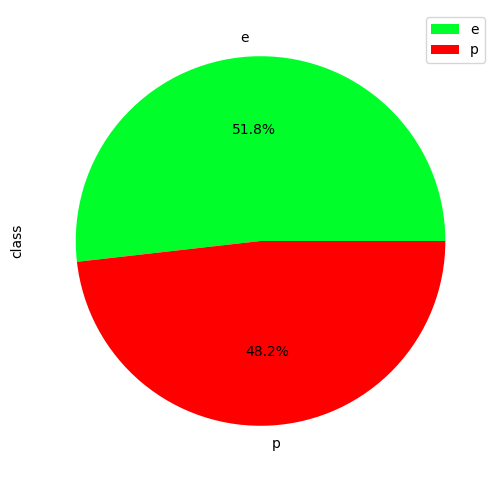

In [345]:
get_class_dist(uci_df)

Taking a cursory glance at the feature distributions, we find that many features with decent distribution of values. Whilst not fully balanced like *bruises* or *stalk-shape* may be, features like *cap-shape and *gill-color* show a range of different values without one taking the far majority of the population. 

Noting this, there are features like *gill-attachment*, *veil-color*, r=*ring-number* and most notable *veil-type* that have very imbalanced value distributions, which can be problematic with generalizing any model trained on this dataset out to other models, as the training sample with the minority value of these values may have been very small.

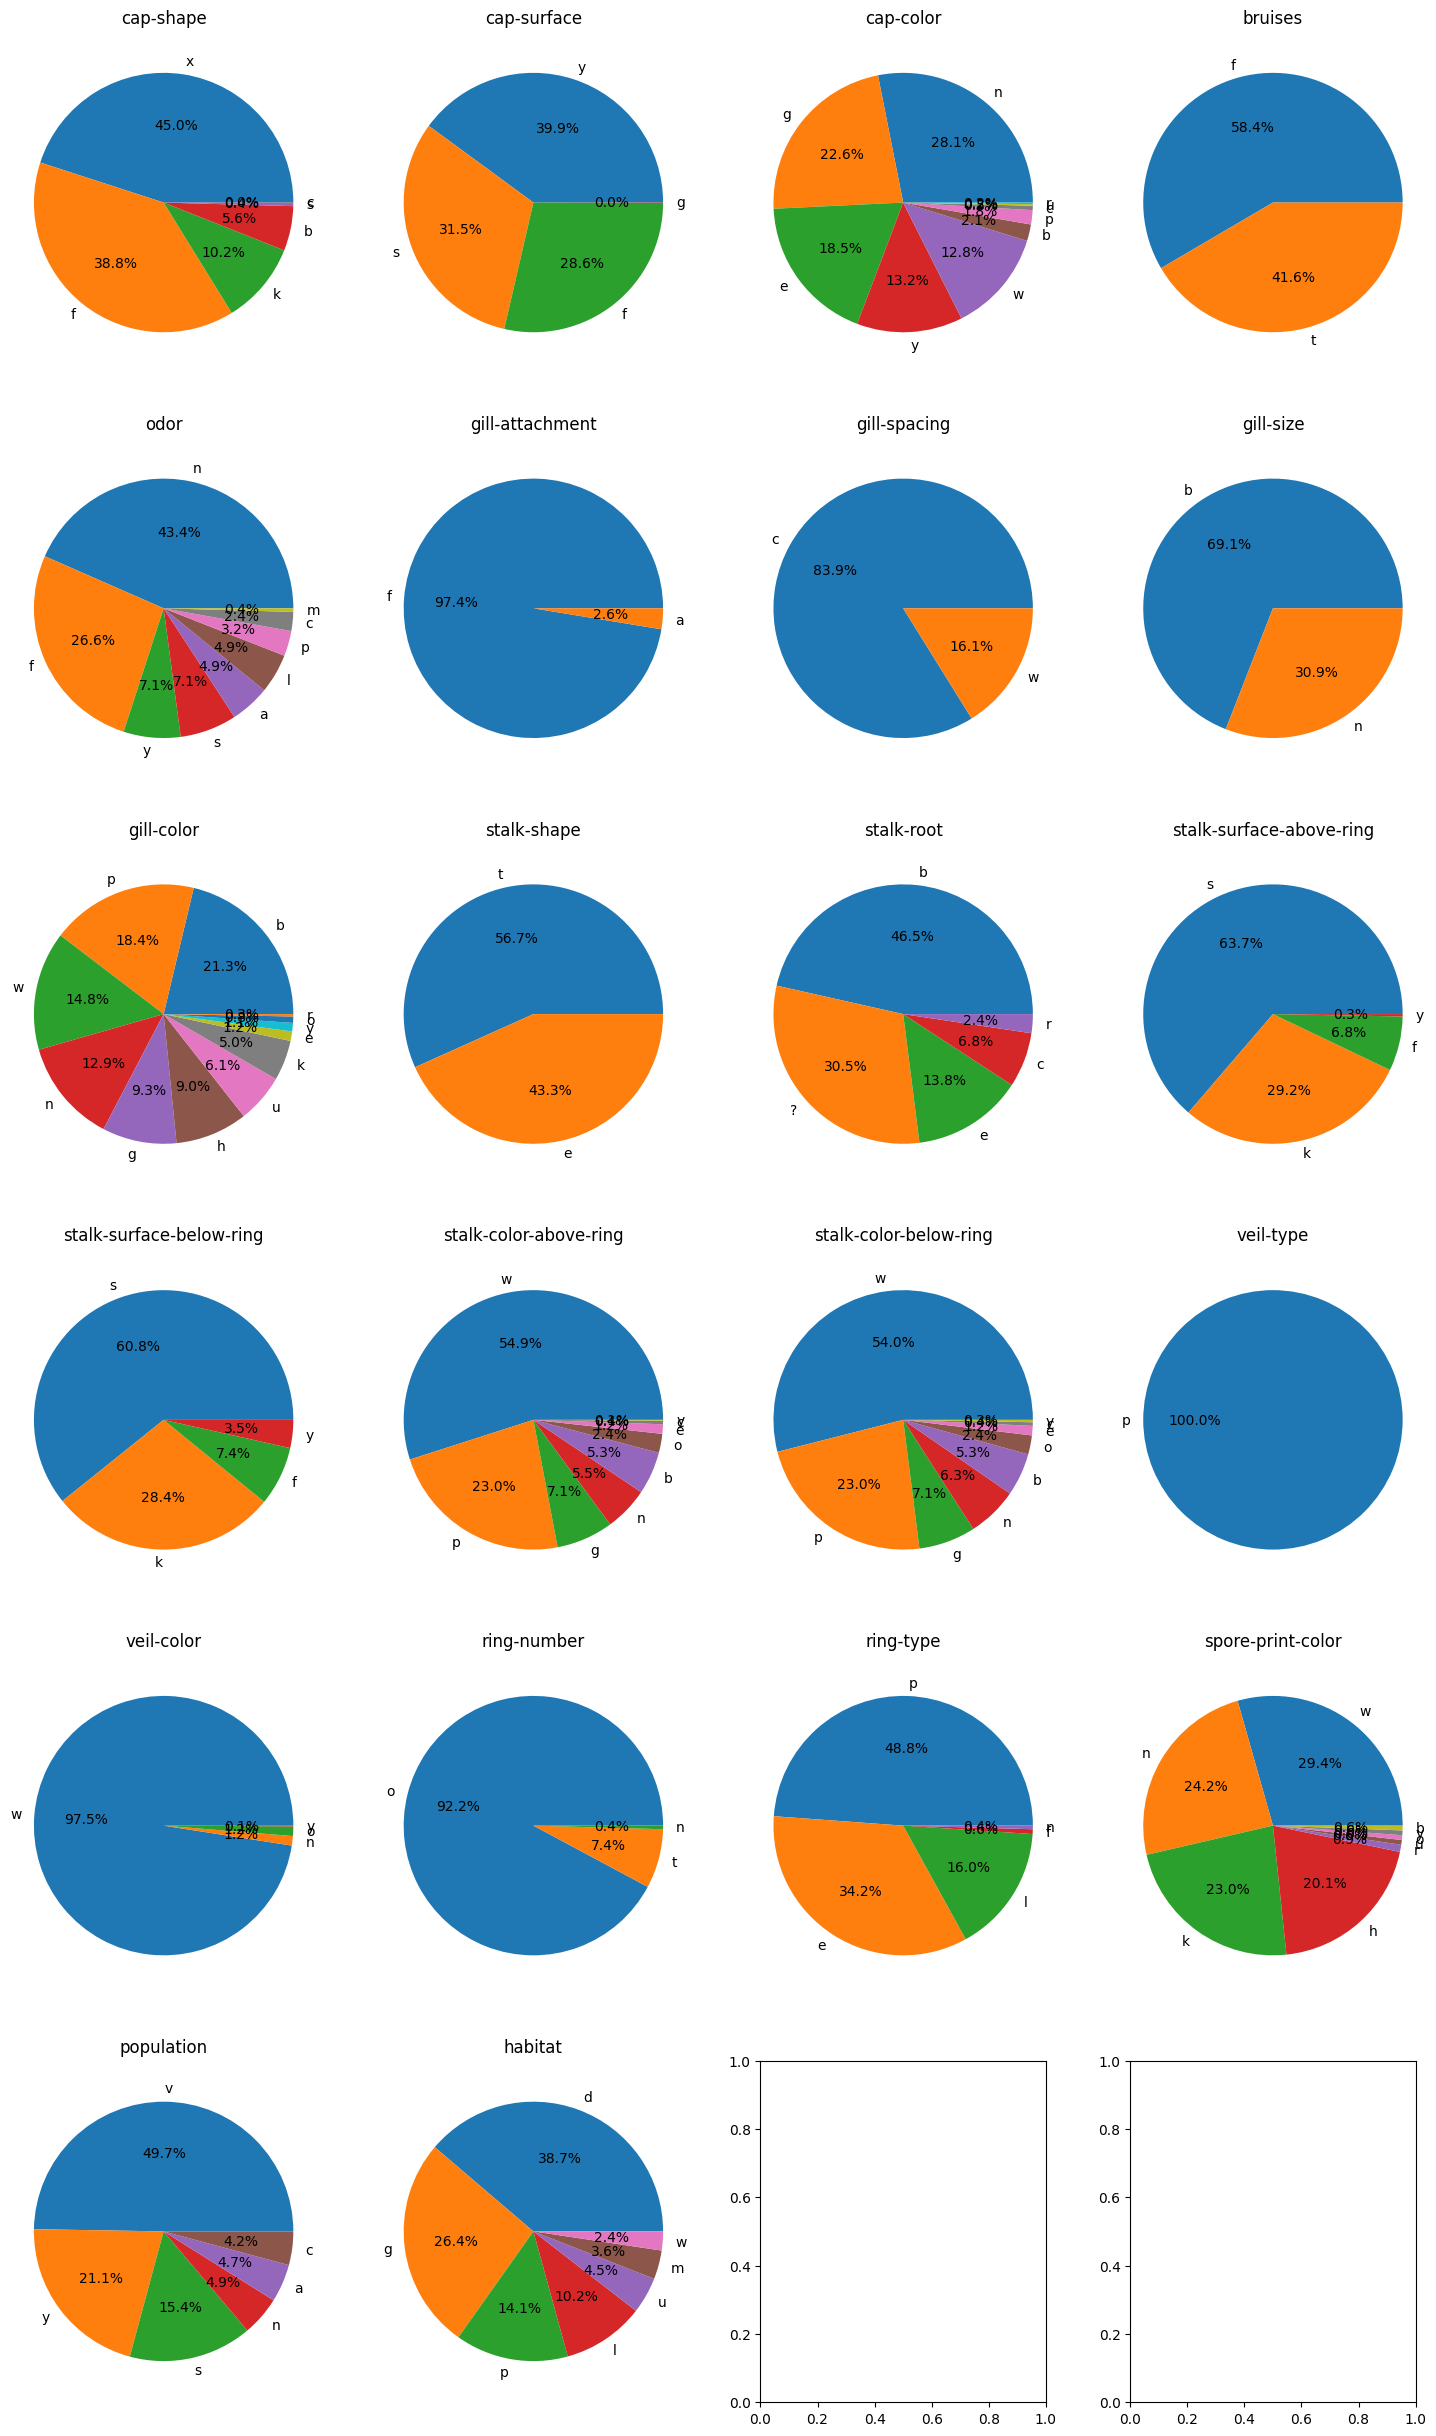

In [86]:
get_feature_dist(uci_df)

For the UCI dataset, we only have *stalk-root* as a feature with missing values. These missing values are indicated with an ? in the dataset and consist of about 1/4th of the instances. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


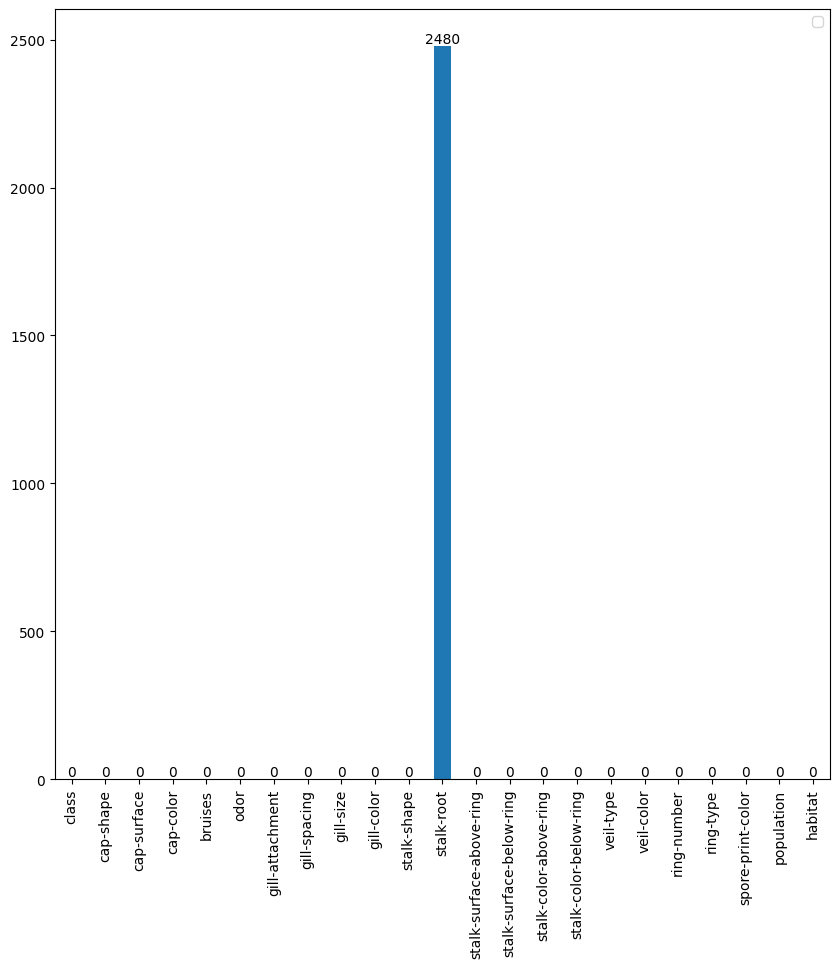

In [87]:
get_missing_values(uci_df)

Looking at the correlation heatmap, a few things stand out
* There is a very high correlation (0.93) between *veil-color* and *gill-attachment*
* There is a very high correlation between *odor* and *class* of -0.77
* *stalk-color-above-ring* and *stalk-color-below-ring* have almost identical correlation columns, similar to stalk-surface
* A lot of related features, like *gill-color* and *gill-size* tend to be relatively highly correlated

C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\dython\nominal.py:224: RuntimeWarning: Rounded U = -1.6032076067317889e-16 to 0.0. This is probably due to floating point precision issues.
  warnings.warn(
C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\dython\nominal.py:224: RuntimeWarning: Rounded U = -1.6355238750012395e-16 to 0.0. This is probably due to floating point precision issues.
  warnings.warn(
C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\dython\nominal.py:224: RuntimeWarning: Rounded U = -2.762271753320379e-16 to 0.0. This is probably due to floating point precision issues.
  warnings.warn(
C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\dython\nominal.py:224: RuntimeWarning: Rounded U = -1.7573034666714268e-16 to 0.0. This is probably due to floating point precision issues.
  warnings.warn(
C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\dython\nominal.py:224: RuntimeWarning: Rounded U = -5.711155861383439e-16 to 0.0. This is probably due 

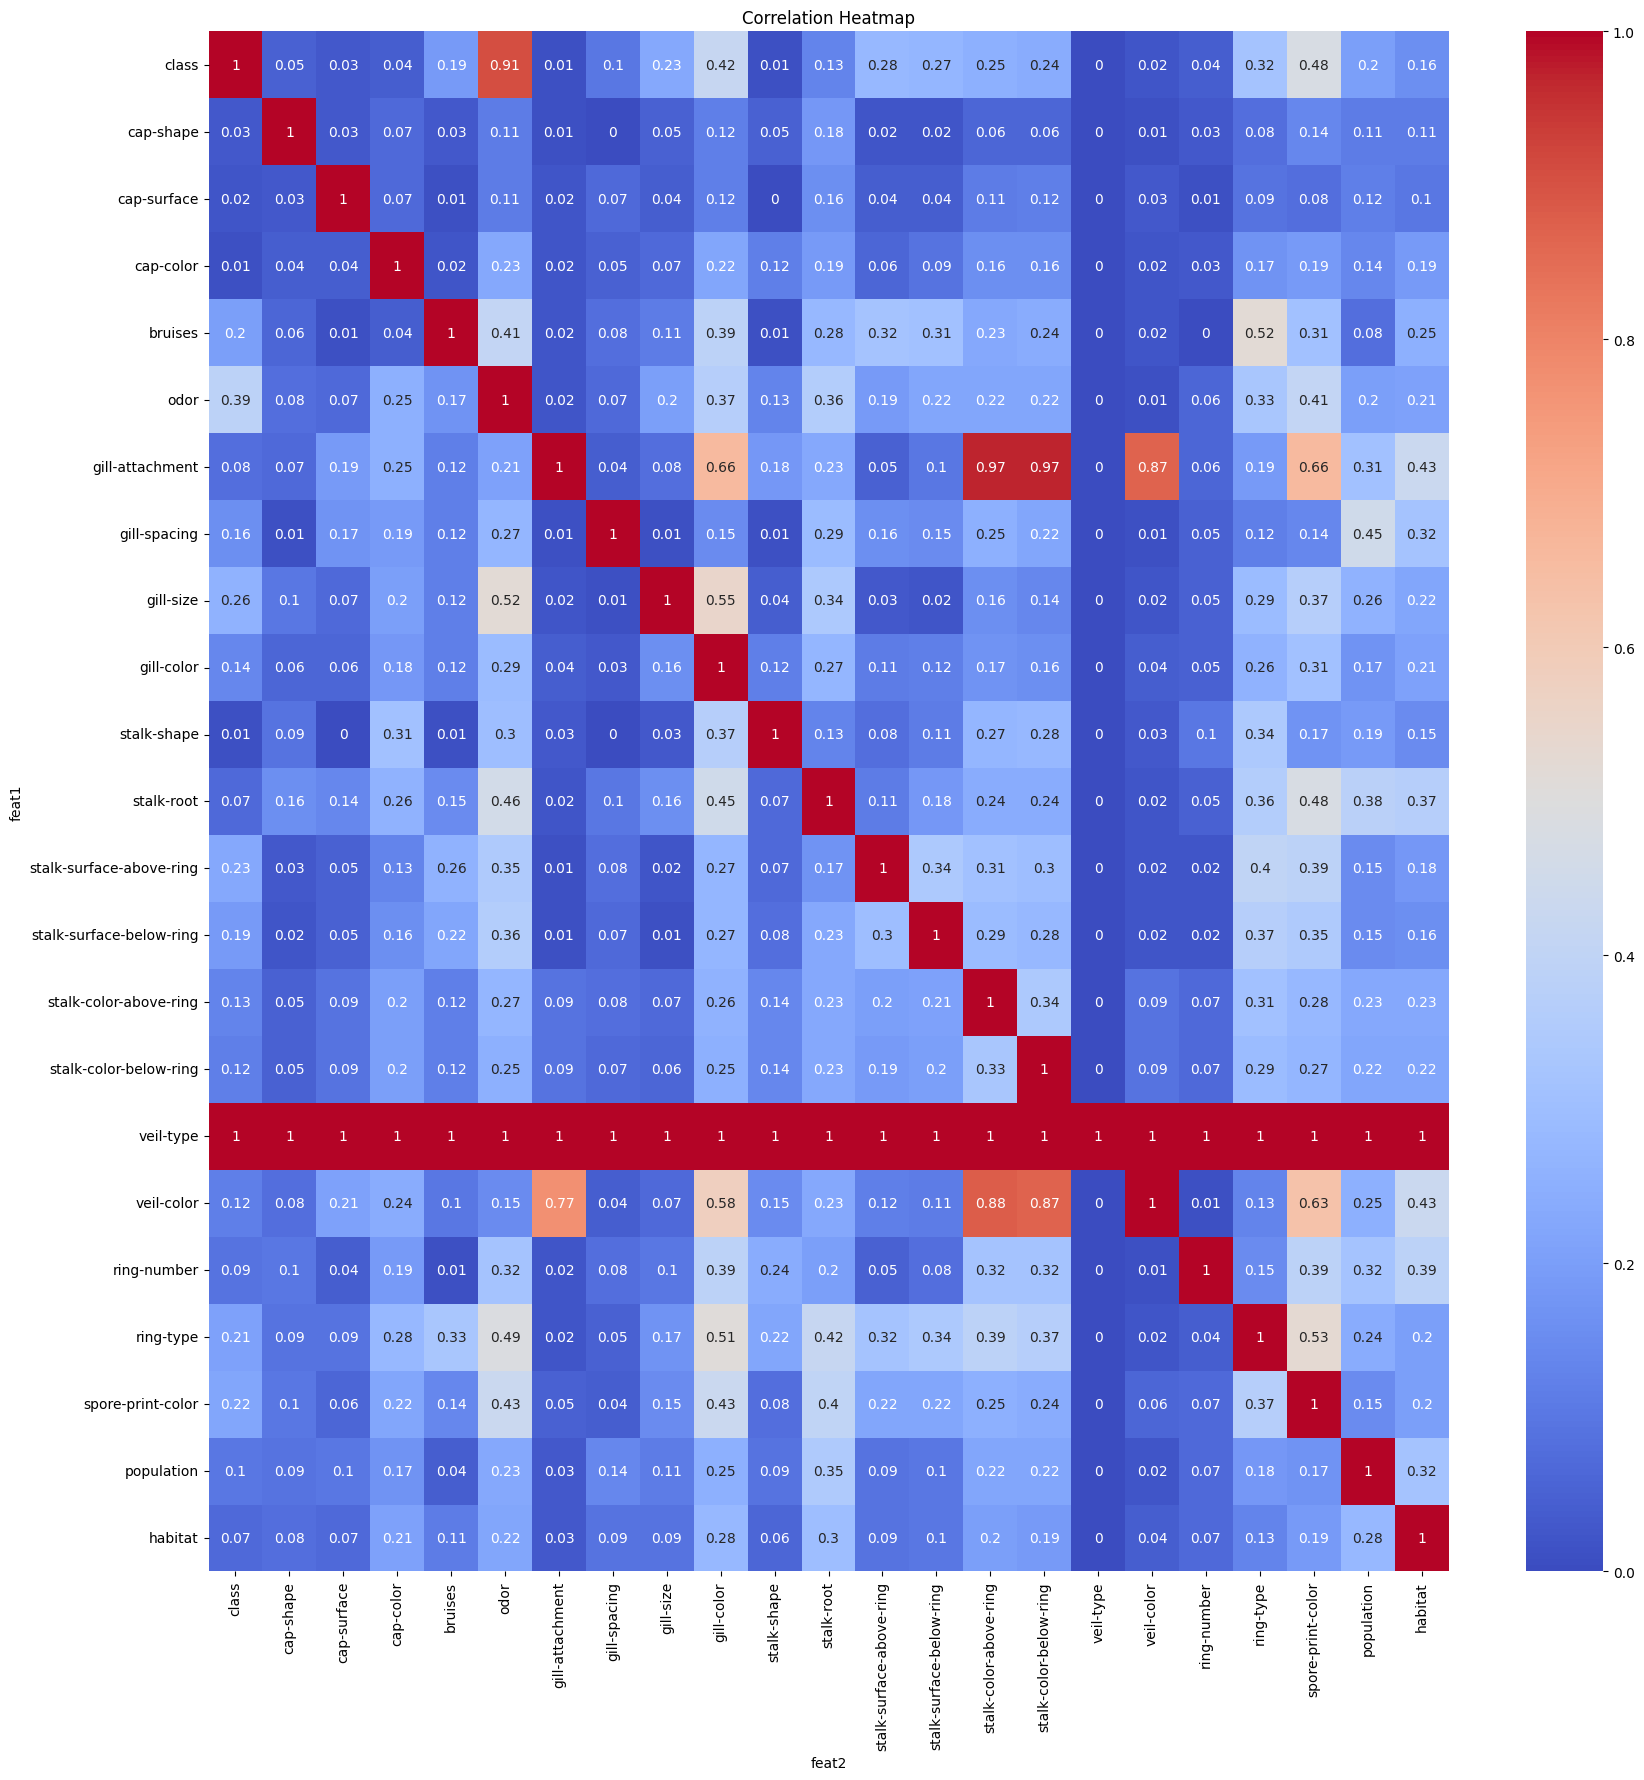

In [88]:
uci_corr = get_corr_heatmap(uci_df)

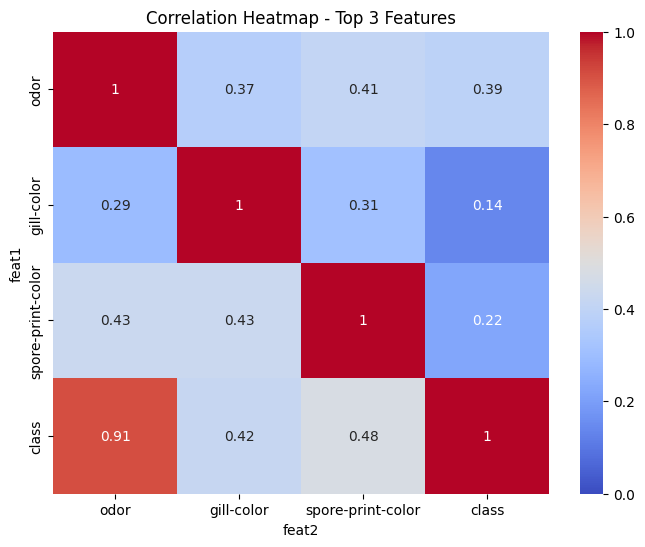

In [117]:
top_correlated(uci_corr, ['odor', 'gill-color', 'spore-print-color'])

#### **Individual Features**

For a more detailed analysis, let's go over every feature individually

For *cap-shape* we find 6 possible values, with x (convex) being most common, followed by f (flat), k (knobbed), b(bell), c (convex), s (sunken). The distribution of these features is vague reminiscent of a powerlaw distribution.
Its correlation with the class label does not appear to be very strong with a correlation of 0.05.

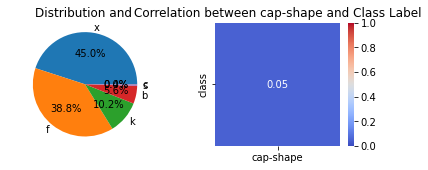

In [14]:
feature_analysis(uci_df, 'cap-shape', uci_corr)

For *cap-surface* we find 4 values, of which 3 are generally balance y(scaly), s(smooth), f(fibrous) and 1 has no presence g(grooved). It is not very correlated as well, with just 0.03.

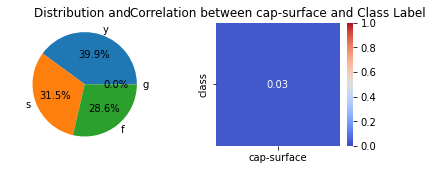

In [15]:
feature_analysis(uci_df, 'cap-surface', uci_corr)

*cap-color* is more evenly distributed, likely due to its many values n(brown), g(gray), e(red), y(yellow), w(white), b(buff), p(pink), u(purple), r(green), c(cinnamon). It also has a very low correlation with the class label with 0.04. Because of this, it seems like having knowledge of the mushroom cap is not very useful in this dataset to determine the class label.

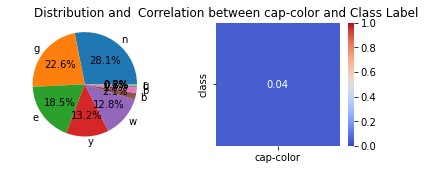

In [16]:
feature_analysis(uci_df, 'cap-color', uci_corr)

The *bruises* feature is more evenly distributed between it's binary values and also has a more decent correlation with the class label, with 0.19. This may likely be due to its similar distribution to the class label distribution and its binary values.

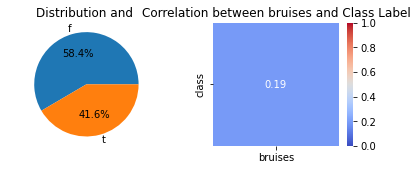

In [17]:
feature_analysis(uci_df, 'bruises', uci_corr)

The *odor* feature is a very interesting feature, as it is a multivariate feature with 9 possible values, yet shows a very high correlation of 0.91  This is such a high predictive power, especially compared to the other features, that it may be possible that this feature is a somewhat of a tell for the label. This means that if we were to just use this feature for classification on this dataset, we'd achieve a high accuracy. Tgis seems rather unrealistic, as mushroom classification has been noted as being a hard task with no clear tells. 

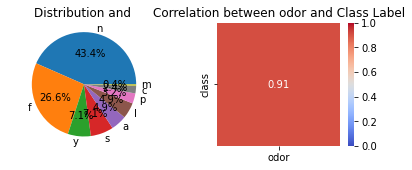

In [18]:
feature_analysis(uci_df, 'odor', uci_corr)

Whilst the *gill-attachment* feature can have 4 potential values, only 2 values are present in this dataset, with a large imbalance to the f(free) value. This shows in the correlation, which is low with 0.01, as the dominant value is certain to have instances of both class labels.

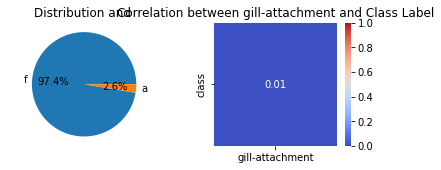

In [19]:
feature_analysis(uci_df, 'gill-attachment', uci_corr)

*gill-spacing* has 3 potential values, but only c(close) and w(crowded) appear, with an imbalance due to the greater presence of close. Whilst not as imbalanced as *gill-attachment*, it still has a low correlation of 0.1.

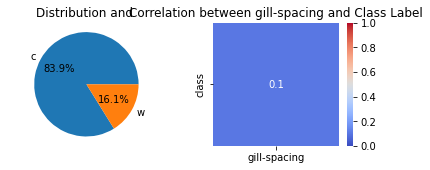

In [20]:
feature_analysis(uci_df, 'gill-spacing', uci_corr)

*gill-size* is more evenly balanced, with its binary value set of b(broad) and n(narrow). This also reflects in its greater correlation to the class label, with 0.23.

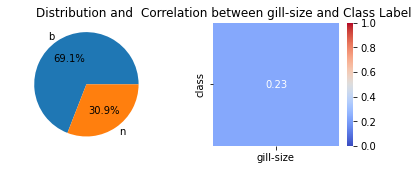

In [21]:
feature_analysis(uci_df, 'gill-size', uci_corr)

Like *odor*, *gill-color* has a relatively high correlation of 0.4 to the binary class label for such a multivariate feature, that shows a generally linear distribution.

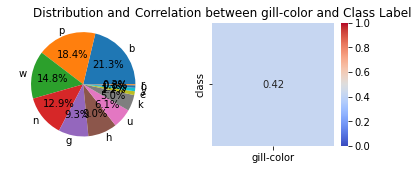

In [22]:
feature_analysis(uci_df, 'gill-color', uci_corr)

Opposed to this, *stalk-shape*, which shows a very similar balanced distribution to the class label, does not have a good correlation to it at all.

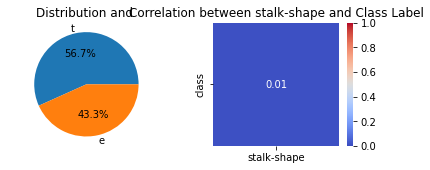

In [23]:
feature_analysis(uci_df, 'stalk-shape', uci_corr)

*stalk-root* does show a greater correlation, however with 1/3 of its values being unknown, the usefulness of this feature is questionable. This is because the unknown value set is so large that imputing would be questionable. 

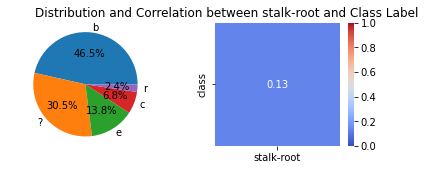

In [24]:
feature_analysis(uci_df, 'stalk-root', uci_corr)

*stalk-surface-above-ring* is a notable feature, as it has a counterpart in *stalk-surface-below-ring*. Both these features show a very similar distribution of values and very similar correlation the class label.

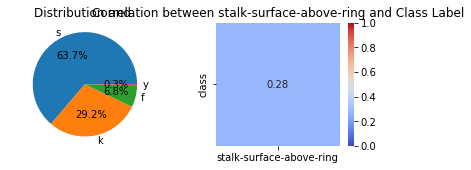

In [25]:
feature_analysis(uci_df, 'stalk-surface-above-ring', uci_corr)

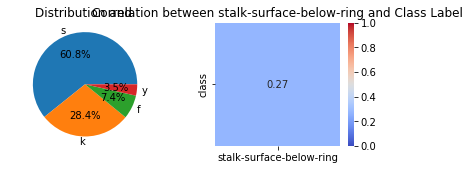

In [26]:
feature_analysis(uci_df, 'stalk-surface-below-ring', uci_corr)

Similarly, *stalk-color-above-ring* and *stalk-color-below-ring* share great similarities in distribution, although not so much in class label correlation.

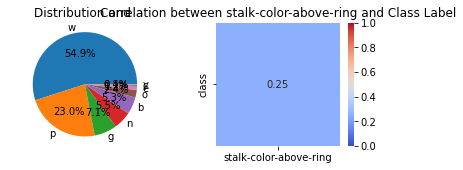

In [27]:
feature_analysis(uci_df, 'stalk-color-above-ring', uci_corr)

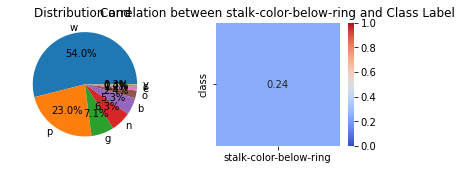

In [28]:
feature_analysis(uci_df, 'stalk-color-below-ring', uci_corr)

The *veil-type* feature is not useful feature in this dataset, as it contains only a single value, thus does not provide any information.

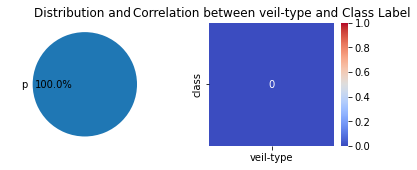

In [29]:
feature_analysis(uci_df, 'veil-type', uci_corr)

Similarly *veil-color* is significantly imbalanced, that the usefulness of this feature towards predicting the class label is very low.

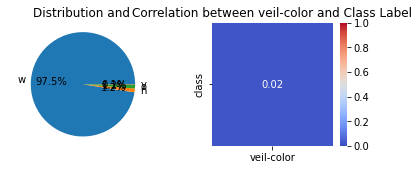

In [30]:
feature_analysis(uci_df, 'veil-color', uci_corr)

*ring-number* shows a smaller imbalance, but still large enough that it is not very correlated to the class label.

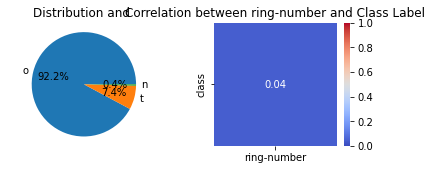

In [31]:
feature_analysis(uci_df, 'ring-number', uci_corr)

*ring-type* however is a lot more correlated to the class label, with 0.32, making it one of the better predictive features.

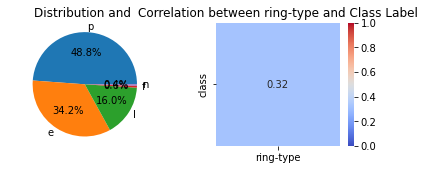

In [32]:
feature_analysis(uci_df, 'ring-type', uci_corr)

The same goes for *spore-print-color*, which has an even higher correlation of 0.48, second only to *odor*.

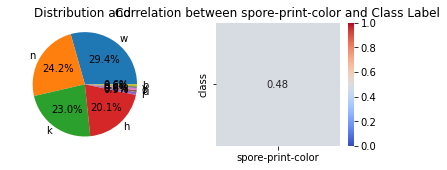

In [33]:
feature_analysis(uci_df, 'spore-print-color', uci_corr)

The *population* feature meanwhile does not show much correlation to the class label at all, and does not seem to be very useful in this dataset.

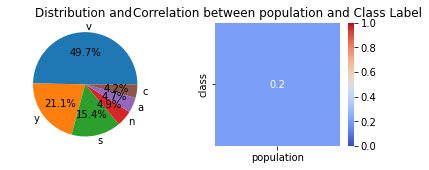

In [34]:
feature_analysis(uci_df, 'population', uci_corr)

Finally, *habitat* is moderately correlated with the class label with 0.16 and has a rather linear distribution of values.

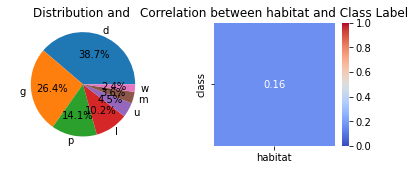

In [35]:
feature_analysis(uci_df, 'habitat', uci_corr)

## **Wagner et al. Dataset**

In "Mushroom data creation, curation, and simulation to support classification tasks" Wagner et al. create a Mushroom dataset based on a greater number of mushroom families and species from "Mushrooms and Toadstools". 
This dataset contains 61.069 simulated mushroom instances with similar encoding to the UCI dataset and aims to provide a more generalized dataset that covers a wider variety of mushrooms than the UCI dataset, which remains to be binary.

To use it, let's load in the dataframe as wag_df

In [11]:
wag_df = pd.read_csv('/Users/Michel/Desktop/BPAI/wagner_mushroom.csv',sep=';')

In [37]:
wag_df

class  cap-diameter cap-shape cap-surface cap-color  \
0         e          1.72         x           s         y   
1         e          9.59         f           e         b   
2         p          0.86         x           g         p   
3         p          4.32         x         NaN         e   
4         e          2.80         x           s         w   
...     ...           ...       ...         ...       ...   
61064     p         13.81         x           k         n   
61065     p          2.69         x           d         w   
61066     e         11.70         f         NaN         g   
61067     p          2.83         s           w         u   
61068     p          1.57         x           i         l   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               d          NaN          w   
1                        f             NaN            c          b   
2                        f               a          NaN          p   
3                        f               x          NaN          w   
4                        f               d            d          w   
...                    ...             ...          ...        ...   
61064                    t               p          NaN          y   
61065                    f               d            d          p   
61066                    f               s            c          u   
61067                    f               a            c          u   
61068                    f               a          NaN          p   

       stem-height  ...  stem-root stem-surface stem-color veil-type  \
0             7.01  ...        NaN            t          y       NaN   
1             4.73  ...        NaN          NaN          w       NaN   
2             4.25  ...        NaN            s          k       NaN   
3             4.91  ...        NaN          NaN          w       NaN   
4             3.13  ...        NaN          NaN          w       NaN   
...            ...  ...        ...          ...        ...       ...   
61064        10.06  ...          c          NaN          y       NaN   
61065         3.76  ...        NaN            h          w       NaN   
61066         7.36  ...        NaN          NaN          b       NaN   
61067         5.76  ...        NaN            s          u       NaN   
61068         3.26  ...        NaN          NaN          w       NaN   

      veil-color has-ring ring-type spore-print-color habitat season  
0            NaN        f         f               NaN       h      u  
1            NaN        t         f               NaN       d      a  
2            NaN        f         f               NaN       d      s  
3            NaN        f         f               NaN       d      u  
4            NaN        f         f               NaN       m      a  
...          ...      ...       ...               ...     ...    ...  
61064        NaN        f         f               NaN       d      a  
61065        NaN        f         f               NaN       g      a  
61066        NaN        f         f               NaN       l      a  
61067        NaN        f         f               NaN       d      a  
61068        NaN        f         f                 p       g      u  

[61069 rows x 21 columns]

Upon first inspection we can already see that this dataset has largely the same structure as the UCI dataset, with a few notable changes. 
* Introduction of continuous variables: *cap-diameter*, *stem-height*, *stem-width*: Added since this information was noted for most entries.
* Removal of *odor*: Removed as source did not provide sufficient information
* Change of *bruises* to *does-bruise-or-bleed*: Changed for the inclusion of bleeding mushrooms.
* Removal of *stalk-shape*: Removed as source did not provide sufficient information
* Collapsing of *stalk-surface* and *stalk-color*: The UCI dataset separates these in above/below ring, however this difference was not noted in the source used by Wagner et al. Furthermore, stalk was changed to stem due to this term being more commonly used.
* Change of *ring-number* to *has-ring*: Wagner et al just note this without explanation, however given the overwhelming presence of just one ring on mushrooms compared to two, it's likely that this does not constitute great information loss
* Removal of *population*: Removed as source did not provide sufficient information
* Addition of *season*: no reason given by Wagner et al.

Whilst it is unfortunate that some information is lost with this encoding format, the introduction of the new continuous variables is interesting, as it's a very unambiguous, yet potentially important attribute of distinguishing mushrooms. The collapsing of the stem variables seems sensible, especially with their proclivity to have similar correlations and distributions. The removal of odor is unfortunate, as it's not possible to determine whether this truly is a good classifier for detecting poisonous or edible mushrooms, or if this is a mistake in the original dataset. 

With that description of the dataset, let's inspect the data itself, starting with the class distribution.

As can be seen, this dataset is very balanced as well, with just slightly more poisonous mushrooms than edible ones.

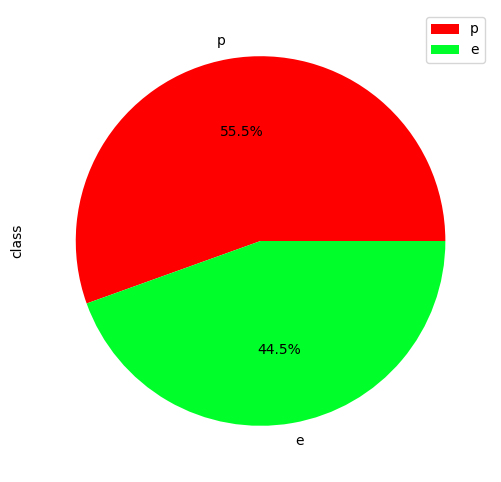

In [346]:
get_class_dist(wag_df)

Looking at the overall features we find that some features in this dataset tend to have more values than the UCI dataset, thus showing different distributions, whilst others like *veil-type* show very similar distributions. For a more closer look we'd have to analyze them one by one.

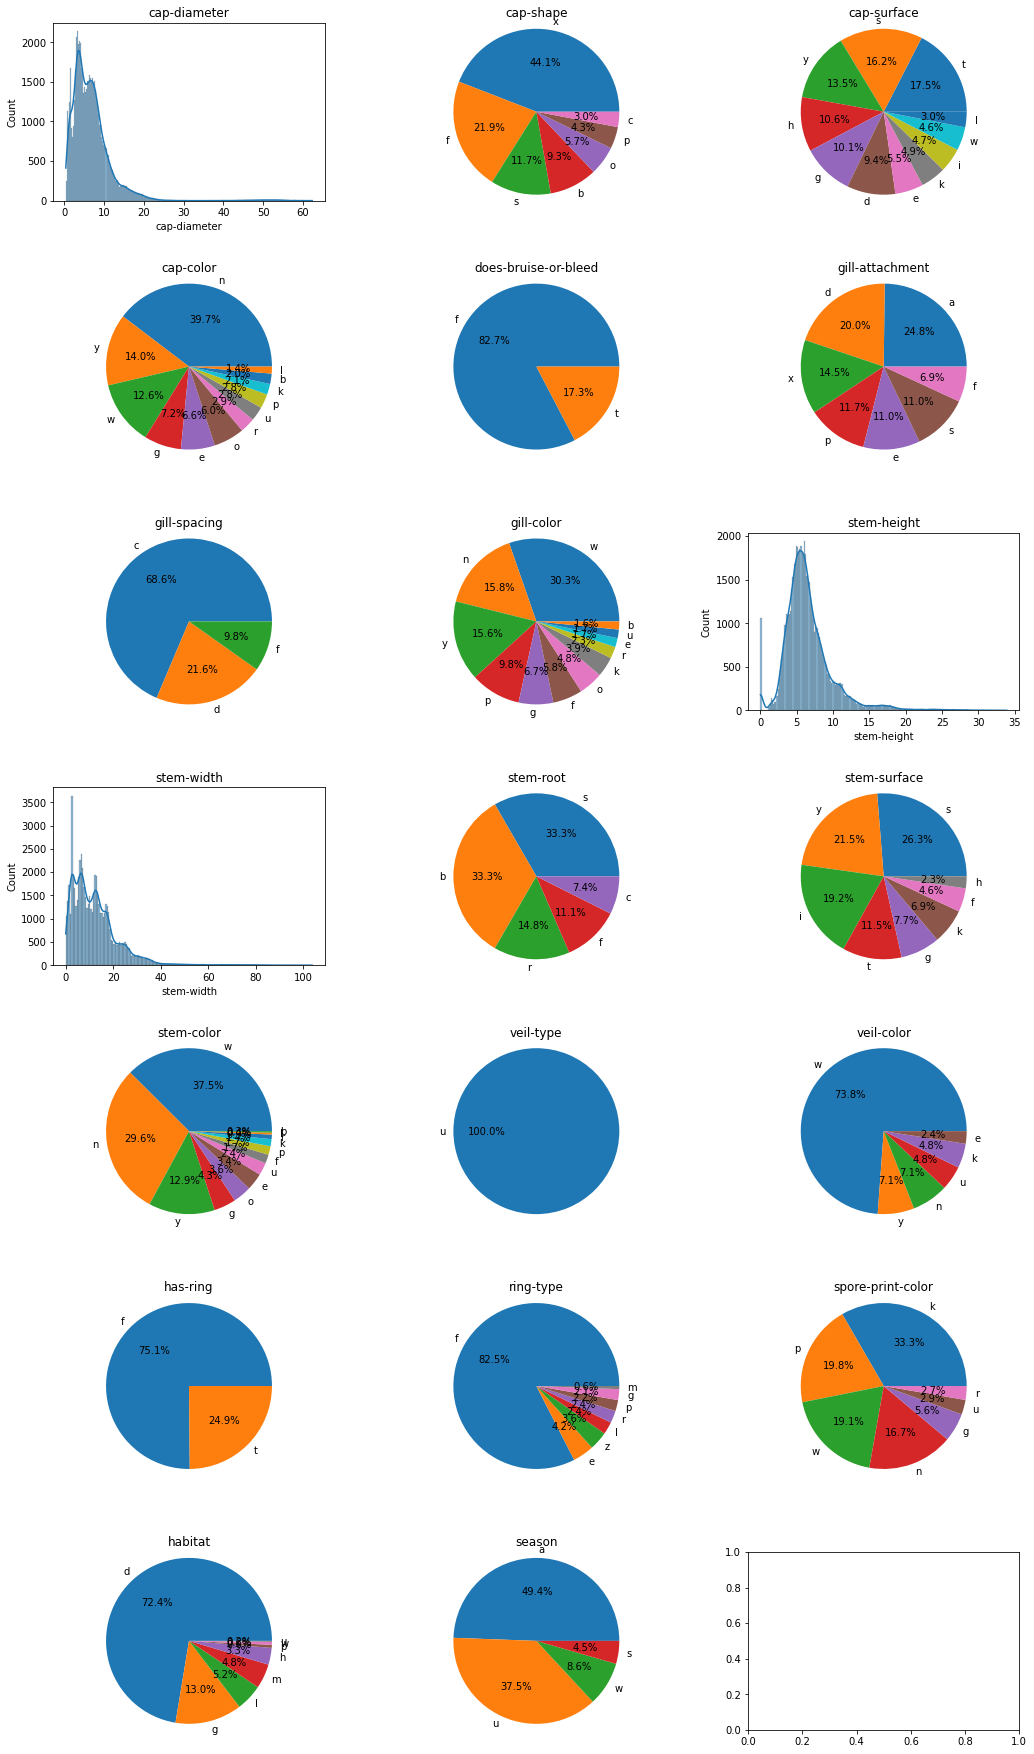

In [39]:
get_feature_dist(wag_df)

This dataset does seem to have more missing values for a about 9 features. Given that this dataset has about 61.000 instances, the features *stem-root*, *veil-type*, *veil-color* and *spore-print-color* do not seem very useful, as a large majority of them have no values at all. Even *stem-surface* and *gill-spacing* have about half of their values missing, which makes imputing challenging. 

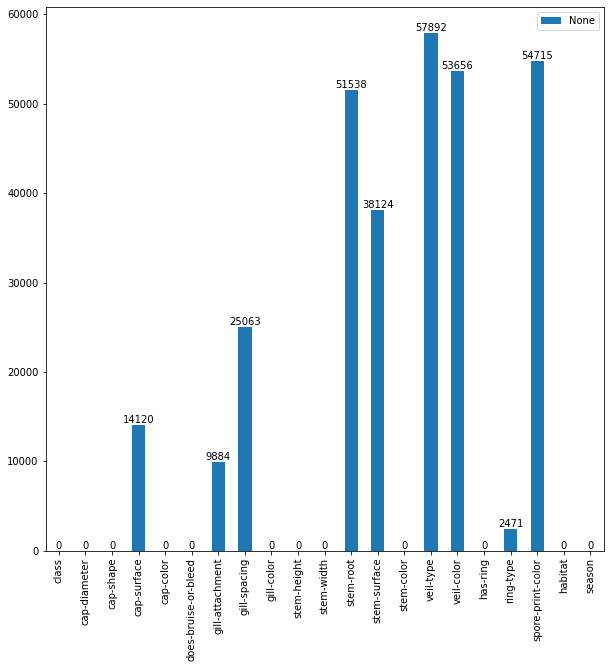

In [40]:
get_missing_values(wag_df)

Looking at the heat map, the corrlation between the features seems to be less strong, which may be due to the inclusion of more mushroom families, which allows for greater variety of feature value combinations to occur. This time, there is not stong indicative feature for the class label, with 0.18 for *cap-diameter* being the stronger correlation, which seems more in line with this task being challenging to solve by humans.

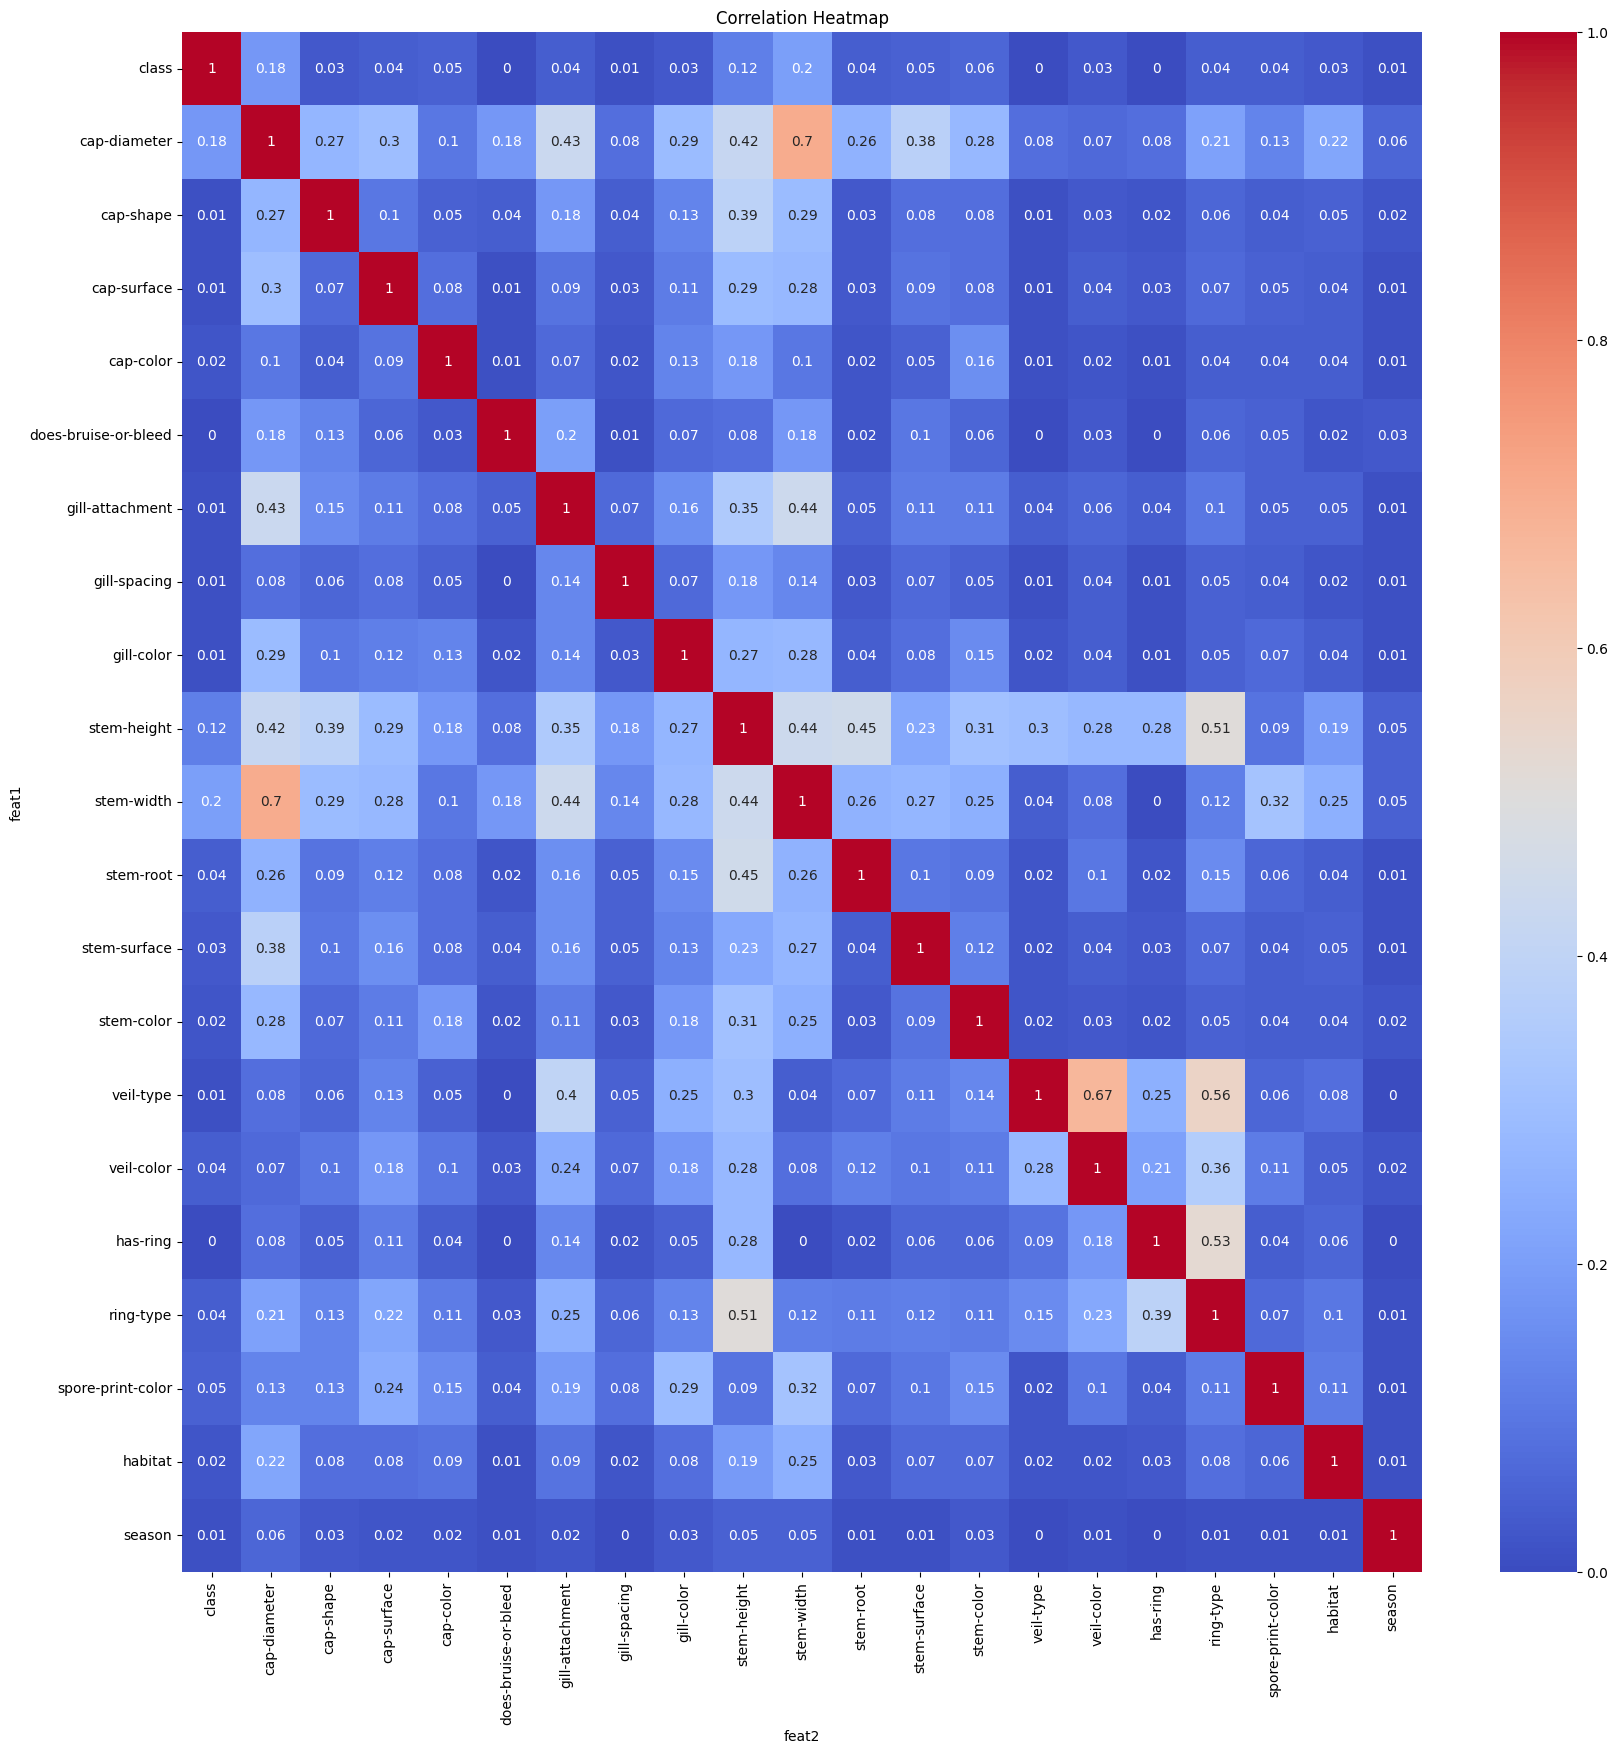

In [118]:
wag_corr = get_corr_heatmap(wag_df)

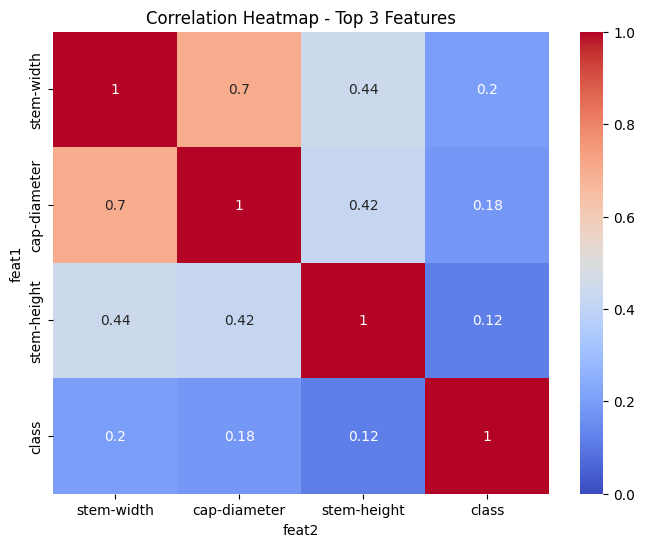

In [119]:
top_correlated(wag_corr, ['stem-width', 'cap-diameter', 'stem-height'])

Looking at the individual features, we find that *cap-diameter* has a right-skewed distributon, with most instances having a cap diameter of about 5 cm. Whilst the 0.18 correlation to the class label seems rather low, it is the highest correlated feature of this dataset.

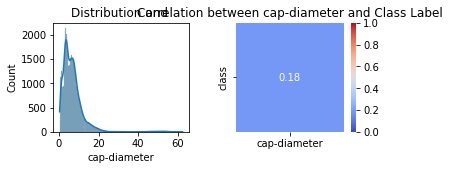

In [42]:
feature_analysis(wag_df, 'cap-diameter', wag_corr)

*cap-shape* is the first feature that is also present in the UCI dataframe. Looking at the value distribution, we can see that the Wagner dataset contains more values for cap shapes than the UCI dataset, which is likely due to this dataset containing more mushroom species. It is notable that the proportion of x (convex) caps is very similar for both datasets. Looking at the correlation to the class label, *cap-shape* isn't very correlated in this dataset either, with a 0.03 correlation.

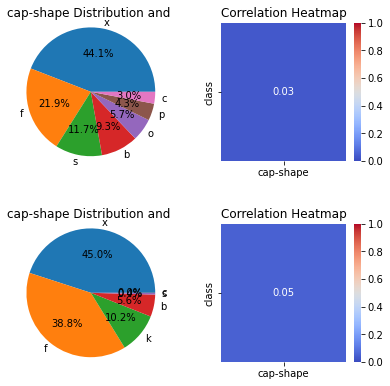

In [43]:
comparative_feature_analysis([[wag_df, 'cap-shape', wag_corr],[uci_df, 'cap-shape', uci_corr]])

The inclusion of more mushroom species leading to more variety in the dataset is clearly visible in the *cap-surface* feature, which in this dataset has a wide variety of values in a somewhat linear distribution. It is still not very highly correlated, which is to be expected given the 0.18 is the highest correlation to the class label we have.

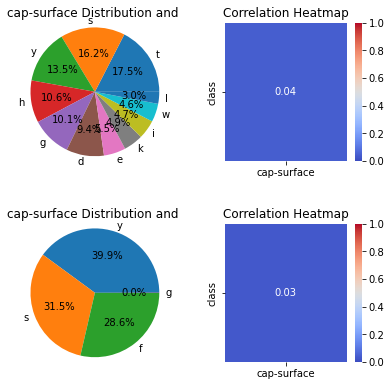

In [44]:
comparative_feature_analysis([[wag_df, 'cap-surface', wag_corr],[uci_df, 'cap-surface', uci_corr]])

*cap-color* shows an increase in feature variation over the UCI dataet as well, with a more even spread among the features that are not n (brown), which has a greater representation in this dataset.

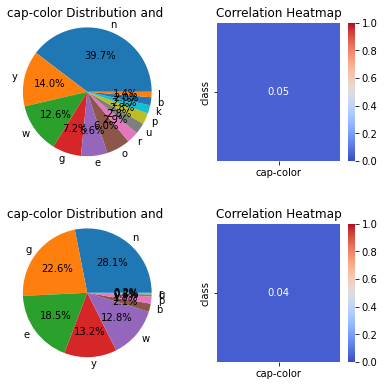

In [45]:
comparative_feature_analysis([[wag_df, 'cap-color', wag_corr],[uci_df, 'cap-color', uci_corr]])

A surprising comparison is found in *does-bruise-or-bleed*. Given that this category was expanded to accept bleeding mushrooms, one may expect that more instances would be accepted by this binary feature. However, it has a considerable imbalance towards the false value and also is not correlated to the class label at all. This may be due to bruising being a characteristic that is more closely related to the families covered by the UCI dataset, however this would require expert knowledge to validate

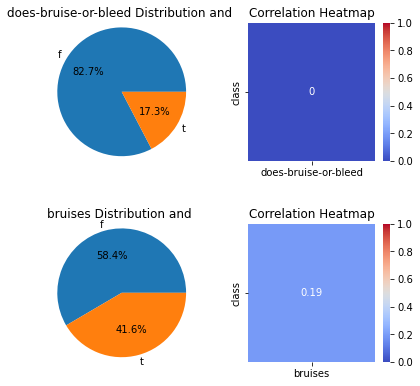

In [46]:
comparative_feature_analysis([[wag_df, 'does-bruise-or-bleed', wag_corr],[uci_df, 'bruises', uci_corr]])

Another example of an increase in feature value variety is found with *gill-attachement*, which features a lot more values than just f(free) and a(attached) from the UCI dataset. Here e (free) only occurs on 11% of the instances, with the largest share of 24.8% going to a(adnate). This difference is likely due the increase in mushroom species, as well as the simulation method in combination witht the wider feature values. Whilst we don't know how the UCI generated its mushroom instances, the Wagner et al. dataset was created by random sampling values from feature value lists of specie instances. If a species can have more possible values in its *gill-attachment* feature due to a more detailed approach, then this wider range of features can lead to a wider variety of values sampled for the instance simulation, thus resulting in less dominant values. 

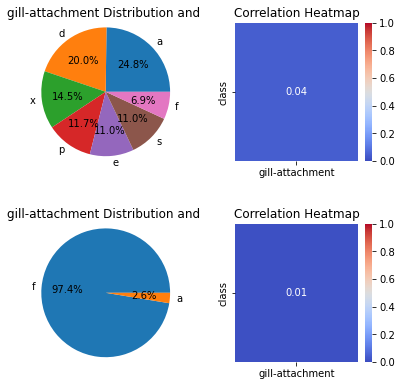

In [47]:
comparative_feature_analysis([[wag_df, 'gill-attachment', wag_corr],[uci_df, 'gill-attachment', uci_corr]])

*gill-spacing* meanwhile shows a very similar distribution, with only the inclusion of f(none) showing a significant change to the UCI dataset. 

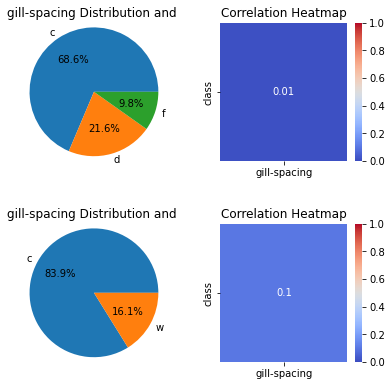

In [48]:
comparative_feature_analysis([[wag_df, 'gill-spacing', wag_corr],[uci_df, 'gill-spacing', uci_corr]])

With *gill-color* we find an increase in w (white) gills and n(brown) gills over the b(buff) and p(pink) gills in the UCI dataset. Also the correlation with the class label remains low.

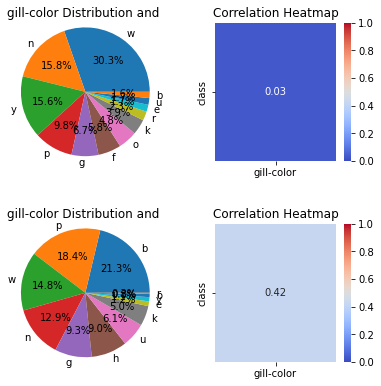

In [49]:
comparative_feature_analysis([[wag_df, 'gill-color', wag_corr],[uci_df, 'gill-color', uci_corr]])

*stem-height* is our second numeric feature, which is also right-skewed, with a more normal-like curve centered around 7cm in height. The correlation of this feature is 0.12, showing that the numeric features are some of the best correlated features in the dataset.

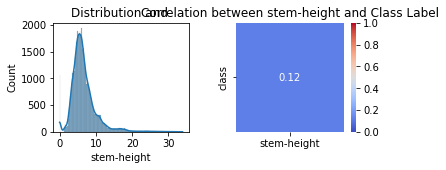

In [50]:
feature_analysis(wag_df, 'stem-height', wag_corr)

*stem-width* is very right-skewed, with a much longer tail and a center around 10mm. It shows an even higher correlation than height, with 0.2

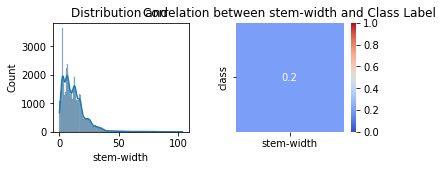

In [51]:
feature_analysis(wag_df, 'stem-width', wag_corr)

For *stem-root* we find that s(swollen) is the most common value, which remains not present in the UCI dataset. It may be speculated, given the further similarities and the unknown simulation method of the UCI, tat the unknown feature ? in the UCI may be the s(swollen) value. Of the nominal features *stem-root* is one of the better correlated with 0.04.

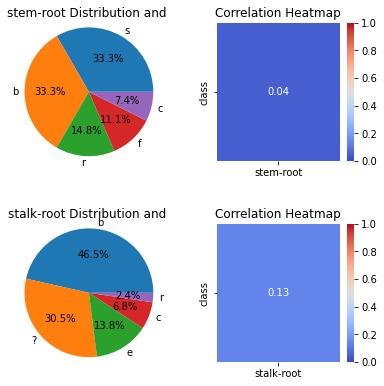

In [52]:
comparative_feature_analysis([[wag_df, 'stem-root', wag_corr],[uci_df, 'stalk-root', uci_corr]])

Since *stem-surface* consists of the values of both above and below ring now, it is interesting to compare it to the two features from the UCI dataset. Here we see that the stem-surface has a large variety of values, likely due to the increase in mushroom families. The correlation remains low with 0.05.

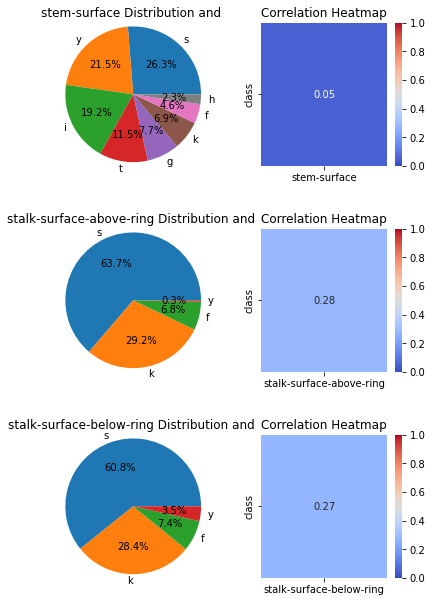

In [53]:
comparative_feature_analysis([[wag_df, 'stem-surface', wag_corr],[uci_df, 'stalk-surface-above-ring', uci_corr],[uci_df, 'stalk-surface-below-ring', uci_corr]])

*stem-color* is very similar to *stem-surface*, although the large presence of the w (white) value remains in this dataset. 

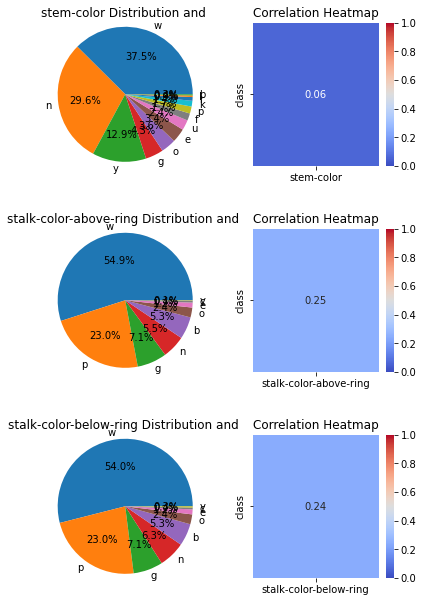

In [54]:
comparative_feature_analysis([[wag_df, 'stem-color', wag_corr],[uci_df, 'stalk-color-above-ring', uci_corr],[uci_df, 'stalk-color-below-ring', uci_corr]])

*veil-type* in both datasets has only one value, although this value is different for both dataset u(universal) in Wag and p(partial) in UCI. This seems inaccurate, as Wagner et al. claim that their source includes similar families of mushroom as the UCI dataset. This would mean that similar instances found in the UCI dataset should be found in the Wag dataset, but this is not the case here. It is unknown if this disreptancy is due to differences in the source material (inaccuracies/new discoveries) or differences in dataset creation. Regardless, both features are not useful at all due to their single value, and it is likely that this feature will be removed.

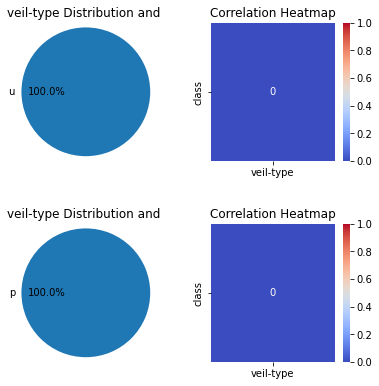

In [55]:
comparative_feature_analysis([[wag_df, 'veil-type', wag_corr],[uci_df, 'veil-type', uci_corr]])

For *veil-color* a more expected distribution is found, with a remaining majority of the w(white) value, and an increase in the other values. Its correlation is relatively high for the nominal features of this dataset with 0.03.

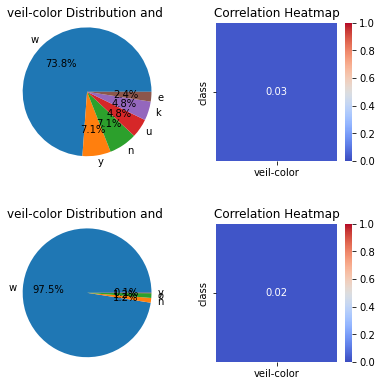

In [56]:
comparative_feature_analysis([[wag_df, 'veil-color', wag_corr],[uci_df, 'veil-color', uci_corr]])

For *has-ring* we find a great change compared to the UCI dataset, which had an overwhelming majority of one or two ringed mushrooms and barely any without ring. For the Wagner dataset, about 3/4th mushrooms do not have a ring, which may be due to the inclusion of many ringless mushrooms. That noted, this feature does not seem to be correlated to the class label at all.

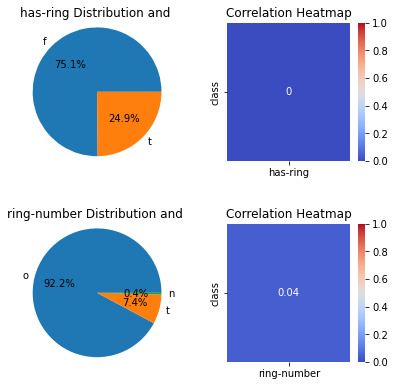

In [57]:
comparative_feature_analysis([[wag_df, 'has-ring', wag_corr],[uci_df, 'ring-number', uci_corr]])

Given that most mushrooms do not have rings in this dataset, it is not surprising to see that the majority of the instances have a ring-type of f(none). What is surprising to see is that there are some mushrooms that are indicated to have a ring, but this ring is none. The correlation between ring-type and the class label is relatively high for a nominal feature in this dataset.

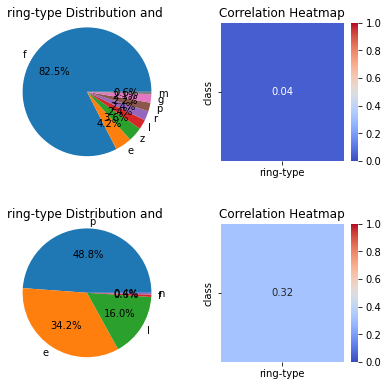

In [58]:
comparative_feature_analysis([[wag_df, 'ring-type', wag_corr],[uci_df, 'ring-type', uci_corr]])

*spore-print-color* shows a very similar value distribution to the UCI dataset, although k(black) and p(pink) values replace the most common w(white) and n(brown) values. 

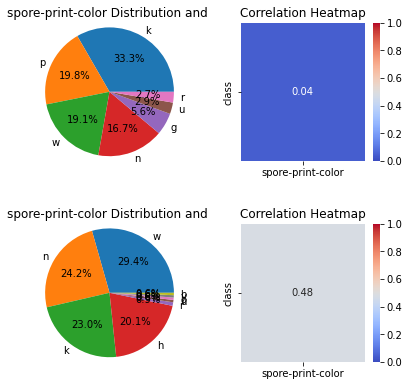

In [59]:
comparative_feature_analysis([[wag_df, 'spore-print-color', wag_corr],[uci_df, 'spore-print-color', uci_corr]])

*habitat* is the last shared feature between 

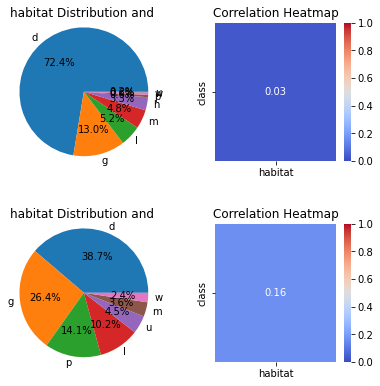

In [60]:
comparative_feature_analysis([[wag_df, 'habitat', wag_corr],[uci_df, 'habitat', uci_corr]])

The *season* feature shows that most mushrooms tend to appear in the a(autumn) and u(summer) and that this feature is not very well correlated to the class label.

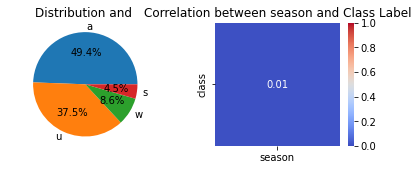

In [61]:
feature_analysis(wag_df, 'season', wag_corr)

## **Multi Dataset**

Whilst the Wagner et al. dataset does seem to have some issues, with the large amount of missing values, the questionable value of *veil-type*, and most notably for this project, being a Binary dataset, it does provide its methodology used to simulate the Mushroom instances from its primary dataset. This is useful as it allows for the creation of a similar dataset that can be compared and operated on with. As such, we can use this methodology to create a multivariate dataset of the UCI source material *the Audubon Society Field Guide to North American Mushrooms* using the Wagner et al. methodology and as such create a dataset which has more class labels and more mushroom families, whilst still being comparable to an existing dataset. 

In order to do this, a few steps will be taken. 
* Firstly, data from all mushroom species of the Order Agricales in the Audubon Society Field Guide to North American Mushrooms will be manually encoded in the Wagner et al dataset format.
* Next, the 411 Mushroom entries will be read into python as objects and simulated into 353 individual instances using random sampling with a normal distribution to create individual mushroom
* Finally, this dataset is exported for future use.

The first step of manually encoding the dataset has already been undertaken, so we can just import the CSV file below

In [62]:
primary_df = pd.read_csv('/Users/Michel/Desktop/BPAI/multi-dataset.csv',sep=';') #Open the CSV file in a Pandas dataframe for display purposes
primary_data = open('/Users/Michel/Desktop/BPAI/multi-dataset.csv') #Open and read the CSV file lines for processing purposes
lines = primary_data.readlines()

Let's take a look at the dataset.

In [63]:
primary_df

family                       name class cap-diameter  \
0          Agaricacae  Abruptly-bulbous Agaricus     c     [7.5,15]   
1          Agaricacae             Horse Mushroom     e     [7.5,15]   
2          Agaricacae                     Prince     e      [10,25]   
3          Agaricacae            Spring Agaricus     e       [5,15]   
4          Agaricacae        California Agaricus     p       [5,10]   
..                ...                        ...   ...          ...   
407  Tricholomataceae              Decorated Mop     u        [3,6]   
408  Tricholomataceae        Platterful Mushroom     c     [5,12.5]   
409  Tricholomataceae             Variegated Mop     r       [5,10]   
410  Tricholomataceae          Yellow Oyster Mop     u    [2.5,7.5]   
411  Tricholomataceae                 Fuzzy Foot     u    [0.3,2.5]   

     cap-shape  cap-surface cap-color does-bruise-or-bleed gill-attachment  \
0        [x,f]  [s,i,d,k,h]       [w]                  [t]             [e]   
1          [x]        [s,y]       [w]                  [t]             [e]   
2        [x,f]        [i,y]       [y]                  [t]             [e]   
3        [x,f]          [i]       [n]                  [f]             [e]   
4        [x,f]        [s,y]   [w,n,y]                  [f]             [e]   
..         ...          ...       ...                  ...             ...   
407      [x,s]        [i,y]       [k]                  [f]             [x]   
408  [b,x,f,s]          [i]       [n]                  [f]             [x]   
409      [x,f]          [d]       [y]                  [f]           [s,x]   
410        [x]        [i,y]     [y,n]                  [f]           [d,s]   
411      [x,s]          [s]     [o,n]                  [f]             [d]   

    gill-spacing  ... stem-root stem-surface stem-color veil-type veil-color  \
0            [c]  ...       [b]          [s]        [w]       [p]        [w]   
1            [c]  ...       [e]          [s]        [w]       [p]        [w]   
2            [c]  ...       [r]        [k,y]        [f]       [p]        [w]   
3            [c]  ...       [e]          [s]        [w]       [p]        [w]   
4            [c]  ...       [e]          [s]        [w]       [p]        [w]   
..           ...  ...       ...          ...        ...       ...        ...   
407          [c]  ...       [e]          [y]        [y]       [f]        [f]   
408          [d]  ...       [z]          [i]        [w]       [f]        [f]   
409          [c]  ...       [e]          [y]      [y,e]       [f]        [f]   
410          [c]  ...       [e]          [i]      [y,n]       [f]        [f]   
411          [d]  ...       [b]          [s]      [y,n]       [f]        [f]   

    has-ring ring-type spore-print-color  habitat   season  
0        [f]       [f]             [u,n]      [d]    [u,a]  
1        [t]       [p]             [k,n]  [g,m,w]    [u,a]  
2        [t]       [p]               [n]    [g,p]      [u]  
3        [t]     [p,r]               [n]      [u]  [s,u,a]  
4        [t]       [p]               [n]      [u]      [a]  
..       ...       ...               ...      ...      ...  
407      [f]       [f]               [w]      [w]    [u,a]  
408      [f]       [f]               [w]      [w]  [s,u,a]  
409      [f]       [f]               [w]      [d]    [s,a]  
410      [f]       [f]               [w]      [w]    [u,a]  
411      [f]       [f]               [b]      [w]  [s,u,a]  

[412 rows x 23 columns]

In this primary dataset, each entry is a mushroom species and not an individual mushroom. Whilst information about a species is useful, information about it describes all general attributes/ranges which may be posessed by individuals found within it. This does not describe all individuals, as Prince mushroom may have a cap diamater of 10 cm or 25 cm or 15.8 cm, but not 10,25 cmn. As such, we want to simulate each mushroom species as an instance that has one value within the range of possible values.

To do this, we use a similar methodology to the Wagner et al. paper, where each Mushroom instance will be assigned a Mushroom object with feature attributes. From each object, 353 instances are sampled (which is the same number of instances per specie simulated by the UCI dataset). These instances have their values assigned by random sampling the numeric values and the list of multiple values for nominal values. 

First we create a Mushroom class for each specie of Mushroom. This allows for the easy retrieval and manipulation of features, which will be in the form of lists.

In [12]:
class Mushroom:
    def __init__(self, *args):
        self.family = args[0]
        self.name = args[1]
        self.is_edible = args[2]
        self.features_dict = {
            "cap-diameter": args[3], "cap-shape": args[4],
            "cap-surface": args[5], "cap-color": args[6],
            "has-bruises": args[7], "gill-attachment": args[8],
            "gill-spacing": args[9], "gill-color": args[10],
            "stem-height": args[11], "stem-width": args[12],
            "stem-root": args[13], "stem-surface": args[14],
            "stem-color": args[15],
            "veil-type": args[16], "veil-color": args[17],
            "has-ring": args[18], "ring-type": args[19],
            "spore-color": args[20],
            "habitat": args[21], "season": args[22]
        }        

Then we create dictionary containing each Mushroom specie as an object with its features as arguments.

In [65]:
primary_dict = {}                                                         #Create Dictionary
for i in range(1,412):                                                    #Skips header of CSV and then loops over all instances
  attributes = lines[i].split(';')                                        #CSV file is split on semi-colon due to lists using ,
  for i in range(3, len(attributes)):                                     #First 3 attributes are labels, so need not be processed
    string = attributes[i]                                                #Data values are stored as strings or digits.
    for j in ['[', ']', ' ', '\n']:                                       #Clean up any potential spaces and list indications in data
        string = string.replace(j, '')
    if ',' in string:                                                     #Commas indicate multi-value lists, split strings on them to create a list
        lst = string.split(',')
    else:
        lst = [string]                                                    #For consistency, create lists of all values, even if only single value
    if lst[0].isdigit():                                                  #Ensure all digits are floats
       lst = [float(i) for i in lst]                                   
    attributes[i] = lst                                                   #Save processed Attribute
  primary_dict[attributes[1]] = Mushroom(*attributes)                     #Add Mushroom object, named using "name" attribute with attributes to dictionary

Next, create a function that can generate correlated normal values for a given number of instances given a [min,max]

In [13]:
def correlated_normals(size, features, std):
    cov_mat = [[1, 0.5, 0.5],                                                #Create covariance matrix that connects size of numeric features of instance with each other                                       
               [0.5, 1, 0.7],
               [0.5, 0.7, 1]]
    norm_values = np.zeros(shape=(len(features), size))                     #Create empty matrix of 3 features by 353 instances 
    for i in range(0, len(features)):                                       #Generate 353 random normal values with mean 0 and std: 1/3 for each feature
        norm_values[i] = norm.rvs(0, 1 / std, size=size)                    
    corr_normal_values = np.dot(cholesky(cov_mat, lower=True), norm_values) #Matrix multiply the normal values of the features with the covariance matrix using cholesky to get correlated normal values
    resized_normal_values = []
    for i in range(0, len(features)):                                       #Resize the value to within the min and max of the feature 
        resized_normal_values.append(resize_values(corr_normal_values[i], features[i][0], features[i][1]))
    return resized_normal_values

def resize_values(values, min, max):
    #Resizing function that resizes normal values to the min,max of the feature
    lst = []
    for value in values:
        value = (value + 1) / 2               #Shift range [-1,1]  to [0,1]
        lst.append(value * (max - min) + min) #Shift range [0,1] to [min,max]
    return np.array(lst)

Next, we create an empty DF with the same columns as the primary dataset, which we fill with 353 instances of each Mushroom

In [67]:
multi_df = pd.DataFrame(columns=primary_df.columns)                                                                   #Create DataFrame
for mushroom in primary_dict:
  mushroom_features = list(primary_dict[mushroom].features_dict.values())                                             #List all the feature names
  mushroom_labels = [primary_dict[mushroom].family, primary_dict[mushroom].name, primary_dict[mushroom].is_edible]    #List all the labels
  num_feat_idx = {0: 0, 8: 1, 9: 2}                                                                                   #Note the indexes of Numeric Features
  numeric_features = [mushroom_features[0], mushroom_features[8], mushroom_features[9]]                               #List the Numeric features
  for feature in numeric_features:
    for i in range(0,len(feature)):                                                                                   #Ensure each number is a float for multiple values
      feature[i]=float(feature[i])
    if len(feature) == 1:                                                                                             #Change single values to 2 values [x-(x/4), x+(x/4)]
      x=feature[0]
      feature[0] = x - (x/4)
      feature.append(x + (x/4))
  normal_values = correlated_normals(353,numeric_features,3)                                                          #Get normal values for 353 instances of the numeric features using above functions
  for instance in range(0,353):                                                                                       #Generate an instance that
    new_mushroom_features = [] + mushroom_labels                                                                      #Copies the labels directly
    for feat in range(0, len(mushroom_features)):
      if feat not in num_feat_idx.keys():
        new_mushroom_features.append(random.choice(mushroom_features[feat]))                                          #Chooses a random value of the nominal features list
      else:
        new_mushroom_features.append(round(normal_values[num_feat_idx[feat]][instance],2))                            #Chooses a rounded normal value of the numeric features
    multi_df.loc[len(multi_df)] = new_mushroom_features                                                               #Add this instance to the dataframe

Now that we've created our dataframe of instance, let's take a look at it.

In [68]:
multi_df

family                       name class  cap-diameter  \
0             Agaricacae  Abruptly-bulbous Agaricus     c         11.29   
1             Agaricacae  Abruptly-bulbous Agaricus     c         10.09   
2             Agaricacae  Abruptly-bulbous Agaricus     c         11.37   
3             Agaricacae  Abruptly-bulbous Agaricus     c         12.45   
4             Agaricacae  Abruptly-bulbous Agaricus     c         11.62   
...                  ...                        ...   ...           ...   
145078  Tricholomataceae          Yellow Oyster Mop     u          5.80   
145079  Tricholomataceae          Yellow Oyster Mop     u          6.21   
145080  Tricholomataceae          Yellow Oyster Mop     u          6.14   
145081  Tricholomataceae          Yellow Oyster Mop     u          5.46   
145082  Tricholomataceae          Yellow Oyster Mop     u          5.83   

       cap-shape cap-surface cap-color does-bruise-or-bleed gill-attachment  \
0              x           s         w                    t               e   
1              x           i         w                    t               e   
2              f           k         w                    t               e   
3              x           i         w                    t               e   
4              f           s         w                    t               e   
...          ...         ...       ...                  ...             ...   
145078         x           y         n                    f               d   
145079         x           y         n                    f               d   
145080         x           i         y                    f               s   
145081         x           i         y                    f               d   
145082         x           i         n                    f               d   

       gill-spacing  ... stem-root  stem-surface  stem-color veil-type  \
0                 c  ...         b             s           w         p   
1                 c  ...         b             s           w         p   
2                 c  ...         b             s           w         p   
3                 c  ...         b             s           w         p   
4                 c  ...         b             s           w         p   
...             ...  ...       ...           ...         ...       ...   
145078            c  ...         e             i           n         f   
145079            c  ...         e             i           n         f   
145080            c  ...         e             i           y         f   
145081            c  ...         e             i           y         f   
145082            c  ...         e             i           n         f   

       veil-color has-ring ring-type spore-print-color habitat season  
0               w        f         f                 n       d      u  
1               w        f         f                 u       d      u  
2               w        f         f                 u       d      u  
3               w        f         f                 u       d      a  
4               w        f         f                 n       d      u  
...           ...      ...       ...               ...     ...    ...  
145078          f        f         f                 w       w      u  
145079          f        f         f                 w       w      a  
145080          f        f         f                 w       w      u  
145081          f        f         f                 w       w      a  
145082          f        f         f                 w       w      u  

[145083 rows x 23 columns]

As can be seen above, we now have 145082 instances in our dataset, consisting of 353 instances per mushroom species. These instances are still listed in order and may need to be shuffled before using this dataset.


We can save this dataset as a CSV file such that is does not have to be recreated every time this notebook is run, and such that we can use the same instances every time.

Note that, because this is created with random sampling, each newly created dataset will be different. As such, the save feature has been commented to not overwrite the created dataset.

In [69]:
multi_df.to_csv('/Users/Michel/Desktop/BPAI/full-multi-dataset.csv', sep=';', index=False)  #Save DF to CSV file

If the dataset has already been created, let's load it here

In [14]:
multi_df = pd.read_csv('/Users/Michel/Desktop/BPAI/full-multi-dataset.csv',sep=';')  #Load Multi-DF

Next up, let's inspect the dataset to see what it consits of, starting off with the class distribution.

As can be seen below, this multivariate dataset has 5 classes

* e: edible - The Mushroom is safe to eat
* p: poisononous - The Mushroom is known to be poisonous
* c: caution - The Mushroom can be safe to eat, but is easily confused with poisonous one, or can be halluciogenic
* r: not recommended - Mushroom can be eaten, but does not taste good or is good for consumption
* u: unknown - Mushroom edibility is unknown.

The edible class is the most common, with about 1/3rd of the instances being edible. The other 1/3rd is unknown, with the rest being poisonous, caution or not recommended.
If this is compared to the binary datasets, we do get a balanced dataset if the e+c are combined to 47% and the u+p+r are combined to 53%.

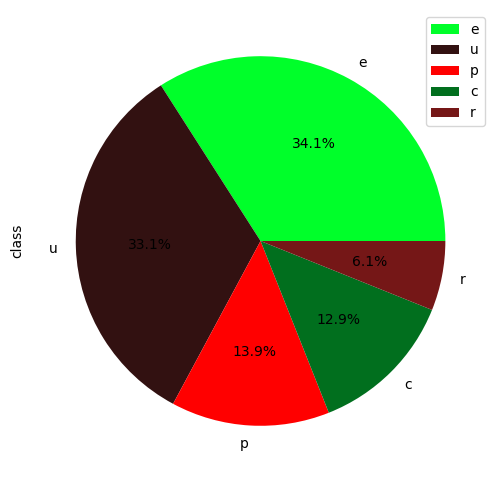

In [347]:
get_class_dist(multi_df)

Looking at the general feature overview, we can see that the numeric distributions generally show a same distribution as the Wagner et al. dataset. Furthermore, there do seem to be some differences in nominal value distributions, given that we have no single value variables. 

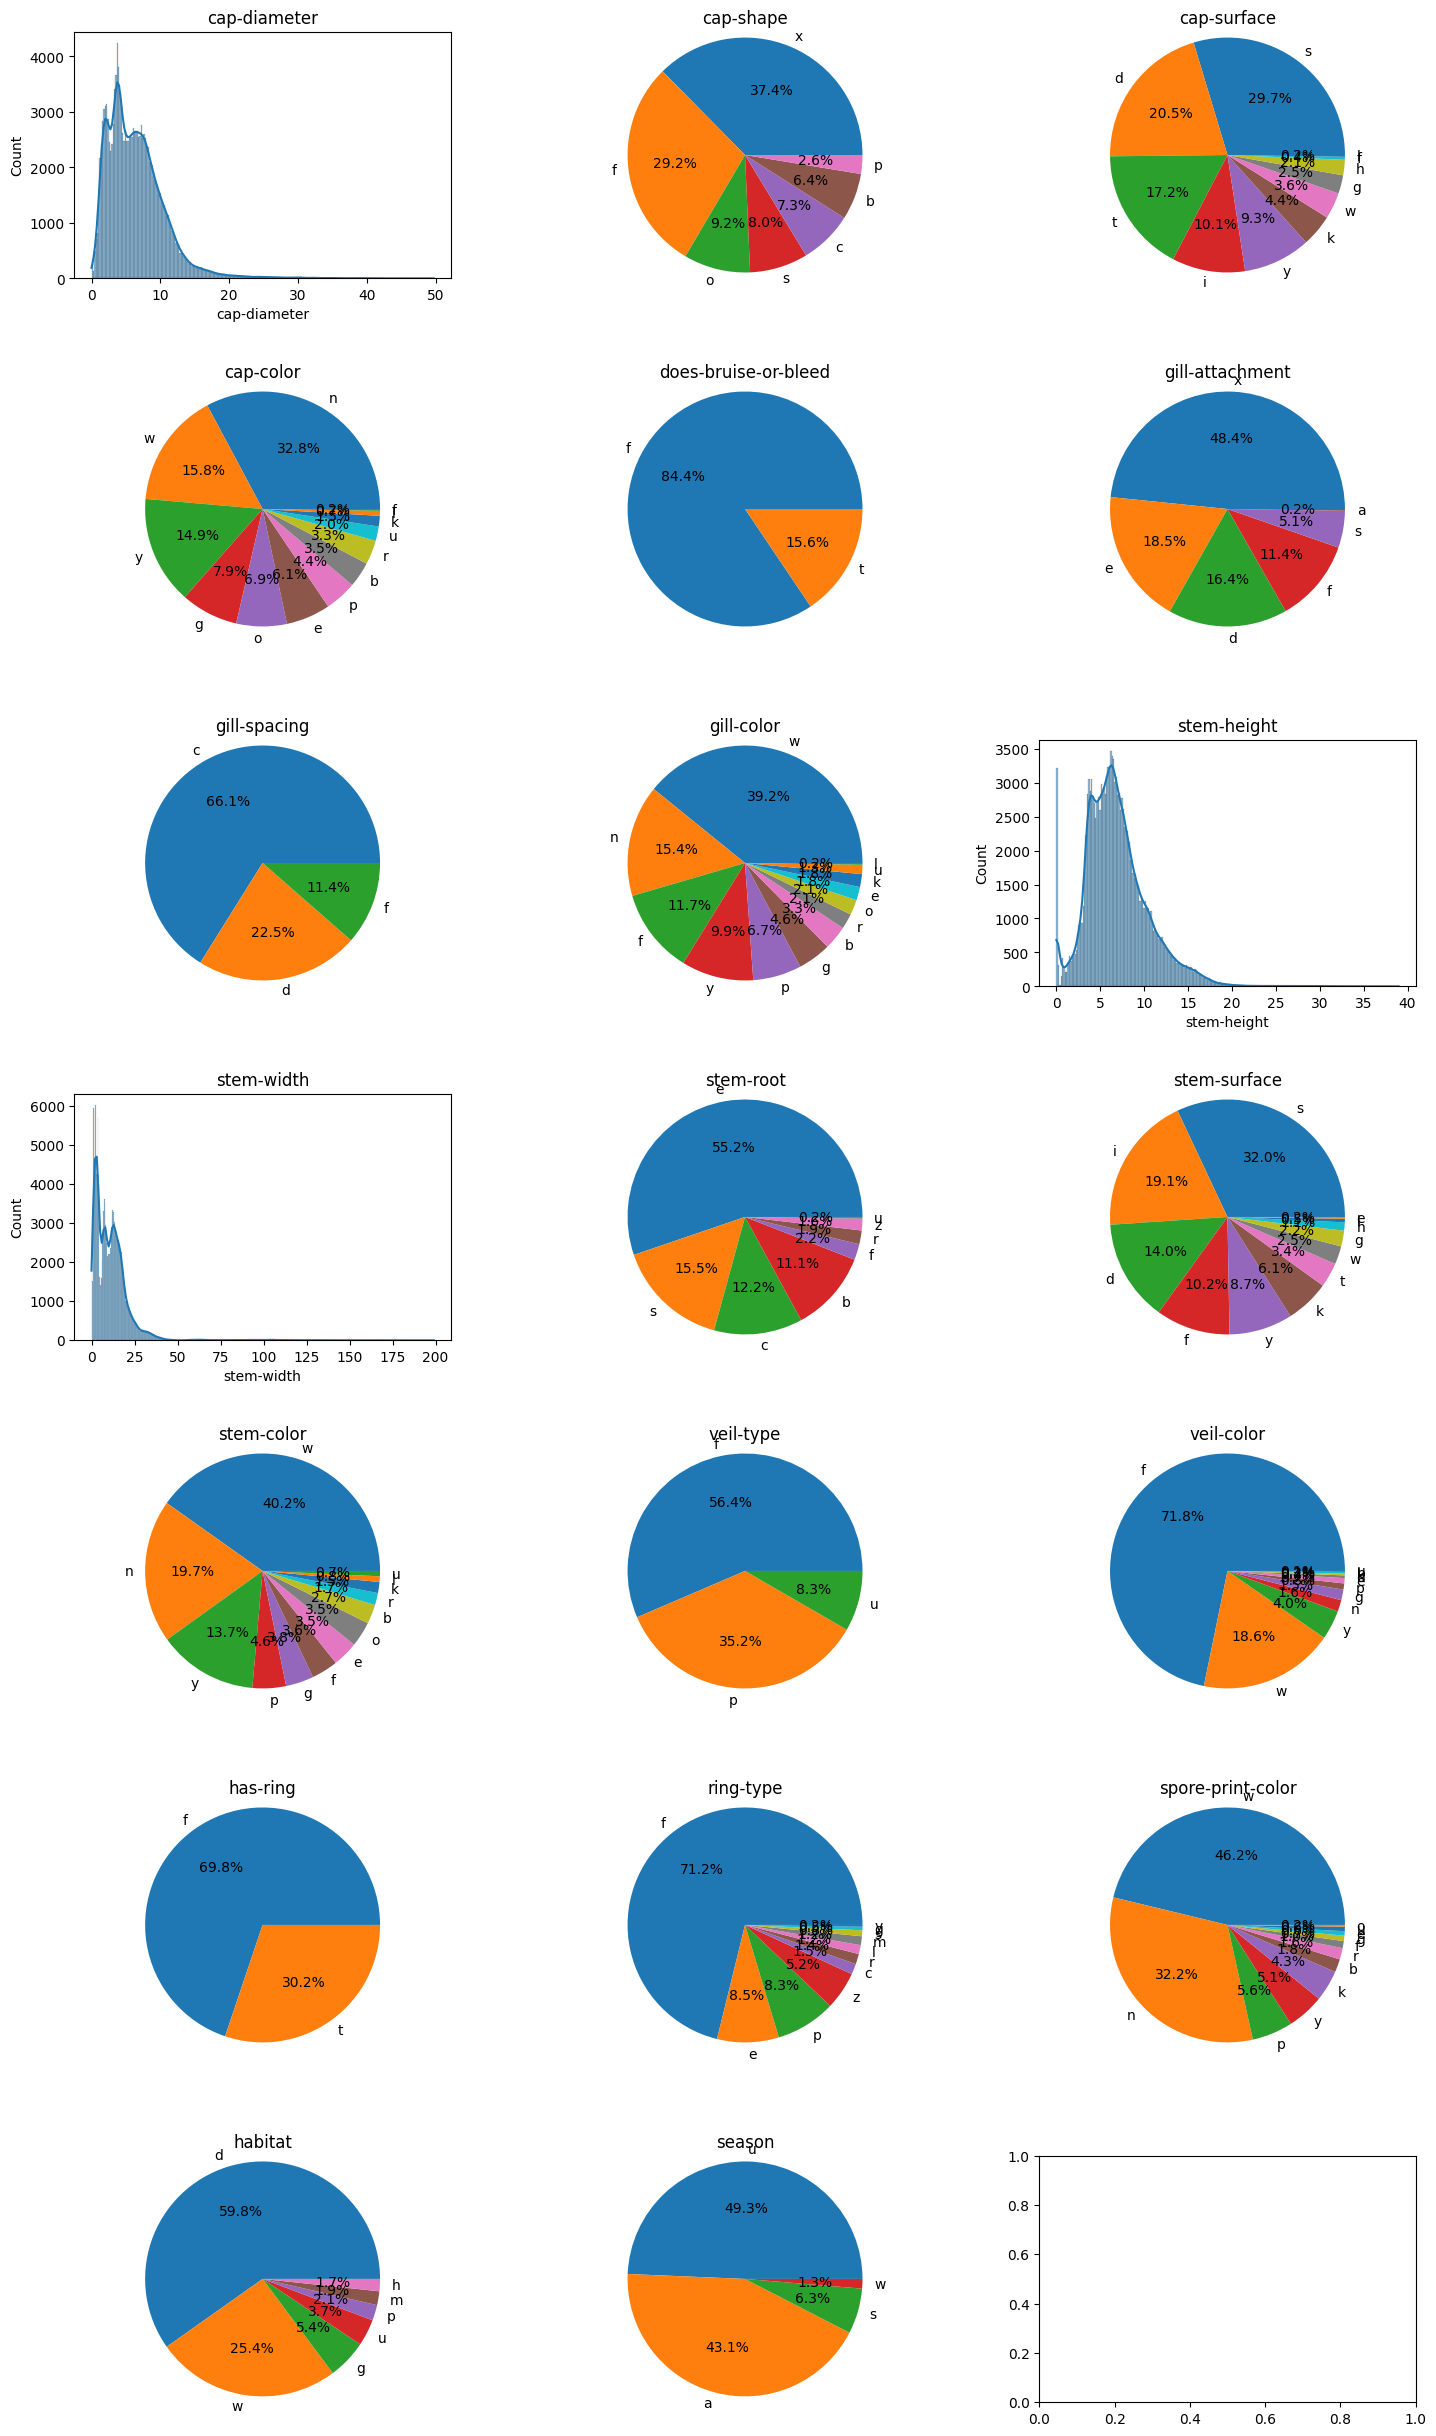

In [15]:
multi_df = multi_df.drop(['family', 'name'], axis=1)
get_feature_dist(multi_df)

For the missing value inspection, we find that there are no missing values in this dataset.

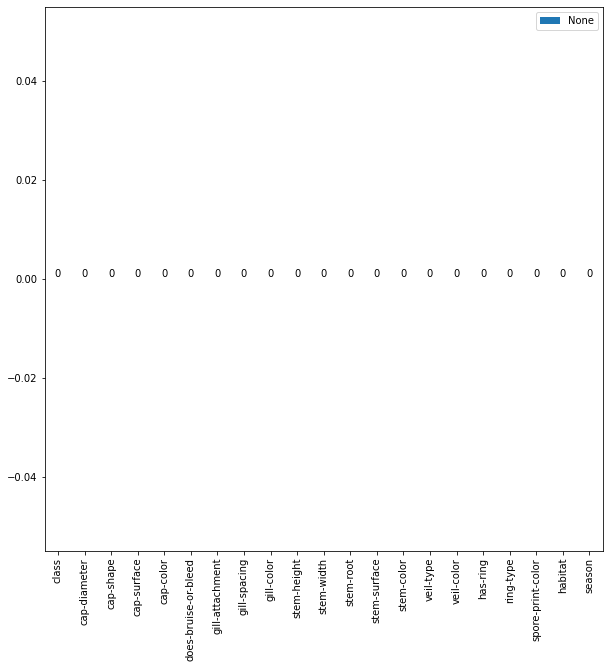

In [73]:
get_missing_values(multi_df)

The correlation heatmap shows a similar pattern to the Wagner et al. dataset, where the numeric features are the most correlated to the class label. This may be due to the simulation method picking a single value from the nominal feature lists, which means that a mushroom species which is poisonous with a convex and flat cap, and a mushroom species which is edible with a convex and spherical cap will both have instances with a convex cap, as only one of the list values is selected in the instance simulation.

This is a limitation that was noted by Wagner et al. as well. However, in order to keep the intercompatibility between the datasets such that we can explore the generalization of the algorithms, the decision was made not to adjust this simulation method. 
Noting this, it does appear like the correlations are a bit stronger in this dataset than in the Wagner et al. dataset.

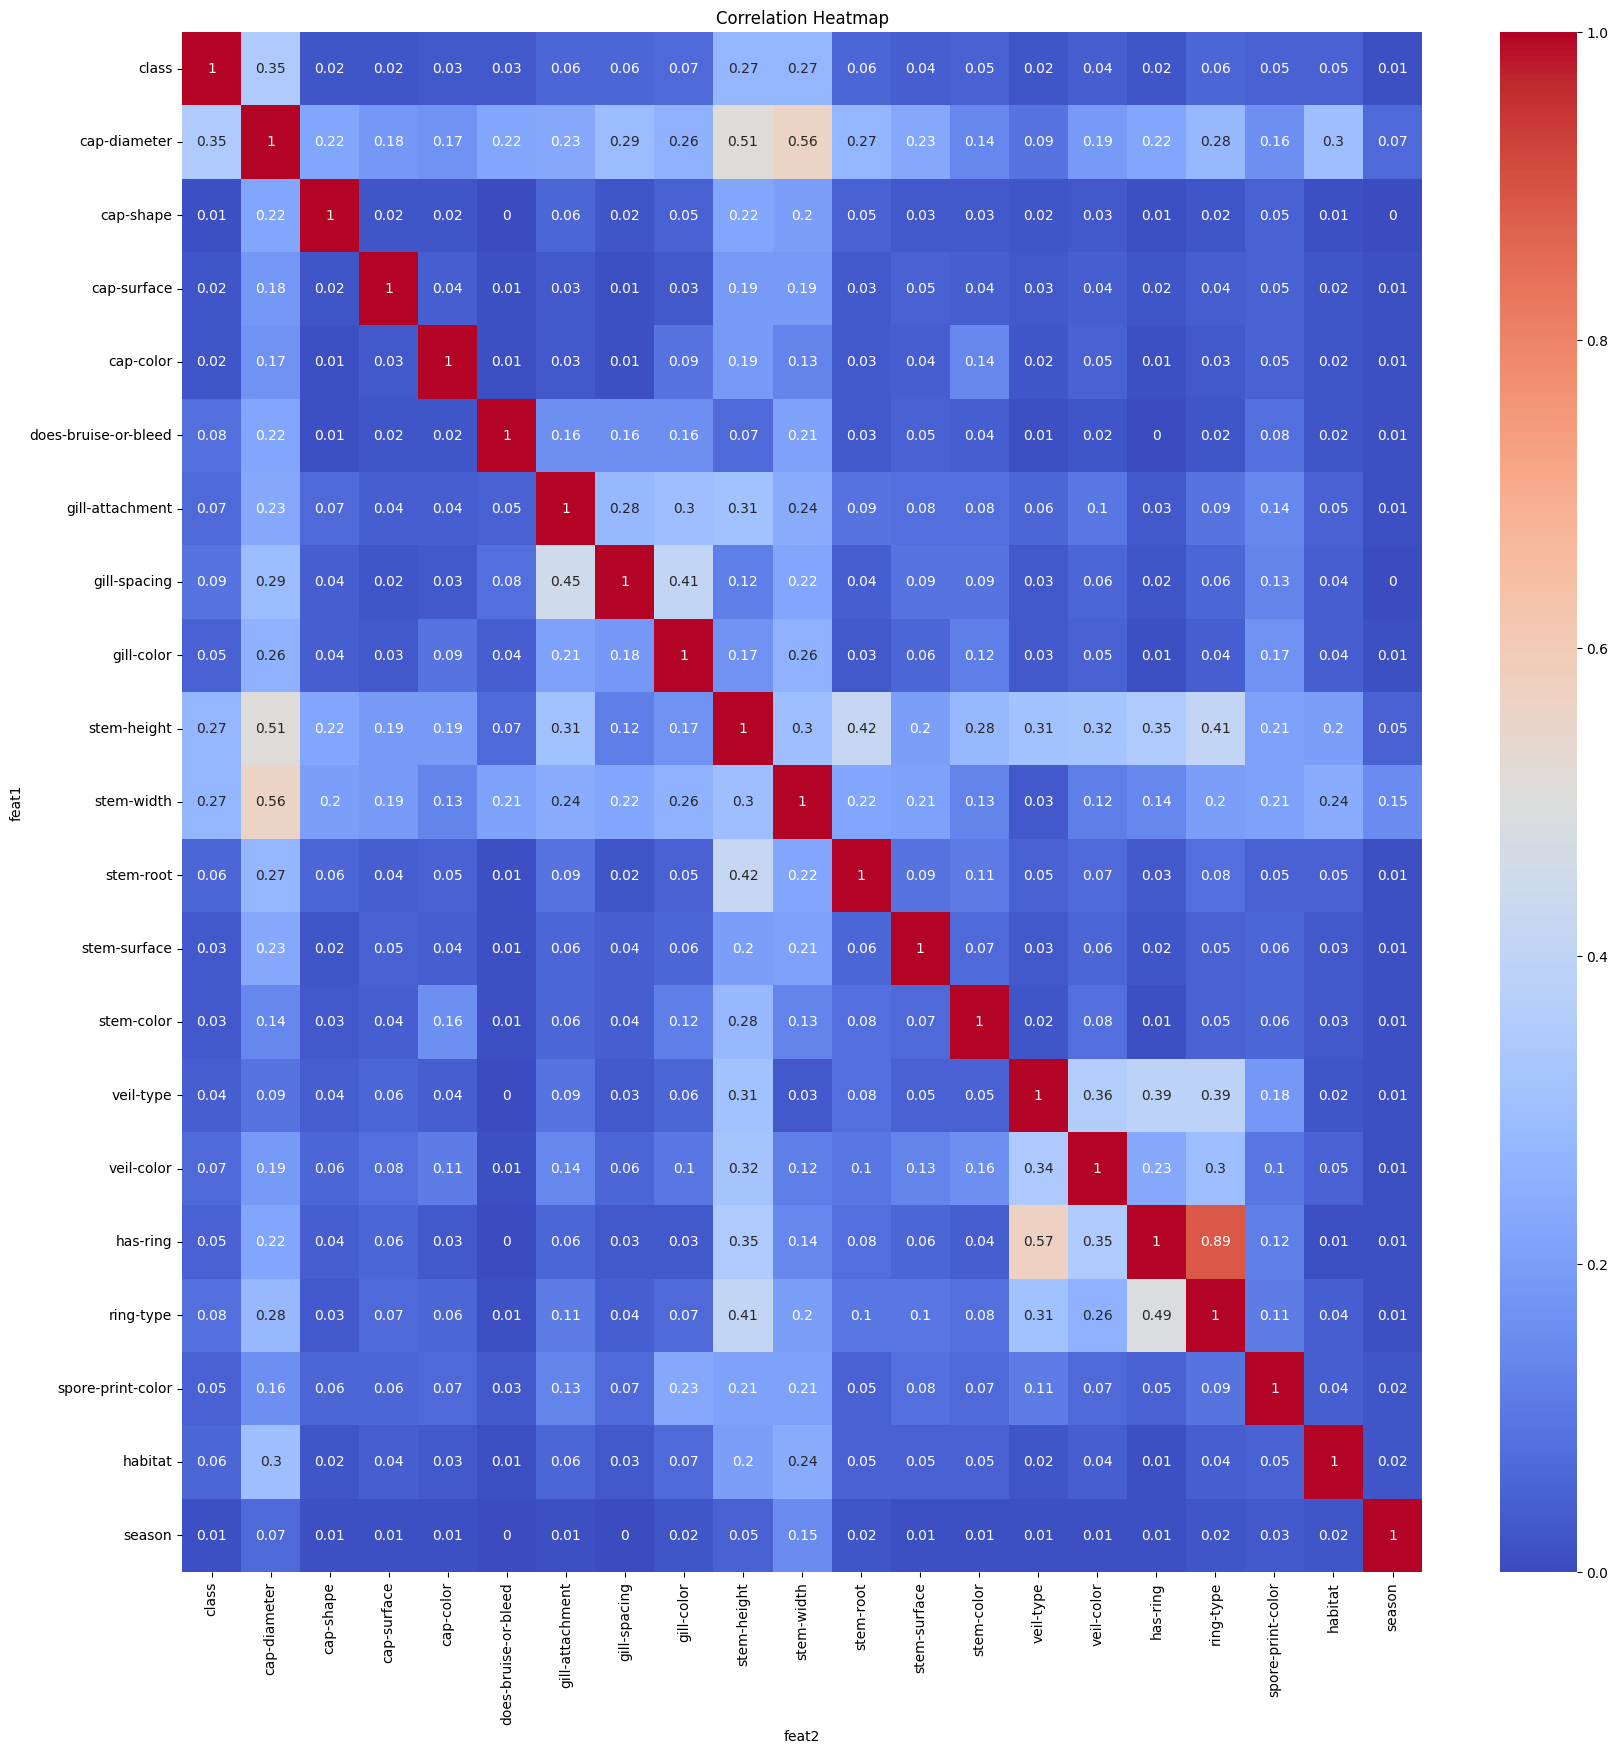

In [120]:
multi_corr = get_corr_heatmap(multi_df)

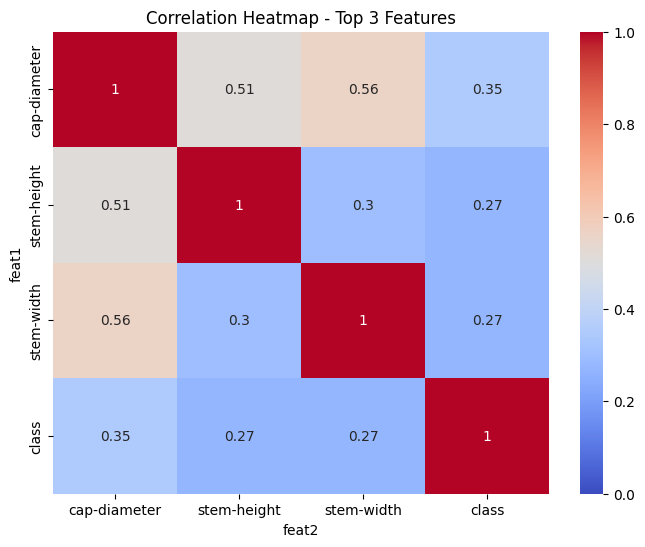

In [121]:
top_correlated(multi_corr, ['cap-diameter', 'stem-height', 'stem-width'])

The similarity between the Wagner dataset and the Multi dataset is seen with the distribution of *cap-diameter*. Whilst the variance around the peak in the multi is greater, the distribution is similarly skewed. As noted with the correlation heatmap, the correlation with the label is higher for the multi dataset, with 0.35.

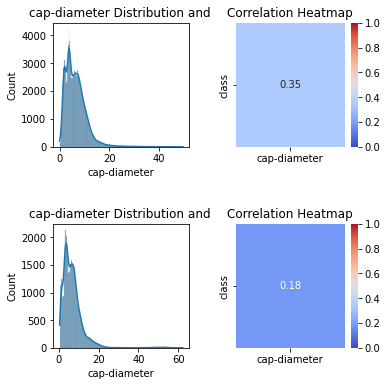

In [75]:
comparative_feature_analysis([[multi_df, 'cap-diameter', multi_corr],[wag_df, 'cap-diameter', wag_corr]])

The comparison of these features of different datasets is also useful as a sanity check. This is because all the datasets, although made through different methods and from different sources, are about the same physical phenomenon. Because of this, it would be strange to see significant variations in the feature distributions. *cap-shape* is one of those features that retains a similar distribution and correlation across all datasets.

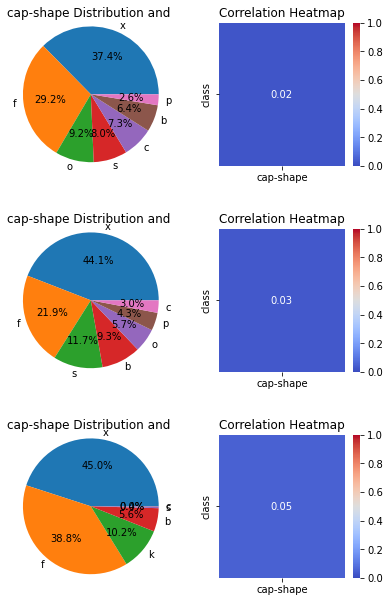

In [76]:
comparative_feature_analysis([[multi_df, 'cap-shape', multi_corr],[wag_df, 'cap-shape', wag_corr],[uci_df, 'cap-shape', uci_corr]])

Whilst the distribution of the multi dataset is not entirely the same as the UCI, similar values such as s (smooth), t (sticky) and d (dry) remain to be some of the most common values as see with the wagner dataset as well. Correlation remains to be low as well.

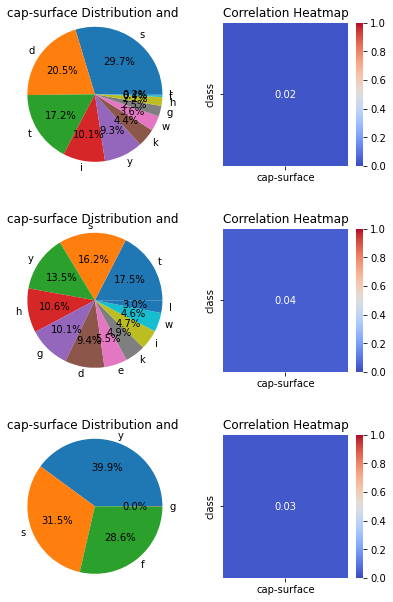

In [77]:
comparative_feature_analysis([[multi_df, 'cap-surface', multi_corr],[wag_df, 'cap-surface', wag_corr],[uci_df, 'cap-surface', uci_corr]])

*cap-color* also has a similar distribution to the Wagner dataset with the same correlation.

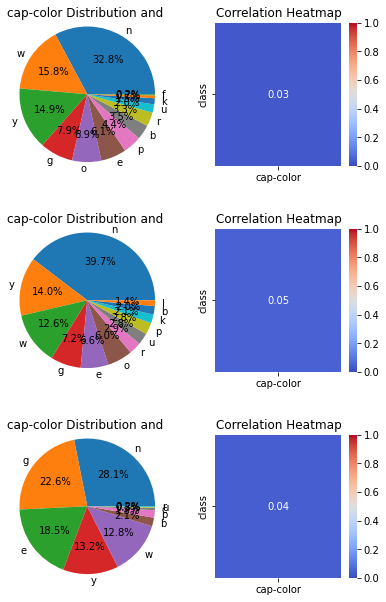

In [78]:
comparative_feature_analysis([[multi_df, 'cap-color', multi_corr],[wag_df, 'cap-color', wag_corr],[uci_df, 'cap-color', uci_corr]])

*bruise-or-bleed* is surpisingly similar as well, however this time a small correlation is noted in the multi dataset. Perhaps this may be due to the more detailed class labels allowing for higher resolution correlations.

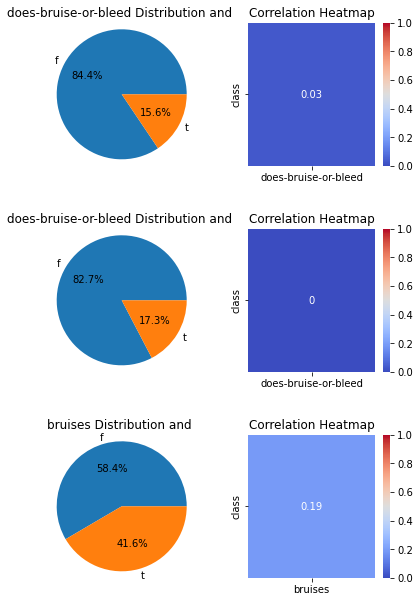

In [79]:
comparative_feature_analysis([[multi_df, 'does-bruise-or-bleed', multi_corr],[wag_df, 'does-bruise-or-bleed', wag_corr],[uci_df, 'bruises', uci_corr]])

*gill-attachment* shows a very different distribution fom the Wagner dataset and the UCI dataset. The reason why this may be the case is hard to deduce without access to the source material of the Wagner dataset and the methodology of the UCI dataset creation.

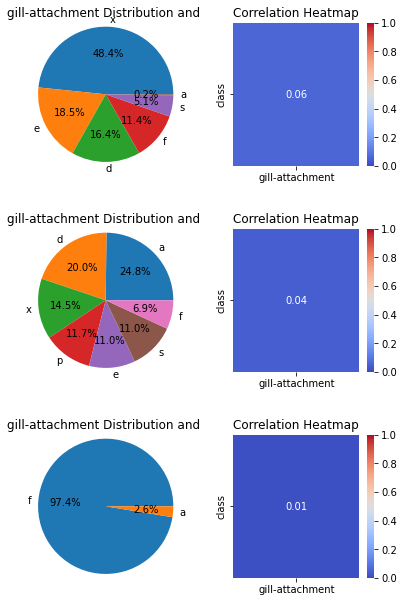

In [80]:
comparative_feature_analysis([[multi_df, 'gill-attachment', multi_corr],[wag_df, 'gill-attachment', wag_corr],[uci_df, 'gill-attachment', uci_corr]])

*gill-spacing* on the other hand shows a very similar distribution to the Wagner dataset, with a higher correlation.

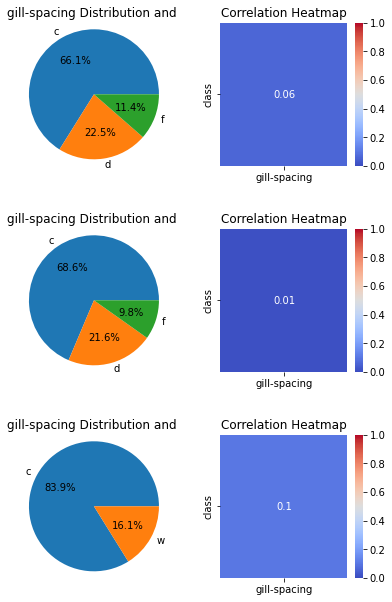

In [81]:
comparative_feature_analysis([[multi_df, 'gill-spacing', multi_corr],[wag_df, 'gill-spacing', wag_corr],[uci_df, 'gill-spacing', uci_corr]])

*gill-color* shows the same similarity and correlation as *gill-spacing*

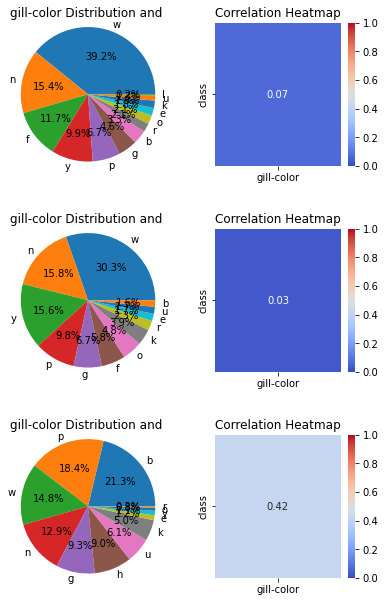

In [82]:
comparative_feature_analysis([[multi_df, 'gill-color', multi_corr],[wag_df, 'gill-color', wag_corr],[uci_df, 'gill-color', uci_corr]])

For *stem-height* and *stem-width* the same trend continues with similar distribution shaped and increased correlation to the class label

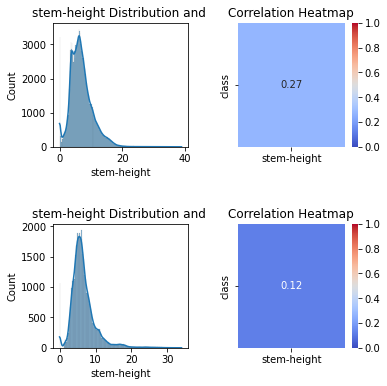

In [83]:
comparative_feature_analysis([[multi_df, 'stem-height', multi_corr],[wag_df, 'stem-height', wag_corr]])

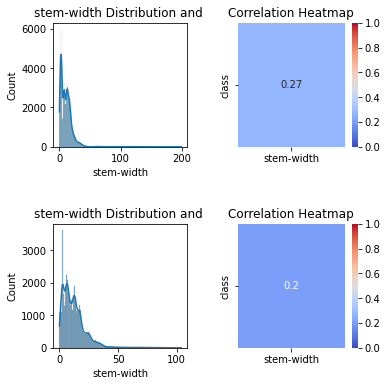

In [84]:
comparative_feature_analysis([[multi_df, 'stem-width', multi_corr],[wag_df, 'stem-width', wag_corr]])

In *stem-root* we find a difference in distribution again, which may be due to the e (equal) value being used when there is no difference noted between the stem and the root, whereas this may have not been entered as a value in the Wagner dataset. This would explain the large amount of missing features in that dataset.

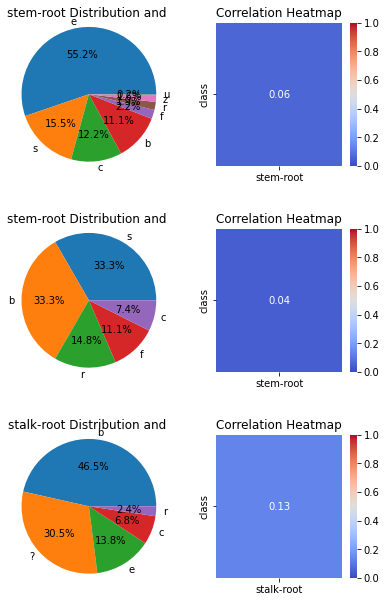

In [85]:
comparative_feature_analysis([[multi_df, 'stem-root', multi_corr],[wag_df, 'stem-root', wag_corr],[uci_df, 'stalk-root', uci_corr]])

For *stem-surface* and *stem-color* we see a similar distribution and correlation with the Wagner DF.

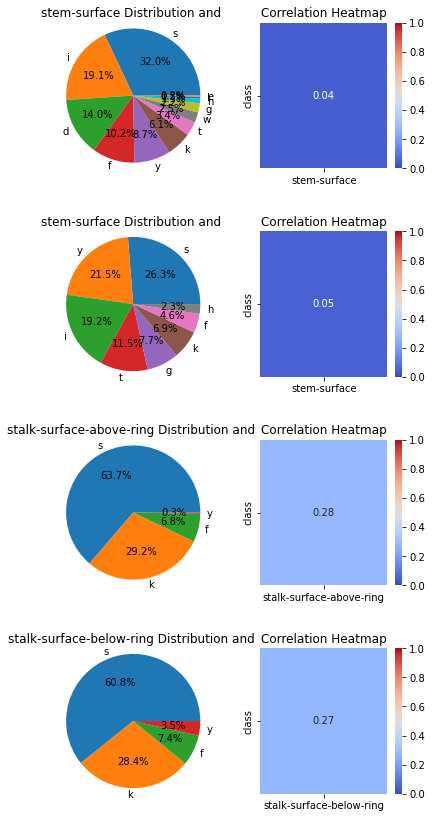

In [86]:
comparative_feature_analysis([[multi_df, 'stem-surface', multi_corr],[wag_df, 'stem-surface', wag_corr],[uci_df, 'stalk-surface-above-ring', uci_corr],[uci_df, 'stalk-surface-below-ring', uci_corr]])

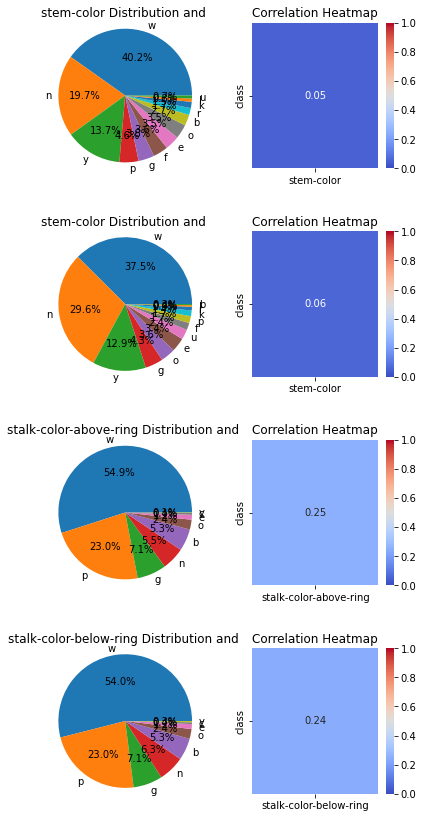

In [87]:
comparative_feature_analysis([[multi_df, 'stem-color', multi_corr],[wag_df, 'stem-color', wag_corr],[uci_df, 'stalk-color-above-ring', uci_corr],[uci_df, 'stalk-color-below-ring', uci_corr]])

The Multi dataset is the first dataset to show different values for the *veil-type*, where most mushrooms have f (none) no veil, 1/3rd have a p (partial) veil and 8% has a u (universal) veil. Due to this feature having some values now, it also shows a small correlation to the class label.

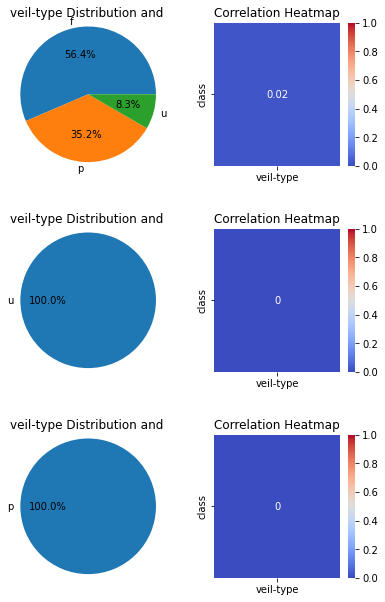

In [88]:
comparative_feature_analysis([[multi_df, 'veil-type', multi_corr],[wag_df, 'veil-type', wag_corr],[uci_df, 'veil-type', uci_corr]])

The *veil-color* is remarkably similar to the distribution of the Wagner dataset, although here 70% of the values are f (none) instead of w(white). This is likely due to the Wagner dataset not labelling instances with no veil, but instead having a missing value there. 

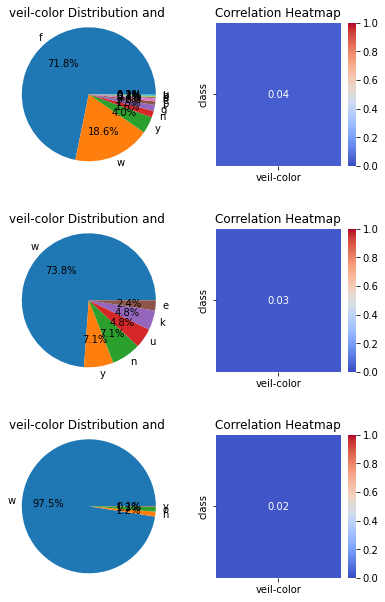

In [89]:
comparative_feature_analysis([[multi_df, 'veil-color', multi_corr],[wag_df, 'veil-color', wag_corr],[uci_df, 'veil-color', uci_corr]])

For *has-ring* we see a slight increase in the Mushroom instances with ring, as compared to the Wagner dataset. Although this difference is not that great.

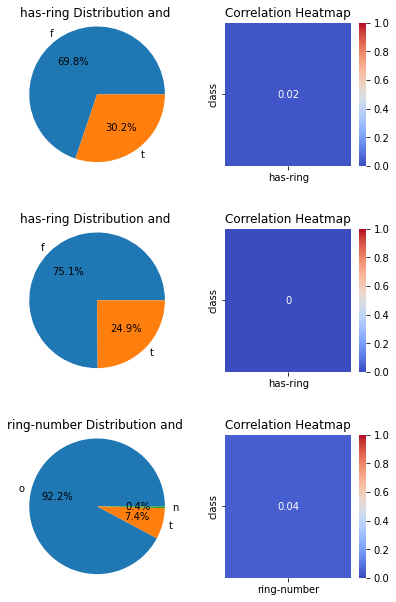

In [90]:
comparative_feature_analysis([[multi_df, 'has-ring', multi_corr],[wag_df, 'has-ring', wag_corr],[uci_df, 'ring-number', uci_corr]])

The range of *ring-type* values is greater, with about 10% less none type rings. This may be due to the wider range of mushroom families that this dataset covers.

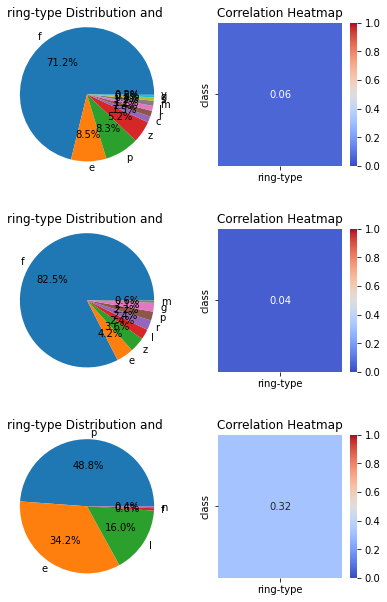

In [91]:
comparative_feature_analysis([[multi_df, 'ring-type', multi_corr],[wag_df, 'ring-type', wag_corr],[uci_df, 'ring-type', uci_corr]])

For *spore-print-color* it is interesting to observe that the most common values for the Multi dataset and the Wagner dataset both differ quite a bit. This may be due to the coverage of different mushroom families, but is more likely due to the large number of missing values found in the Wagner dataset for this feature, which account for about a majority of the instances, thus creating a likely unrepresentative distribution.

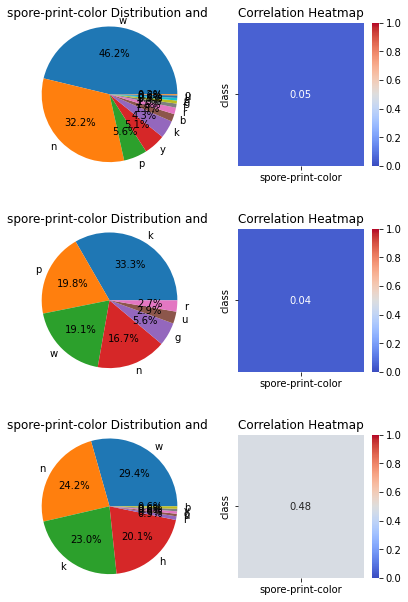

In [92]:
comparative_feature_analysis([[multi_df, 'spore-print-color', multi_corr],[wag_df, 'spore-print-color', wag_corr],[uci_df, 'spore-print-color', uci_corr]])

*habitat* does show a greater similarity, although w (waste) values are a lot more common in the multi dataset.

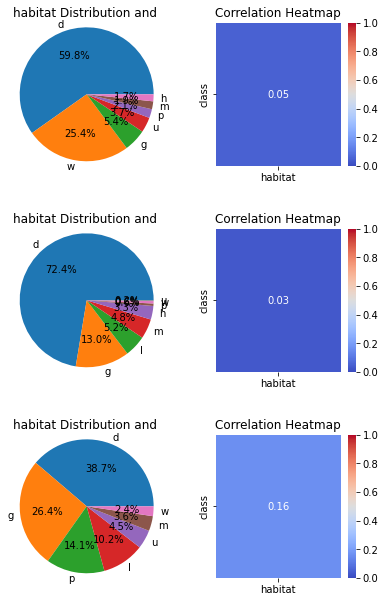

In [93]:
comparative_feature_analysis([[multi_df, 'habitat', multi_corr],[wag_df, 'habitat', wag_corr],[uci_df, 'habitat', uci_corr]])

The *season* distributions are surprisingly similar, which may indicate that both datasets are covering the same phenomenon, although that would contradict some strong differences that we've seen with other features.

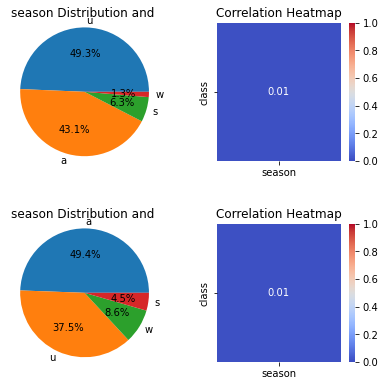

In [94]:
comparative_feature_analysis([[multi_df, 'season', multi_corr],[wag_df, 'season', wag_corr]])

### **Data check**

Since the Multi dataframe bases its simulations on the same source as the UCI dataset, it will not be used in the model training and testing. However, the mushroom species that the Multi dataset covers are also covered by the Wagner dataset. Since we intend to use this dataset as a testing dataset, we should ensure that no identical columns are present in the dataset, such that we don't feed it potential training data.

To test this, we will perform an inner merge on the two dataframes, which should include only those instances that are found in both dataframes

In [149]:
# Merge the DataFrames based on common columns
merged_df = pd.merge(multi_df, wag_df, how='inner')

# Check if there are any rows in the merged DataFrame
if not merged_df.empty:
    print("Identical rows have been found.")
    merged_df
else:
    print("No identical rows have been found.")

No identical rows have been found.


This is also unlikely, as only Bay Bolete, Bitter Bolete, Changeable Melanoleuca, Death Cap, Destroying Angel, False Chanterelle, Fly Agaric, Fragile Russula, Horse Mushroom, Orange Moss Agaric, Oyster Mushroom, Parasitic Bolete, Peppery Bolete, Parasol Mushroom, Poison Pie, Red-cracked Bolete, Shaggy Parasol, Slippery Jack, Spring Agaric, Sulphur Tuft, Tawny Grisette,Yellow-cracked Bolete are shared mushroom species between the two datasets.

## **Data Preprocessing**

Now that we've looked at all the datasets, it is time to prepare the data for the models. For this there are a few things that need to be done/kept in mind.
* Both the Multi dataset and Wagner dataset will be used in evaluation, with the Multi dataset being used for training and testing the multiclass scores and the Wagner dataset testing the generalizability.
* The UCI dataset will be used for the Literature models as a sanity check to see whether the models live up to their reported performance using the same dataset.
* As such the Multi and Wagner dataset need to undergo similar pre-processing to make them compatible, which means the dropping, replacing or imputing of the missing features in the Wagner dataset
* The Multi dataset will be the only dataset properly trained on, as such it needs to be split for train/test
* The Multi dataset also needs to be shuffled, as currently all the instances are sorted by family and specie
* Any further feature operations will be model specific (including the UCI split for the sanity check) and thus be introduced per model.


### Multi Dataset Shuffle

Let's begin with shuffling the Multi Dataset, which is still sorted by family and specie, which could influence the train/test split and thus our results. 
Before we do anything, let's take a look at the head of the dataset to see if we can detect differences before and after our actions.

In [95]:
multi_df

class  cap-diameter cap-shape cap-surface cap-color  \
0          c         11.29         x           s         w   
1          c         10.09         x           i         w   
2          c         11.37         f           k         w   
3          c         12.45         x           i         w   
4          c         11.62         f           s         w   
...      ...           ...       ...         ...       ...   
145078     u          5.80         x           y         n   
145079     u          6.21         x           y         n   
145080     u          6.14         x           i         y   
145081     u          5.46         x           i         y   
145082     u          5.83         x           i         n   

       does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                         t               e            c          n   
1                         t               e            c          n   
2                         t               e            c          p   
3                         t               e            c          n   
4                         t               e            c          p   
...                     ...             ...          ...        ...   
145078                    f               d            c          n   
145079                    f               d            c          y   
145080                    f               s            c          w   
145081                    f               d            c          y   
145082                    f               d            c          n   

        stem-height  ...  stem-root stem-surface stem-color veil-type  \
0             12.37  ...          b            s          w         p   
1              9.43  ...          b            s          w         p   
2             13.65  ...          b            s          w         p   
3             12.64  ...          b            s          w         p   
4             13.29  ...          b            s          w         p   
...             ...  ...        ...          ...        ...       ...   
145078         5.36  ...          e            i          n         f   
145079         5.20  ...          e            i          n         f   
145080         4.27  ...          e            i          y         f   
145081         5.48  ...          e            i          y         f   
145082         5.58  ...          e            i          n         f   

       veil-color has-ring ring-type spore-print-color habitat season  
0               w        f         f                 n       d      u  
1               w        f         f                 u       d      u  
2               w        f         f                 u       d      u  
3               w        f         f                 u       d      a  
4               w        f         f                 n       d      u  
...           ...      ...       ...               ...     ...    ...  
145078          f        f         f                 w       w      u  
145079          f        f         f                 w       w      a  
145080          f        f         f                 w       w      u  
145081          f        f         f                 w       w      a  
145082          f        f         f                 w       w      u  

[145083 rows x 21 columns]

Using the sample method, we can sample instances from our dataframe at random. Using frac=1 we ensure that we sample the entire dataset and random_state=1 allows for reproducible results.

In [17]:
multi_df = multi_df.sample(frac=1,random_state=1).reset_index()

Looking at the results below, we can see that the shuffling has worked, as we can compare the old index to the current index number. However, the old index remains to be listed as a feature. 

In [97]:
multi_df

index class  cap-diameter cap-shape cap-surface cap-color  \
0        85729     e          6.11         o           t         l   
1        60112     u          3.47         f           s         n   
2        69504     e          9.94         o           i         r   
3       113634     e         19.89         f           s         w   
4        36492     c          7.81         p           t         n   
...        ...   ...           ...       ...         ...       ...   
145078   73349     e          3.02         c           s         o   
145079  109259     u          2.05         f           d         e   
145080   50057     u          3.93         f           d         n   
145081    5192     u          1.89         f           y         u   
145082  128037     u          3.76         x           s         y   

       does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                         t               x            c          n  ...   
1                         f               x            c          n  ...   
2                         f               d            c          w  ...   
3                         f               d            c          b  ...   
4                         f               f            f          f  ...   
...                     ...             ...          ...        ...  ...   
145078                    f               x            d          o  ...   
145079                    f               x            c          w  ...   
145080                    f               x            c          n  ...   
145081                    f               x            d          n  ...   
145082                    f               x            c          b  ...   

        stem-root  stem-surface stem-color veil-type veil-color has-ring  \
0               c             d          l         f          f        f   
1               c             h          g         f          f        f   
2               e             d          b         f          f        f   
3               e             d          w         f          f        f   
4               e             f          n         p          w        t   
...           ...           ...        ...       ...        ...      ...   
145078          e             s          y         f          f        f   
145079          e             i          p         f          f        f   
145080          s             i          p         p          p        f   
145081          s             g          g         u          n        f   
145082          e             i          y         f          f        f   

       ring-type spore-print-color habitat season  
0              f                 y       d      a  
1              f                 n       d      a  
2              f                 w       d      a  
3              f                 w       w      u  
4              s                 n       d      a  
...          ...               ...     ...    ...  
145078         f                 w       d      u  
145079         f                 w       g      u  
145080         f                 n       d      a  
145081         f                 w       d      a  
145082         f                 w       w      u  

[145083 rows x 22 columns]

Since the index feature holds no value to our modeling, we drop it.

In [18]:
multi_df = multi_df.drop('index', axis=1)

In [99]:
multi_df

class  cap-diameter cap-shape cap-surface cap-color  \
0          e          6.11         o           t         l   
1          u          3.47         f           s         n   
2          e          9.94         o           i         r   
3          e         19.89         f           s         w   
4          c          7.81         p           t         n   
...      ...           ...       ...         ...       ...   
145078     e          3.02         c           s         o   
145079     u          2.05         f           d         e   
145080     u          3.93         f           d         n   
145081     u          1.89         f           y         u   
145082     u          3.76         x           s         y   

       does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                         t               x            c          n   
1                         f               x            c          n   
2                         f               d            c          w   
3                         f               d            c          b   
4                         f               f            f          f   
...                     ...             ...          ...        ...   
145078                    f               x            d          o   
145079                    f               x            c          w   
145080                    f               x            c          n   
145081                    f               x            d          n   
145082                    f               x            c          b   

        stem-height  ...  stem-root stem-surface stem-color veil-type  \
0              2.79  ...          c            d          l         f   
1             14.17  ...          c            h          g         f   
2              9.96  ...          e            d          b         f   
3              4.77  ...          e            d          w         f   
4              5.11  ...          e            f          n         p   
...             ...  ...        ...          ...        ...       ...   
145078         8.09  ...          e            s          y         f   
145079         1.95  ...          e            i          p         f   
145080         4.03  ...          s            i          p         p   
145081         5.74  ...          s            g          g         u   
145082         4.68  ...          e            i          y         f   

       veil-color has-ring ring-type spore-print-color habitat season  
0               f        f         f                 y       d      a  
1               f        f         f                 n       d      a  
2               f        f         f                 w       d      a  
3               f        f         f                 w       w      u  
4               w        t         s                 n       d      a  
...           ...      ...       ...               ...     ...    ...  
145078          f        f         f                 w       d      u  
145079          f        f         f                 w       g      u  
145080          p        f         f                 n       d      a  
145081          n        f         f                 w       d      a  
145082          f        f         f                 w       w      u  

[145083 rows x 21 columns]

### Missing Value Handling

Now that we have shuffled the Mutli dataset and there are no missing values in it, there are no further operations that we need to do on it before encoding it and splitting it for the train/test split. 
The same cannot be said for the Wagner dataset, which has a number of missing values as seen before.

Here some features (*cap-surface, gill-attachment, gill-spacing, has-ring*) are only missing a small part of their values, whereas other features (*stem-root, stem-surface, veil-type, veil-color, spore-print-color*) are missing over half their features. 

When it comes to missing features, there are 2 options we're faced with to process them in order to make the dataset fit most other datasets.

* Impute the values
> Imputation refers to filling in a value ourselves, either by a simple method (choosing the mean or most common value) or via an estimator ( RandomForests, Logistic Regression, etc). 
* Drop the features
> Remove the feature from the dataset such that we only work with the provided values and do not need to work with NaN values.

The advantage of imputing values is that one can use the feature and the recorded values for it, whereas with dropping the features this information gets lost. However, since imputation is either a simple guess or another classification task, this may not result in accurate values, especially when a lot of data of the feature is missing. Therefor, features that tend to have over half their features missing do not get imputed, but rather dropped.

This is what Wagner et al. did for their dataset, however because we now have a dataset covering the same phenomenon with the same encoding that has 145.081 recorded values, even the highest amount of missing values, of about 50.000, will not constitute half of the values if both datasets are combined for imputation. This would allow for the inclusion of these features in training the Multi dataset (as it will later be used to test on the Wagner dataset), however it will be based on the assumption that both datasets are related in such a way that with knowledge of one dataset we can impute the values of the other dataset. Also, since we have a great number of missing values, just using a simple method of imputation can have a great effect on changing the dataset. As such, one would have to use an Iterative imputer, which basically constitutes its own Machine Learning classification task, with choice of model and iterations. Given that this would broaden the scope of this research beyond its intention, some assumptions would need to be made that cannot be extensively tested against alternative options. However, given the limited correlation between features, it is unknown how much the information loss of dropping these features would impact the performance of the model.

As such, we will use two options for handling missing values.
* Imputation with Random Forests
> Here we merge the Multi and Wagner datasets and impute the missing values using the RandomForestsClassifier as estimator, with default parameters, as it has been recognized as a good method for imputation and it does not presume a linear relation between the feature, such as LinearRegression may do.

> To start off we need to encode our dataset such that we can perform operations on it. For imputation ranked encoding has been chosen, as it retains the original dataframe columns, as opposed to one-hot-encoding, which creates new additional columns. As we want to retrieve the datasets back to original state (with imputed NaNs), the ranked encoding is done manually via dictionary mapping

In [19]:
def apply_mapping(df):
    df['class'] = df['class'].replace({'p' : 0, 'e' : 1, 'c' : 2, 'r' : 3, 'u' : 4})
    df['cap-shape'] = df['cap-shape'].replace({'b' : 0, 'c' : 1, 'x' : 2, 'f' : 3, 's' : 4, 'p' : 5, 'o' : 6})
    df['cap-surface'] = df['cap-surface'].replace({'i' : 0, 'g' : 1, 'y' : 2, 's' : 3, 'd' : 4, 'h' : 5, 'l' : 6, 'k' : 7, 't' : 8, 'w' : 9, 'e' : 10, 'f' : 11})
    df['cap-color'] = df['cap-color'].replace({'n' : 0, 'b' : 1, 'g' : 2, 'r' : 3, 'p' : 4, 'u' : 5, 'e' : 6, 'w' : 7, 'y' : 8, 'l' : 9, 'o' : 10, 'k' : 11, 'f' : 12})
    df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].replace({'f' : 0, 't' : 1})
    df['gill-attachment'] = df['gill-attachment'].replace({'a' : 0, 'x' : 1, 'd' : 2, 'e' : 3, 's' : 4, 'p' : 5, 'f' : 6})
    df['gill-spacing'] = df['gill-spacing'].replace({'c' : 0, 'd' : 1, 'f' : 2})
    df['gill-color'] = df['gill-color'].replace({'n' : 0, 'b' : 1, 'g' : 2, 'r' : 3, 'p' : 4, 'u' : 5, 'e' : 6, 'w' : 7, 'y' : 8, 'l' : 9, 'o' : 10, 'k' : 11, 'f' : 12})
    df['stem-root'] = df['stem-root'].replace({'b' : 0, 's' : 1, 'c' : 2, 'u' : 3, 'e' : 4, 'z' : 5, 'r' : 6, 'f' : 7})
    df['stem-surface'] = df['stem-surface'].replace({'i' : 0, 'g' : 1, 'y' : 2, 's' : 3, 'd' : 4, 'h' : 5, 'l' : 6, 'k' : 7, 't' : 8, 'w' : 9, 'e' : 10, 'f' : 11})
    df['stem-color'] = df['stem-color'].replace({'n' : 0, 'b' : 1, 'g' : 2, 'r' : 3, 'p' : 4, 'u' : 5, 'e' : 6, 'w' : 7, 'y' : 8, 'l' : 9, 'o' : 10, 'k' : 11, 'f' : 12})
    df['veil-type'] = df['veil-type'].replace({'p' : 0, 'u' : 1, 'f' : 2})
    df['veil-color'] = df['veil-color'].replace({'n' : 0, 'b' : 1, 'g' : 2, 'r' : 3, 'p' : 4, 'u' : 5, 'e' : 6, 'w' : 7, 'y' : 8, 'l' : 9, 'o' : 10, 'k' : 11, 'f' : 12})
    df['has-ring'] = df['has-ring'].replace({'f' : 0, 't' : 1})
    df['ring-type'] = df['ring-type'].replace({'c' : 0, 'e' : 1, 'r' : 2, 'g' : 3, 'l' : 4, 'p' : 5, 's' : 6, 'z' : 7, 'y' : 8, 'm' : 9, 'f' : 10})
    df['spore-print-color'] = df['spore-print-color'].replace({'n' : 0, 'b' : 1, 'g' : 2, 'r' : 3, 'p' : 4, 'u' : 5, 'e' : 6, 'w' : 7, 'y' : 8, 'l' : 9, 'o' : 10, 'k' : 11, 'f' : 12})
    df['habitat'] = df['habitat'].replace({'g' : 0, 'l' : 1, 'm' : 2, 'p' : 3, 'h' : 4, 'u' : 5, 'w' : 6, 'd' : 7})
    df['season'] = df['season'].replace({'s' : 0, 'u' : 1, 'a' : 2, 'w' : 3})

> Once we have our mapping, we also want to be able to reverse the mapping such that we can decode our dataset once we're done. Since we have continuous variables, we need to use a Regression function to impute the NaNs. This can result in floats which cannot be mapped to values. As such, the columns with missing values are changed to integers before reversing the mapping

In [20]:
def reverse_mapping(df):
    df['class'] = df['class'].replace({ 0 : 'p', 1 : 'e', 2: 'c', 3 : 'r', 4 : 'u'})
    df['cap-shape'] = df['cap-shape'].replace({0 : 'b' , 1 : 'c', 2 : 'x' , 3 : 'f', 4 : 's',  5 : 'p', 6 : 'o'})
    df['cap-surface'] = df['cap-surface'].astype(int)
    df['cap-surface'] = df['cap-surface'].replace({0 : 'i', 1 : 'g', 2 : 'y', 3 : 's' , 4 : 'd', 5 : 'h', 6 : 'l', 7 : 'k', 8 : 't',  9 : 'w', 10 : 'e', 11 : 'f'})
    df['cap-color'] = df['cap-color'].replace({ 0 : 'n', 1 : 'b', 2 : 'g', 3 : 'r',  4 : 'p', 5 : 'u', 6 : 'e',  7 : 'w', 8 : 'y', 9 : 'l', 10 : 'o',  11 : 'k', 12 : 'f'})
    df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].replace({0 : 'f', 1 : 't'})
    df['gill-attachment'] = df['gill-attachment'].astype(int)
    df['gill-attachment'] = df['gill-attachment'].replace({0 : 'a', 1 : 'x', 2 : 'd', 3 : 'e',  4 : 's',  5 : 'p', 6 : 'f'})
    df['gill-spacing'] = df['gill-spacing'].astype(int)
    df['gill-spacing'] = df['gill-spacing'].replace({ 0 : 'c', 1 : 'd', 2 : 'f'})
    df['gill-color'] = df['gill-color'].replace({ 0 : 'n', 1 : 'b', 2 : 'g', 3 : 'r',  4 : 'p', 5 : 'u', 6 : 'e',  7 : 'w', 8 : 'y', 9 : 'l', 10 : 'o',  11 : 'k', 12 : 'f'})
    df['stem-root'] = df['stem-root'].astype(int)
    df['stem-root'] = df['stem-root'].replace({0 : 'b' , 1 : 's', 2 : 'c', 3 : 'u',  4 : 'e',  5 : 'z',  6 :'r', 7 : 'f'})
    df['stem-surface'] = df['stem-surface'].astype(int)
    df['stem-surface'] = df['stem-surface'].replace({0 : 'i', 1 : 'g', 2 : 'y', 3 : 's' , 4 : 'd', 5 : 'h', 6 : 'l', 7 : 'k', 8 : 't',  9 : 'w', 10 : 'e', 11 : 'f'})
    df['stem-color'] = df['stem-color'].replace({ 0 : 'n', 1 : 'b', 2 : 'g', 3 : 'r',  4 : 'p', 5 : 'u', 6 : 'e',  7 : 'w', 8 : 'y', 9 : 'l', 10 : 'o',  11 : 'k', 12 : 'f'})
    df['veil-type'] = df['veil-type'].astype(int)
    df['veil-type'] = df['veil-type'].replace({ 0 : 'p',  1 : 'u',  2 : 'f'})
    df['veil-color'] = df['veil-color'].astype(int)
    df['veil-color'] = df['veil-color'].replace({ 0 : 'n', 1 : 'b', 2 : 'g', 3 : 'r',  4 : 'p', 5 : 'u', 6 : 'e',  7 : 'w', 8 : 'y', 9 : 'l', 10 : 'o',  11 : 'k', 12 : 'f'})
    df['has-ring'] = df['has-ring'].replace({0 : 'f', 1 : 't'})
    df['ring-type'] = df['ring-type'].astype(int)
    df['ring-type'] = df['ring-type'].replace({ 0 : 'c',  1 : 'e', 2 : 'r',  3 : 'r',  4 : 'l', 5 : 'p' ,  6 : 's',  7 : 'z', 8 : 'y',  9 : 'm',  10 : 'f'})
    df['spore-print-color'] = df['spore-print-color'].astype(int)
    df['spore-print-color'] = df['spore-print-color'].replace({ 0 : 'n', 1 : 'b', 2 : 'g', 3 : 'r',  4 : 'p', 5 : 'u', 6 : 'e',  7 : 'w', 8 : 'y', 9 : 'l', 10 : 'o',  11 : 'k', 12 : 'f'})
    df['habitat'] = df['habitat'].replace({ 0 : 'g',  1 : 'l',  2 : 'm', 3 : 'p' ,  4 : 'h',  5 : 'u',  6 : 'w', 7 : 'd'})
    df['season'] = df['season'].replace({ 0 : 's', 1 : 'u', 2 : 'a', 3 : 'w'}) 

> For the imputation function, we add the multi and wagner dataset together and apply the mapping. Then we fit and apply the RandomForests Iterative imputer and return the dataframes back.

In [21]:
def impute_features(df1, df2):
    combined_df = pd.concat([df1, df2], ignore_index=True)          #Combine the datasets
    apply_mapping(combined_df)                                      #Apply mapping
    imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=1))  #Create Imputer with Random Forests
    imputed_data = imputer.fit_transform(combined_df)               #Fit and Transform the Dataset
    imputed_df = pd.DataFrame(imputed_data, columns=combined_df.columns)
    reverse_mapping(imputed_df)                                     #Reverse the mapping
    df1_imputed = imputed_df.iloc[:len(df1)]                        #Split and Return Datasets
    df2_imputed = imputed_df.iloc[len(df1):]
    return df1_imputed, df2_imputed

> Since the Multi dataframe had no missing values, we only need to save the wagner dataframe

In [24]:
_ , wimp_df = impute_features(multi_df, wag_df)

C:\Users\Michel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


> Since it takes quite some time to perform the imputation, let's save the imputed dataset here

In [25]:
wimp_df.to_csv('/Users/Michel/Desktop/BPAI/wagner-imp-dataset.csv', sep=';', index=False)  #Save DF to CSV file

> And here we can call it back up for re-use

In [22]:
wimp_df = pd.read_csv('/Users/Michel/Desktop/BPAI/wagner-imp-dataset.csv',sep=';')  #Load Multi-DF

>To check and see if this worked, let's take a look at the missing values for the imputed wagner df

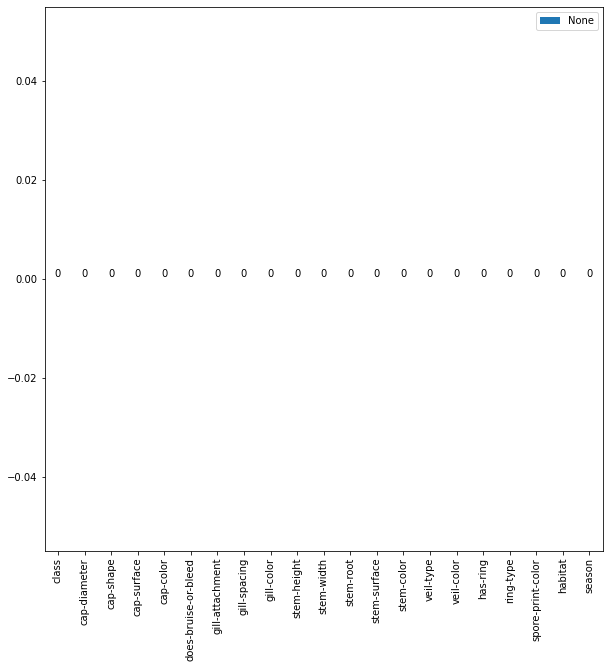

In [26]:
get_missing_values(wimp_df)

In [27]:
wimp_df

class  cap-diameter cap-shape cap-surface cap-color  \
145083     e          1.72         x           s         y   
145084     e          9.59         f           e         b   
145085     p          0.86         x           g         p   
145086     p          4.32         x           d         e   
145087     e          2.80         x           s         w   
...      ...           ...       ...         ...       ...   
206147     p         13.81         x           k         n   
206148     p          2.69         x           d         w   
206149     e         11.70         f           s         g   
206150     p          2.83         s           w         u   
206151     p          1.57         x           i         l   

       does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
145083                    f               d            c          w   
145084                    f               d            c          b   
145085                    f               a            c          p   
145086                    f               x            c          w   
145087                    f               d            d          w   
...                     ...             ...          ...        ...   
206147                    t               p            c          y   
206148                    f               d            d          p   
206149                    f               s            c          u   
206150                    f               a            c          u   
206151                    f               a            c          p   

        stem-height  ...  stem-root stem-surface stem-color veil-type  \
145083         7.01  ...          c            t          y         f   
145084         4.73  ...          b            s          w         u   
145085         4.25  ...          c            s          k         p   
145086         4.91  ...          u            y          w         p   
145087         3.13  ...          u            d          w         f   
...             ...  ...        ...          ...        ...       ...   
206147        10.06  ...          c            d          y         p   
206148         3.76  ...          c            h          w         p   
206149         7.36  ...          b            g          b         p   
206150         5.76  ...          b            s          u         u   
206151         3.26  ...          c            i          w         f   

       veil-color has-ring ring-type spore-print-color habitat season  
145083          f        f         f                 w       h      u  
145084          u        t         f                 u       d      a  
145085          o        f         f                 u       d      s  
145086          k        f         f                 n       d      u  
145087          f        f         f                 w       m      a  
...           ...      ...       ...               ...     ...    ...  
206147          y        f         f                 p       d      a  
206148          o        f         f                 p       g      a  
206149          r        f         f                 p       l      a  
206150          n        f         f                 w       d      a  
206151          f        f         f                 p       g      u  

[61069 rows x 21 columns]

> Also, let's take a look at how correlation and feature distributions of the missing value features have been affected

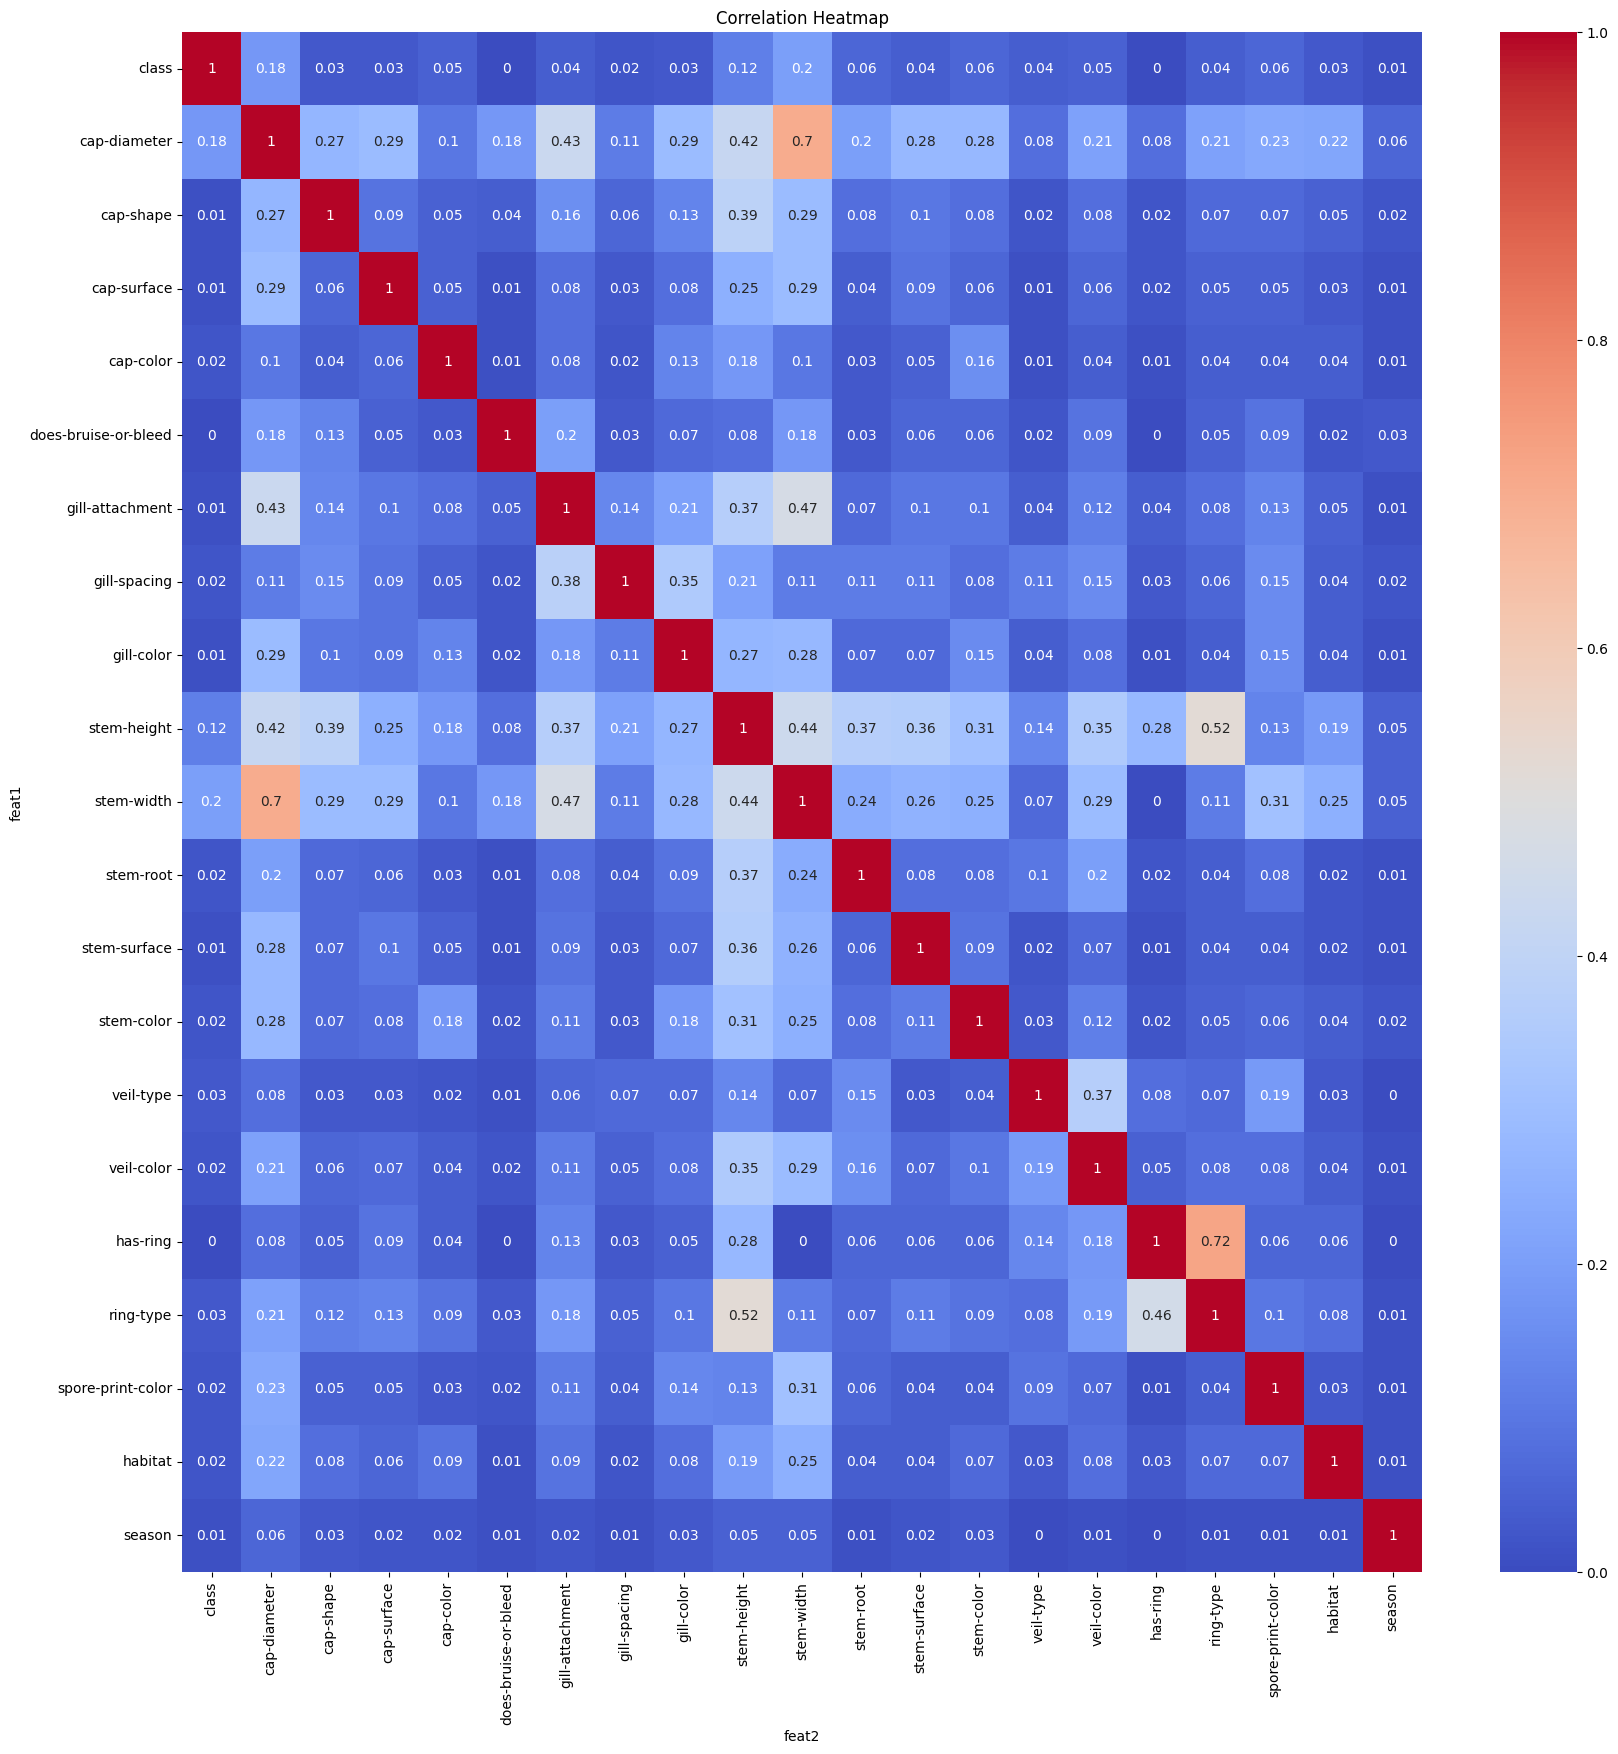

In [23]:
wimp_corr = get_corr_heatmap(wimp_df)

For cap-surface, the value distribution remains similar, although some values have swapped position in frequency

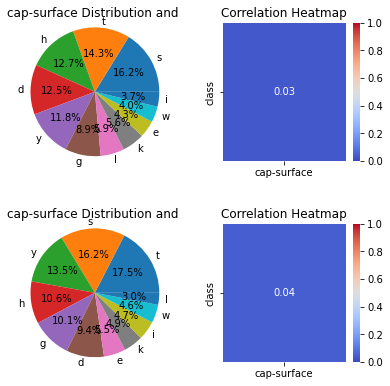

In [29]:
comparative_feature_analysis([[wimp_df, 'cap-surface', wimp_corr],[wag_df, 'cap-surface', wag_corr]])

Gill-attachment remains generally unchanged

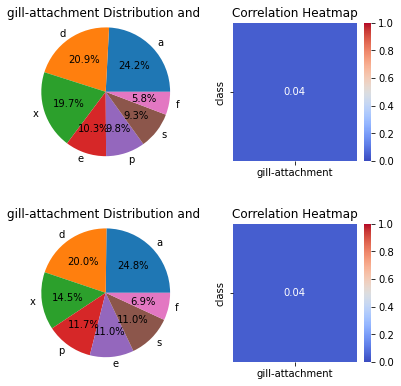

In [30]:
comparative_feature_analysis([[wimp_df, 'gill-attachment', wimp_corr],[wag_df, 'gill-attachment', wag_corr]])

gill-spacing sees an increase in c (close) spacing and a bit better correlation.

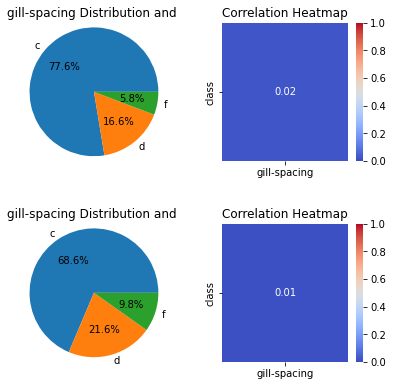

In [31]:
comparative_feature_analysis([[wimp_df, 'gill-spacing', wimp_corr],[wag_df, 'gill-spacing', wag_corr]])

stem-root sees a shift in the most common values and a change in correlation

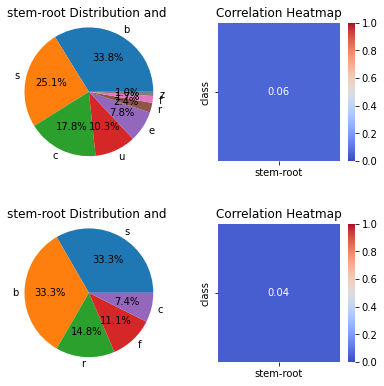

In [32]:
comparative_feature_analysis([[wimp_df, 'stem-root', wimp_corr],[wag_df, 'stem-root', wag_corr]])

stem-surface sees a more equally divided distribution, which also sees a decrease in correlation

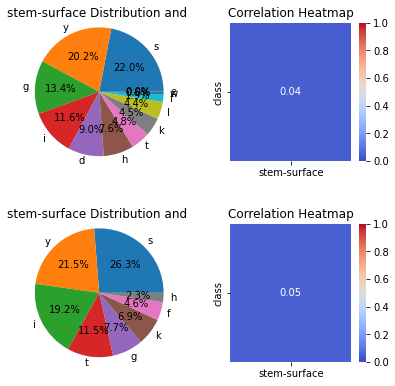

In [33]:
comparative_feature_analysis([[wimp_df, 'stem-surface', wimp_corr],[wag_df, 'stem-surface', wag_corr]])

veil-type now does show multiple values, which also increases its correlation to above 0

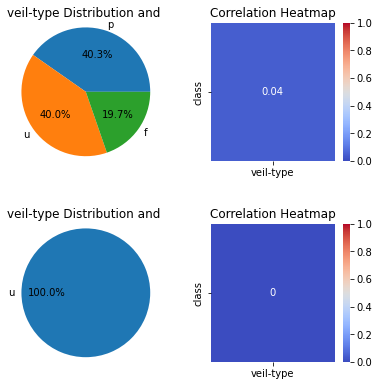

In [34]:
comparative_feature_analysis([[wimp_df, 'veil-type', wimp_corr],[wag_df, 'veil-type', wag_corr]])

Veil-color is much less imbalanced as well

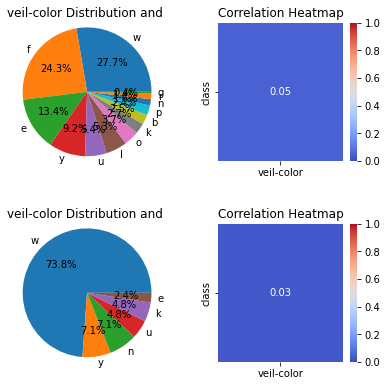

In [35]:
comparative_feature_analysis([[wimp_df, 'veil-color', wimp_corr],[wag_df, 'veil-color', wag_corr]])

ring-type remains generally the same

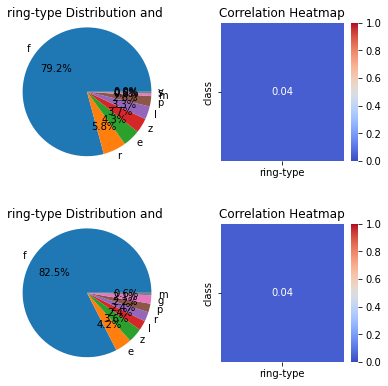

In [36]:
comparative_feature_analysis([[wimp_df, 'ring-type', wimp_corr],[wag_df, 'ring-type', wag_corr]])

spore-print-color sees a more balanced distribution and increase in correlation

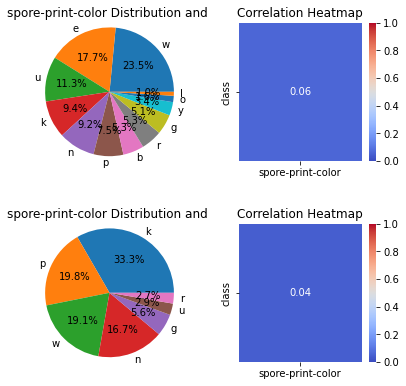

In [37]:
comparative_feature_analysis([[wimp_df, 'spore-print-color', wimp_corr],[wag_df, 'spore-print-color', wag_corr]])

* Dropping the highest missing values
> The other option is to just remove the features with missing values. Here we follow the methodology of Wagner et al. and drop the features that have over half the missing values and impute the reamaining missing values with a SimpleImputer on the most frequent option. Whilst this still involves some imputing, it follows the exact method used by Wagner et al and thus should create the same dataset used by their model. This also means that the dropped columns will be dropped from the multi dataset as well.

> To do this we note the features that have more than half missing values to be dropped, and the others to be imputed. The dropped features are dropped from both the multi_df and the wag_df. Then the wag_df has its NaNs replaced with the most common value in the column. After that, the dataframes are returned

In [24]:
def drop_features(m_df, w_df):
    drop_feat = ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'] #Features with over half missing features in Wagner DF are to be dropped
    imp_feat = ['cap-surface', 'gill-attachment', 'gill-spacing', 'has-ring']                 #Other Features with missing values will be imputed
    #Drop the features from both dataframes
    m_df = m_df.drop(drop_feat, axis=1)
    w_df = w_df.drop(drop_feat, axis=1)  
    for feat in imp_feat:                                                                    #Each feature with less than half missing values get their NaNs replaced with most common value
        imputer = SimpleImputer(strategy='most_frequent')
        w_df[feat] = imputer.fit_transform(w_df[feat].values.reshape(-1, 1))              
    return m_df, w_df

In [25]:
mdrop_df, wdrop_df = drop_features(multi_df, wag_df)

Now that we have our final datasets that we will be training and testing with, let's ensure there are no identical columns

In [146]:
# Merge the DataFrames based on common columns
merged_imp_df = pd.merge(mimp_df, wimp_df, how='inner')

# Check if there are any rows in the merged DataFrame
if not merged_imp_df.empty:
    print("Identical rows have been found.")
    merged_imp_df
else:
    print("No identical rows have been found.")

No identical rows have been found.


In [148]:
# Merge the DataFrames based on common columns
merged_rop_df = pd.merge(mdrop_df, wdrop_df, how='inner')

# Check if there are any rows in the merged DataFrame
if not merged_rop_df.empty:
    print("Identical rows have been found.")
    merged_rop_df
else:
    print("No identical rows have been found.")

No identical rows have been found.


### Train Test Split

Now we have two sets dataframes that can be used to train and test models. To do this we need to split up our dataset into a train and test set. Given that in most of the related research a 80/20 split is used, we will use that in this research as well. Furthermore, for generalization testing, we will also be using the Wagner dataset as a test dataset.

since we will be using the UCI dataset as sanity check of the Kumar et al. and Alkronz et al. models, and use the Wagner drop model for the Wagner et al. model sanity check, we will separate their features from the label. This will also be done with the multi datasets.

In [123]:
uci_label = uci_df['class']
uci_df = uci_df.drop('class', axis=1)

mimp_label = multi_df['class']
mimp_df = multi_df.drop('class', axis=1)
wimp_y = wimp_df['class']
wimp_x = wimp_df.drop('class', axis = 1)

mrop_label = mdrop_df['class']
mrop_df = mdrop_df.drop('class', axis = 1)
wrop_y = wdrop_df['class']
wrop_x = wdrop_df.drop('class', axis = 1)

Now we have 5 datasets with separated features and labels. Below we create a simple function that returns the train test split using sklearn with the same test size and random state.

In [124]:
def train_test(x_df, y_labels):
    x_train, x_test, y_train, y_test = train_test_split(x_df, y_labels, test_size=0.2, random_state=1)
    return x_train, x_test, y_train, y_test

The only things left to do are model specific preprocessing and encoding. These will be performed for each model individually.

# **Literature Models**

The purpose of the Literature models is to see how well models in previous research performs on the Multivariate dataset. This consists of a Neurual Network proposed by Alkronz et al. for the UCI dataset and a Random Forests Model proposed by Wagner et al. for the Wagner dataset.

Both models will be replicating the preprocessing and method parameter steps of the publications as faithful as possible given constraints of different software implementation. Also, the models will be tested on their respective datasets that they were originally used on to find how close they perform to their reported accuracy.

After that, they will be trained on the Multivariate 80% training data and then tested on the 20% test data and tested on the full Wagner dataset. The evaluation and detailed reporting of these results will be done later.

## **Logistic Regression (Kumar et al.)**

In *A Benchmark to Select Data Mining based Classification Algorithms for Business Intelligence and Decision Support Systems* Kumar et al compare the performance of different classification algorithms on 4 different datasets, of which the UCI mushroom dataset is one. One of the models tested is a Logistic Regression model, which link the feature values to the probabilties of the label value, thus making it a linear model. Whilst this model implementation is not explored thoroughly in this research, the Logistic Regression is often used as a benchmark in Machine Learning research and with a 99.9% reported accuracy on the UCI model, this model should determine the linearity of our datasets and provide a good baseline.

### Preprocessing

As Kumar et al do not specify any preprocessing steps in their research, it is assumed that they use the basic UCI dataset. As such we will also use the basic datasets with a one-hot encoding for the nominal variables

In [125]:
oh_uci_df = pd.get_dummies(uci_df)

oh_imp_df = pd.get_dummies((pd.concat([mimp_df, wimp_x], ignore_index=True)))  #Concat the dataframes to ensure same OH encoding
oh_mimp_df = oh_imp_df.iloc[:len(mimp_df)] 
oh_wimp_x = oh_imp_df.iloc[len(mimp_df):] 

oh_rop_df = pd.get_dummies((pd.concat([mrop_df, wrop_x], ignore_index=True))) #Concat the dataframes to ensure same OH encoding
oh_mrop_df = oh_rop_df.iloc[:len(mrop_df)] 
oh_wrop_x = oh_rop_df.iloc[len(mrop_df):] 

Next we apply the Train/Test split

In [126]:
x_kuci_train, x_kuci_test, y_kuci_train, y_kuci_test =  train_test(oh_uci_df, uci_label)
x_kimp_train, x_kimp_test, y_kimp_train, y_kimp_test =  train_test(oh_mimp_df, mimp_label)
x_krop_train, x_krop_test, y_krop_train, y_krop_test =  train_test(oh_mrop_df, mrop_label)

### Sanity Check

Now we want to see how this implemented model performs compared to the reported accuracy. 
Kumar et al. reported a 99.9% accuracy for the Logistic Regression model, let's see how this model performs

In [127]:
kumar = LogisticRegression()
kumar.fit(x_kuci_train, y_kuci_train)

y_kuci_pred = kumar.predict(x_kuci_test)

kuci_accuracy = accuracy_score(y_kuci_test, y_kuci_pred)
print("Accuracy:", kuci_accuracy)

Accuracy: 0.9981538461538462


With 99.8% accuracy we're less than 0.1% off the mark, which indicates that we may not have the exact implementation as Kumar et al, but it works very close to the reported performance. 

### Model Testing

For testing the models, we will be conducting 2 tests on 2 differently treated datasets. We have the imputed dataset, where the values of the Wagner dataset are imputed and all the columns remain in the Wagner and Multi dataset, and we have the dropped dataset, where the columns with more than half the missing values in the Wagner dataset have been removed from the Wagner and Multi dataset.

For each pair of datasets, we will train the model on 80% of the Multi dataset data and then test them on the 20% test data of the Multi dataset, and separately on the full Wagner dataset. This is to see the model performance within dataset and across dataset. 

It should be noted that the Wagner dataset is only Binary, thus we need to create a conversion function that changes the 'c' caution values to 'e' edible, and the 'r' not recommended and 'u' unknown values to 'p' poisonous, as is done by the UCI and Wagner datasets.

In [128]:
def convert_accuracy(y, y_pred):
    pred_val = np.copy(y_pred)
    pred_val[pred_val == 'c'] = 'e'
    pred_val[pred_val == 'u'] = 'p'
    pred_val[pred_val == 'r'] = 'p'
    return accuracy_score(y, pred_val)

Next we want to run the model on both the impute and drop dataset. Starting with the Imputed Dataset

In [129]:
kumar_imp = LogisticRegression()
kumar_imp.fit(x_kimp_train, y_kimp_train)

y_kimp_pred = kumar_imp.predict(x_kimp_test)
y_gen_kimp_pred = kumar_imp.predict(oh_wimp_x)

kimp_accuracy = accuracy_score(y_kimp_test, y_kimp_pred)
kimp_gen_accuracy = convert_accuracy(wimp_y, y_gen_kimp_pred)

print("Test Accuracy:", kimp_accuracy)
print("Generalization Accuracy:", kimp_gen_accuracy)

Test Accuracy: 0.6382465451287177
Generalization Accuracy: 0.5737444529957917


C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


When running the model we first of all find that the model training fails to converge on the default max iterations of 100. When increasing the max iterations to 100.000 convergence does occur, but this comes a the cost of generalization accuracy, thus indicating overfitting. As such, it is likelier that this is due to the model not being linearly separable due to its increased complexity, as compared to the UCI model

This is reflected in the accuracy scores, where for the Imputed dataset we have a test score of 63.8% accuracy and a generalized test score of 57.4% accuracy. Proper evaluation will be done later.

In [130]:
kumar_rop = LogisticRegression()
kumar_rop.fit(x_krop_train, y_krop_train)

y_krop_pred = kumar_rop.predict(x_krop_test)
y_gen_krop_pred = kumar_rop.predict(oh_wrop_x)

krop_accuracy = accuracy_score(y_krop_test, y_krop_pred)
krop_gen_accuracy = convert_accuracy(wrop_y, y_gen_krop_pred)

print("Test Accuracy:", krop_accuracy)
print("Generalization Accuracy:", krop_gen_accuracy)


Test Accuracy: 0.5871385739394148
Generalization Accuracy: 0.5276981774713848


C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Similar results are seen for the Dropped dataset, where we have a 58.7% accuracy for the test set and a 52.8% accuracy for the generalized test set. Again, this is a bad result for the Generalization, as it indicated that this algorithm is not much better than chance.

## **Neural Network (Alkronz et al.)**

In *Prediction of Whether Mushroom is Edible or Poisonous Using Back-propagation Neural Network.* Alkronz et al propose a Neural Network that reportedly achieves a 99.25% accuracy on the UCI dataset.

### Preprocessing

Whilst the authors focus on the biological representation of a neural network and the mathematical underpinnings, they do not provide much clarity in which exact optimzation model they use, nor do they seem to do any feature preprocessing. As such, the only thing that needs to be done is to one-hot encode the datasets, which has already been done for the Kumar et al. model, and label encode the class labels, which will be done in the Neural Net function.

### Sanity Check

Alkronz et al. use an obscure Neural Network modeling software called JustNN, which appears to have last been updated in 2016 with very little available documentation. Referencing other papers using this software, it appears that this software creates Neural Networks using sigmoid activation functions for the hidden layers by default. Looking at the provided figures, the model uses 3 hidden layers consisting of 2,1,3 nodes, and it takes all features unprocessed as input and returns a single classification as output. 

Since we will be using this model for various different dataset sizes and different class label numbers, let's set up a Flexible Neural Net

In [131]:
# Define the Neural Network model
class NNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NNClassifier, self).__init__()
        self.hidden_size = hidden_size                                                   #Allow for flexible hidden size and number of layers
        self.num_layers = len(hidden_size)
        self.activation = nn.Sigmoid()                                                   #Set Sigmoid activation as default activation
        self.output_activation = nn.Sigmoid() if num_classes == 1 else nn.Softmax(dim=1) #Use Sigmoid output if Binary, Softmax if Multi
        self.input_layer = nn.Linear(input_size, hidden_size[0])                         #Set Input layer size to size of input features
       
        self.hidden_layers = nn.ModuleList()                                             #Set up hidden layers along the hidden size list
        for i in range(1, self.num_layers):
            layer = nn.Linear(hidden_size[i-1], hidden_size[i])
            self.hidden_layers.append(layer)
            
        self.output_layer = nn.Linear(hidden_size[-1], num_classes)                      #Setup output layer based on number of classes

    def forward(self, x):                                                                #Forward pass
        x = self.activation(self.input_layer(x))                                         
        for hidden_layer in self.hidden_layers:
            x = self.activation(hidden_layer(x))
        x = self.output_activation(self.output_layer(x))
        return x

The number of epochs run is listed as 161501, however loss function and learning rate are unknown. As such a learning rate of 0.001 is assumed, since it is used as a general standard and Cross Entropy Loss is used due to its common usage for Binary and MultiClass Classification tasks.

For a Neural Net, the class labels need to be encoded. For this we use the sklearn LabelEncoder, which will rank-encode the label values for the training and testing, and can also decode them later on. Since the train and test data need to be converted to a tensor, we also perform the train/test split in this function.

The goal of this function is simply to train the NN and then return the model for evaluation, the label_encoder for decoding and the tests sets for evaluation.

In [132]:
def train_neural_net(features, target):

    label_encoder = LabelEncoder()                              # Encode the target variable locally such that we can decode it later                   
    label = label_encoder.fit_transform(target)

    x_train, x_test, y_train, y_test = train_test(features, label)# Perform Train Test Split
    x_train = torch.tensor(x_train.values, dtype=torch.float32) # Convert the data to Pytorch tensors
    x_test = torch.tensor(x_test.values, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)
    
    input_size = x_train.shape[1]                                #Determine input size and class number to allow different datasets
    num_classes = len(label_encoder.classes_)   
    model = NNClassifier(input_size, [2, 1, 3], num_classes) #Use the 2,1,3 Node structure of Alkronz et al.
    criterion = nn.CrossEntropyLoss()                             
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 161501                                          #Set 161501 epochs as specified by Alkronz et al
    for epoch in range(num_epochs):
        model.train()
        outputs = model(x_train)                                 #Forward Pass
        loss = criterion(outputs, y_train.unsqueeze(1) if num_classes == 1 else y_train.long())
        optimizer.zero_grad()                                    #Backward Pass
        loss.backward()
        optimizer.step()
        if (epoch % 25000) == 0:                                   #Print Training Loss every 25000 epochs
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
            
    return model, label_encoder, x_test, y_test                   #Return the model, label encoder, x and y test for testing

Next up, we make the evaluation function, which takes in the model, encoder and test sets.
This function sets the model to evaluation and makes predictions based on the trained model.
The predicted label and y_test are decoded using the inverse transform of the encoder for the accuracy score and further evaluation.

Since the Wagner dataset is used in its entirety for testing the Multi dataset, an encoded parameter is added. 
When this parameter is set to false, the x and y inputs are assumed not to be encoded, which means that the x still needs to converted to a tensor and the y only needs to be changed to a numpy array without label decoding.

At last the y_pred and y_test are returned for evaluation purposes.

In [133]:
def test_neural_net(model, label_encoder, x_test, y_test, encoded=True):
    if not encoded:
        x_test = torch.tensor(x_test.values, dtype=torch.float32)        #Convert x_test to tensor for not encoded dataset
    model.eval()                                                         #Set Model to Evaluation mode
    with torch.no_grad():                                                
        test_outputs = model(x_test)
        if len(label_encoder.classes_) == 1:                                            
            predicted_labels = (test_outputs >= 0.5).squeeze().long()
        else:
            _, predicted_labels = torch.max(test_outputs, 1)
    predicted_labels = label_encoder.inverse_transform(predicted_labels)
    if encoded:
        y_test = tf.cast(y_test, dtype=tf.int32)                         #Since an encoded y_test has float values, convert them to int
        y_test = label_encoder.inverse_transform(y_test)                 #Then decode them
        accuracy = accuracy_score(y_test, predicted_labels)              #Get accuracy score
    else:
        y_test = y_test.to_numpy()                                       #Since this is only used when testing Wag on Multi trained net, we also need to consider accuracy scoring.
        accuracy = convert_accuracy(y_test, predicted_labels)            #Use convert accuracy score to convert multi output to binary
    print(f"Test Accuracy: {accuracy:.4f}")
    return predicted_labels, y_test, accuracy

Now that we've set up our model, let's test it on the UCI dataset and see how close we get to the reported 99.25% accuracy.

In [60]:
aluci_model, aluci_encoder, aluci_x_test, aluci_y_yest = train_neural_net(oh_uci_df, uci_label)

Epoch [1/161501], Loss: 0.6922
Epoch [25001/161501], Loss: 0.3133
Epoch [50001/161501], Loss: 0.3133
Epoch [75001/161501], Loss: 0.3133
Epoch [100001/161501], Loss: 0.3133
Epoch [125001/161501], Loss: 0.3133
Epoch [150001/161501], Loss: 0.3133


In [61]:
aluci_pred, aluci_test = test_neural_net(aluci_model, aluci_encoder, aluci_x_test, aluci_y_yest)

['e' 'p' 'p' ... 'p' 'e' 'e']
Test Accuracy: 1.0000


As can be seen, we get a perfect test accuracy. This is likely due to overfitting caused by running the neural net for over 160.000 epochs. 

### Model Testing

Now it is time to train the imputed model.

In [134]:
alimp_model, alimp_encoder, alimp_x_test, alimp_y_yest = train_neural_net(oh_mimp_df, mimp_label)

Epoch [1/161501], Loss: 1.6409
Epoch [25001/161501], Loss: 1.2560
Epoch [50001/161501], Loss: 1.2543
Epoch [75001/161501], Loss: 1.2540
Epoch [100001/161501], Loss: 1.2539
Epoch [125001/161501], Loss: 1.2538
Epoch [150001/161501], Loss: 1.2537


In [135]:
alimp_pred, alimp_test, alimp_acc = test_neural_net(alimp_model, alimp_encoder, alimp_x_test, alimp_y_yest)

Test Accuracy: 0.6429


In [136]:
alimp_gen_pred, alimp_gen_test, alimp_gen_acc = test_neural_net(alimp_model, alimp_encoder, oh_wimp_x, wimp_y, encoded=False)

Test Accuracy: 0.5713


Looking at the first accuracy scores, we do find that the Neural net struggles more with the Multivariate dataset, with only an accuracy score of 66.1%. It performs even worse with the Generalization to the Wagner dataset, where we see a 52.3% accuracy, which is not better than chance. 

And now for the dropped model

In [137]:
alrop_model, alrop_encoder, alrop_x_test, alrop_y_yest = train_neural_net(oh_mrop_df, mrop_label)

Epoch [1/161501], Loss: 1.6226
Epoch [25001/161501], Loss: 1.2995
Epoch [50001/161501], Loss: 1.2992
Epoch [75001/161501], Loss: 1.2992
Epoch [100001/161501], Loss: 1.2992
Epoch [125001/161501], Loss: 1.2991
Epoch [150001/161501], Loss: 1.2991


In [138]:
alrop_pred, alrop_test, alrop_acc = test_neural_net(alrop_model, alrop_encoder, alrop_x_test, alrop_y_yest)

Test Accuracy: 0.5952


In [139]:
alrop_gen_pred, alrop_gen_test, alrop_gen_acc = test_neural_net(alrop_model, alrop_encoder, oh_wrop_x, wrop_y, encoded=False)

Test Accuracy: 0.5637


## **Random Forests (Wagner et al.)**

In *Mushroom data creation, curation, and simulation to support classifcation tasks* Wagner et al. introduce a non-parametric Random Forests model that achieve an accuracy of 100% with 5-fold cross validation. 

### Preprocessing

The used dataset consists of the drop dataset with one-hot encoding for the variable features. Since we already have this dataset prepared, no further preprocessing is needed other than the train/test split.

In [140]:
wag_x_train, wag_x_test, wag_y_train, wag_y_test = train_test(oh_wrop_x, wrop_y)
x_rfimp_train, x_rfimp_test, y_rfimp_train, y_rfimp_test = train_test(oh_mimp_df, mimp_label)
x_rfrop_train, x_rfrop_test, y_rfrop_train, y_rfrop_test = train_test(oh_mrop_df, mrop_label)

### Sanity Check

We split the Train and Test phase up again such that we can test the Multi model later on the Wagner dataset. It is key to note here that we pass no parameters, as stated by the Wagner et al. paper. The only parameter passed is a random_state=1 to ensure consistent results.

Whilst Wagner et al. used a 5-fold-cross validation, here we just use a train/test split as we just want to get an idea of how the model performs

In [141]:
def RFClassifierTrain(x_train, y_train):
    model = RandomForestClassifier(random_state=1) 
    model.fit(x_train, y_train)
    return model

def RFClassifierTest(model, x_test, y_test, convert=False):
    y_labels = model.predict(x_test)
    if convert:
        accuracy = convert_accuracy(y_test, y_labels)
    else:
        accuracy = accuracy_score(y_test, y_labels)
    print(f"Test Accuracy: {accuracy:.4f}")
    return y_labels, y_test, accuracy

In [89]:
wag_rf = RFClassifierTrain(wag_x_train,wag_y_train) 

In [90]:
wag_rf_pred, wag_rf_test, waf_rf_acc = RFClassifierTest(wag_rf, wag_x_test, wag_y_test)

Test Accuracy: 0.9999


### Model Testing

Imputation model

In [142]:
imp_rf = RFClassifierTrain(x_rfimp_train,y_rfimp_train)
imp_rf_pred, imp_rf_test, imp_rf_acc = RFClassifierTest(imp_rf, x_rfimp_test,y_rfimp_test)

Test Accuracy: 0.9996


In [143]:
imp_rf_gen_pred, imp_rf_gen_test, imp_rf_gen_acc = RFClassifierTest(imp_rf, oh_wimp_x, wimp_y, convert=True)

Test Accuracy: 0.6031


Dropped model

In [144]:
rop_rf = RFClassifierTrain(x_rfrop_train,y_rfrop_train)
rop_rf_pred, rop_rf_test, rop_rf_acc = RFClassifierTest(rop_rf, x_rfrop_test,y_rfrop_test)

Test Accuracy: 0.9961


In [145]:
rop_rf_gen_pred, rop_rf_gen_test, rop_rf_gen_acc = RFClassifierTest(rop_rf, oh_wrop_x, wrop_y, convert=True)

Test Accuracy: 0.5970


# **Research Model**

## **TabNet**

In *TabNet: Attentive Interpretable Tabular Learning* Arik and Pfister propose a new deep learning model for working with tabular data called TabNet. Showing improved results over traditional models for datasets in tabular form, this model may be worth testing on our dataset, given that it is also of the tabular kind

### Preprocessing

Whilst TabNet is also known to be able to accept Dataframes without preprocessing. For this research it has been decided to stick with the methods used in the documentation [examples](https://github.com/dreamquark-ai/tabnet/blob/develop/census_example.ipynb). For this, we need to do a couple of things
* First, the categoric features need to be label encoded 
* Next the categoric feature indexes need to be listed and their dimensions (amount of possible values) noted in a dictionary, as these will be used to create embeddings in TabNet
* A Train/Validation/Test set needs to be created, as TabNet needs validation data for fitting the model

So let's start off with listing the categorical columns for the imputed and dropped datasets

In [30]:
cat_imp_cols = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

In [31]:
cat_rop_cols = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',  'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']

Next, we need to list the indexes and dimensions of the categorical columns. This can be done with the function below

In [32]:
def get_cat_idx_dims(df, cat_cols):
    tab_df = df.copy()
    cat_dims = {}
    for col in tab_df.columns:
        if col in cat_cols:
            l_enc = LabelEncoder()
            tab_df[col] = l_enc.fit_transform(tab_df[col].values)
            cat_dims[col] = len(l_enc.classes_)
    cat_idx = [i for i,f in enumerate(tab_df.columns) if f in cat_cols]
    cat_dims = [cat_dims[f] for i, f in enumerate(tab_df.columns) if f in cat_cols]
    return tab_df, cat_idx, cat_dims

Now that we have this function we can create our Multi and Wagner encoded datasets. They need to be fused together to have the proper dimensionality in the embeddings

In [33]:
tab_imp_df, imp_idx, imp_dims = get_cat_idx_dims(pd.concat([mimp_df, wimp_x], ignore_index=True), cat_imp_cols)
tab_mimp_df = tab_imp_df.iloc[:len(mimp_df)]
tab_wimp_x = tab_imp_df.iloc[len(mimp_df):] 
tab_rop_df, rop_idx, rop_dims = get_cat_idx_dims(pd.concat([mrop_df, wrop_x], ignore_index=True), cat_rop_cols)   
tab_mrop_df = tab_rop_df.iloc[:len(mrop_df)] 
tab_wrop_x = tab_rop_df.iloc[len(mrop_df):] 

Now, let's create our Train-Val-Test sets

In [34]:
train_imp_x, test_imp_x, train_imp_y, test_imp_y = train_test(tab_mimp_df, mimp_label)
train_imp_x, valid_imp_x, train_imp_y, valid_imp_y = train_test(train_imp_x, train_imp_y)

In [35]:
train_imp_x = train_imp_x.values
valid_imp_x = valid_imp_x.values
train_imp_y = train_imp_y
valid_imp_y = valid_imp_y

In [36]:
train_rop_x, test_rop_x, train_rop_y, test_rop_y = train_test(tab_mrop_df, mrop_label)
train_rop_x, valid_rop_x, train_rop_y, valid_rop_y = train_test(train_rop_x, train_rop_y)

In [37]:
train_rop_x = train_rop_x.values
valid_rop_x = valid_rop_x.values
train_rop_y = train_rop_y
valid_rop_y = valid_rop_y

### Hyperparameter optimization

Before we can test the models, we need to find the right hyperparameters for the model. In the TabNet paper and documentation the following hyperparameters suggestion are given
* N_steps = [3,10]
* N_d = N_a = [8,64]
* Gamma = [1.0,2.0]
* Batch_size = 64 recommended for research purposes

To find out which parameters work best, we will test the following combinations on validation accuracy by running each model for 10 epochs. Due to limitations on computing power, finer testing was not available

In [ ]:
tab_test_df = pd.DataFrame(columns=['n_steps', 'n_d', 'n_a', 'gamma', 'best_valid_acc'])
for i in range(3,11):
    for j in range(8,65,16):
        for k in range(10,21,2):
            tab_test = TabNetClassifier(n_d=j,
                                        n_a=j,
                                        n_steps=i,
                                        gamma=(k/10),
                                        cat_idxs=imp_idx, 
                                        cat_dims=imp_dims)
            tab_test.fit(
                X_train=train_imp_x,
                y_train=train_imp_y,
                eval_set=[(train_imp_x, train_imp_y), (valid_imp_x, valid_imp_y)],
                eval_name=['train', 'valid'],
                max_epochs=10,
                patience=20)
            tab_test_df = tab_test_df.append({
                    'n_steps': i,
                    'n_d': j,
                    'n_a': j,
                    'gamma': k/10,
                    'best_valid_acc': max(tab_test.history['valid_accuracy'])
                },ignore_index=True)
            print('Progress j:' , j , ' of 64 and k:', k, ' of 21')            

To save up some notebook space, the output has been reset on the above code, and the hyperparameter test results have been saved below.

In [59]:
tab_test_df.to_csv('/Users/Michel/Desktop/BPAI/tabnet_hyperparameters.csv', sep=';', index=False)  #Save DF to CSV file

Once we call the test results up and sort them by highest validation accuracy, we find that 3 steps, n_d and n_a of 40 and a gamma of 1.0 are the parameters that have returned the best results

In [60]:
tab_test_df = pd.read_csv('/Users/Michel/Desktop/BPAI/tabnet_hyperparameters.csv',sep=';')  #Load Multi-DF

In [62]:
sorted_df = tab_test_df.sort_values(by='best_valid_acc', ascending=False)

In [64]:
sorted_df.head()

n_steps   n_d   n_a  gamma  best_valid_acc
12       3.0  40.0  40.0    1.0        0.993926
180     10.0  40.0  40.0    1.0        0.993840
138      8.0  56.0  56.0    1.0        0.993797
19       3.0  56.0  56.0    1.2        0.993237
13       3.0  40.0  40.0    1.2        0.993194

### Model Testing

Now it is time to start training the Imputed model. Here we use the found hyperparameters and categorical indexes and dimensions.

In [65]:
tab_imp = TabNetClassifier(n_d=40,n_a=40,n_steps=3,gamma=1.0,cat_idxs=imp_idx, cat_dims=imp_dims)

C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Furthermore, we set a batch size of 64 for our research purposes

In [66]:
 tab_imp.fit(
    X_train=train_imp_x,
    y_train=train_imp_y,
    eval_set=[(train_imp_x, train_imp_y), (valid_imp_x, valid_imp_y)],
    eval_name=['train', 'valid'],
    max_epochs=100,
    patience=20,
    batch_size=64)

epoch 0  | loss: 0.898   | train_accuracy: 0.80234 | valid_accuracy: 0.80387 |  0:00:48s
epoch 1  | loss: 0.47889 | train_accuracy: 0.90082 | valid_accuracy: 0.89842 |  0:01:35s
epoch 2  | loss: 0.28306 | train_accuracy: 0.94667 | valid_accuracy: 0.94637 |  0:02:23s
epoch 3  | loss: 0.19931 | train_accuracy: 0.965   | valid_accuracy: 0.96175 |  0:03:11s
epoch 4  | loss: 0.16226 | train_accuracy: 0.98067 | valid_accuracy: 0.97924 |  0:03:59s
epoch 5  | loss: 0.1342  | train_accuracy: 0.97857 | valid_accuracy: 0.97825 |  0:04:47s
epoch 6  | loss: 0.12252 | train_accuracy: 0.98158 | valid_accuracy: 0.98066 |  0:05:35s
epoch 7  | loss: 0.10633 | train_accuracy: 0.98191 | valid_accuracy: 0.9801  |  0:06:23s
epoch 8  | loss: 0.10918 | train_accuracy: 0.97444 | valid_accuracy: 0.97351 |  0:07:11s
epoch 9  | loss: 0.09393 | train_accuracy: 0.98627 | valid_accuracy: 0.98354 |  0:07:59s
epoch 10 | loss: 0.0813  | train_accuracy: 0.98733 | valid_accuracy: 0.98626 |  0:08:47s
epoch 11 | loss: 0.08

C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Now that we have trained the model, we can use it to predict our classes.

In [69]:
imp_tab = tab_imp.predict(test_imp_x.values)
imp_gen_tab = tab_imp.predict(tab_wimp_x.values)

In [150]:
imp_acc = accuracy_score(test_imp_y, imp_tab)
imp_gen_acc = convert_accuracy(wimp_y, imp_gen_tab)

In [151]:
print(f"Test Accuracy: {imp_acc:.4f}")
print(f"Generalization Accuracy: {imp_gen_acc:.4f}")

Test Accuracy: 0.9979
Generalization Accuracy: 0.5603


It seems like the model has achieved a very high accuracy score again, however it does not translate very well to the Wagner dataset.

Next we have the Dropped model for which we perform the same model fitting

In [67]:
tab_rop = TabNetClassifier(n_d=40,n_a=40,n_steps=3,gamma=1.0,cat_idxs=rop_idx, cat_dims=rop_dims)

C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [68]:
tab_rop.fit(
    X_train=train_rop_x,
    y_train=train_rop_y,
    eval_set=[(train_rop_x, train_rop_y), (valid_rop_x, valid_rop_y)],
    eval_name=['train', 'valid'],
    max_epochs=100,
    patience=20)

epoch 0  | loss: 1.04736 | train_accuracy: 0.56368 | valid_accuracy: 0.56423 |  0:00:05s
epoch 1  | loss: 0.64437 | train_accuracy: 0.7647  | valid_accuracy: 0.76114 |  0:00:11s
epoch 2  | loss: 0.46336 | train_accuracy: 0.8659  | valid_accuracy: 0.86224 |  0:00:17s
epoch 3  | loss: 0.34749 | train_accuracy: 0.91667 | valid_accuracy: 0.91471 |  0:00:23s
epoch 4  | loss: 0.26161 | train_accuracy: 0.93543 | valid_accuracy: 0.93388 |  0:00:29s
epoch 5  | loss: 0.21847 | train_accuracy: 0.94716 | valid_accuracy: 0.94452 |  0:00:34s
epoch 6  | loss: 0.19021 | train_accuracy: 0.95903 | valid_accuracy: 0.95365 |  0:00:40s
epoch 7  | loss: 0.16085 | train_accuracy: 0.96687 | valid_accuracy: 0.96437 |  0:00:45s
epoch 8  | loss: 0.14673 | train_accuracy: 0.96128 | valid_accuracy: 0.95636 |  0:00:51s
epoch 9  | loss: 0.13406 | train_accuracy: 0.97565 | valid_accuracy: 0.97161 |  0:00:56s
epoch 10 | loss: 0.11665 | train_accuracy: 0.97568 | valid_accuracy: 0.97226 |  0:01:02s
epoch 11 | loss: 0.11

C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [75]:
rop_tab = tab_rop.predict(test_rop_x.values)
rop_gen_tab = tab_rop.predict(tab_wrop_x.values)

In [152]:
rop_acc = accuracy_score(test_rop_y, rop_tab)
rop_gen_acc = convert_accuracy(wrop_y, rop_gen_tab)

In [153]:
print(f"Test Accuracy: {rop_acc:.4f}")
print(f"Generalization Accuracy: {rop_gen_acc:.4f}")

Test Accuracy: 0.9918
Generalization Accuracy: 0.5758


For the dropped dataset we once again see similar results

# **Evaluation**

Now that we have run our models, it is time to see how they have performed and why they have performed that way. For this we will look at the following statistics
* Accuracy
> Accuracy is a basic evaluation metric that calculates how many of the instances were classified correctly.
* ROC curve
> The ROC curve is a visual evaluation method of assessing the model's ability to discriminate between classes by looking at the TPR vs FPR
* Classification Report
> Finally we use the classification report to take a look at the Precison and Recall on the Poisonous class and have a more detailed insight

Starting out with the conversion of the y_pred and y_true for the Binary evaluations. *convert_to_binary* takes a y as input and converts the edible and caution classes to 0 and the others to 1. Finally the array has all its values set to integers. 

This manual function has been chosen to retain clear visible control over which labels get what encoding, since we need to do collapsing of the 5 classes to 2 for the evaluation functions

In [166]:
def convert_to_binary(y_label):
    labels = np.copy(y_label)
    labels[labels == 'c'] = 0
    labels[labels == 'e'] = 0
    labels[labels == 'u'] = 1
    labels[labels == 'r'] = 1
    labels[labels == 'p'] = 1
    return labels.astype(int)

## **Accuracy**

Accuracy is one of the most straightforward evaluation metrics for measuring the performance of a classification model. To get a good overview of how our models perform, we want to compare the Internal models (Test set = Multi DF) and External models (Test set = Wagner DF) to each other. For this, we will create a bar plot that shows the performance of each model's imputed and dropped dataset performance.


In [334]:
def plot_accuracy(lr, nn, rf, tn, binary=True):
    if binary:
        for i in range(0, 4):
            lr[i] = convert_to_binary(lr[i])
            nn[i] = convert_to_binary(nn[i])
            rf[i] = convert_to_binary(rf[i])
            tn[i] = convert_to_binary(tn[i])
    elif not binary:
        label_binarizer = LabelBinarizer()
        lr[0] = label_binarizer.fit_transform(lr[0])
        lr[1] = label_binarizer.transform(lr[1])
        lr[2] = label_binarizer.transform(lr[2])
        lr[3] = label_binarizer.transform(lr[3])
        for i in range(0, 4):
            nn[i] = label_binarizer.transform(nn[i])
            rf[i] = label_binarizer.transform(rf[i])
            tn[i] = label_binarizer.transform(tn[i])
    models = [lr, nn, rf, tn]
    labels = ['Logistic Regression', 'Neural Network', 'Random Forests', 'TabNet']
    datasets = ['Imputed Dataset', 'Dropped Dataset']
    score_df = pd.DataFrame(index=labels, columns=datasets)
    for i, (y_true_imp, y_pred_imp, y_true_rop, y_pred_rop) in enumerate(models):
        score_df.loc[labels[i],[datasets[0]]] = accuracy_score(y_true_imp, y_pred_imp)
        score_df.loc[labels[i],[datasets[1]]] = accuracy_score(y_true_rop, y_pred_rop) 
    ax = score_df.plot(kind='bar', figsize=(10, 6), rot=0, ylabel='Accuracy')
    for c in ax.containers:
        ax.bar_label(c, label_type='center', rotation=90)
    ax.legend(loc='lower right')
    ax.set_ylim(0.0, 1.0)
    plt.show()  

### Internal Accuracy Scores

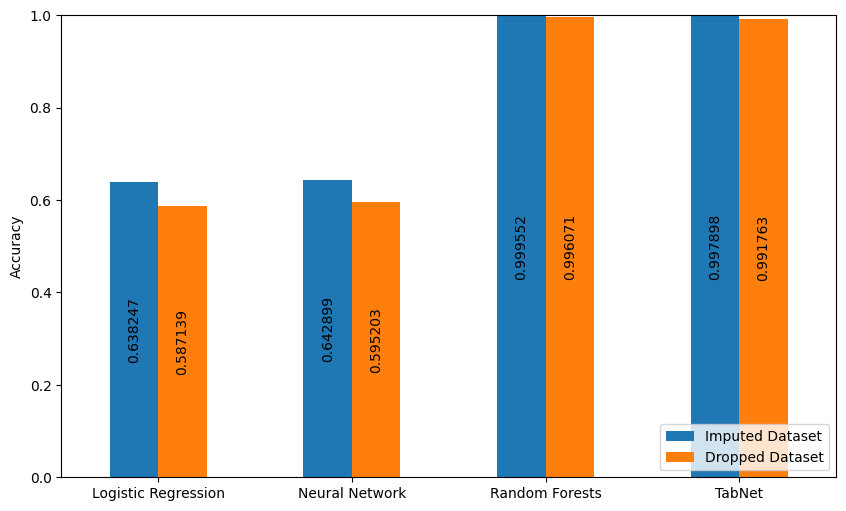

In [335]:
plot_accuracy([y_kimp_test,y_kimp_pred,y_krop_test,y_krop_pred],[alimp_test,alimp_pred,alrop_test,alrop_pred],[imp_rf_test,imp_rf_pred,rop_rf_test,rop_rf_pred],[test_imp_y, imp_tab,test_rop_y, rop_tab], binary=False)

For the Internal accuracy scores we find that there is a large difference between the scores of the UCI models (LogReg and NN) and the Wagner model and the introduced TabNet. We see that Random Forests actually outperforms TabNet slightly.

### External Accuracy Scores

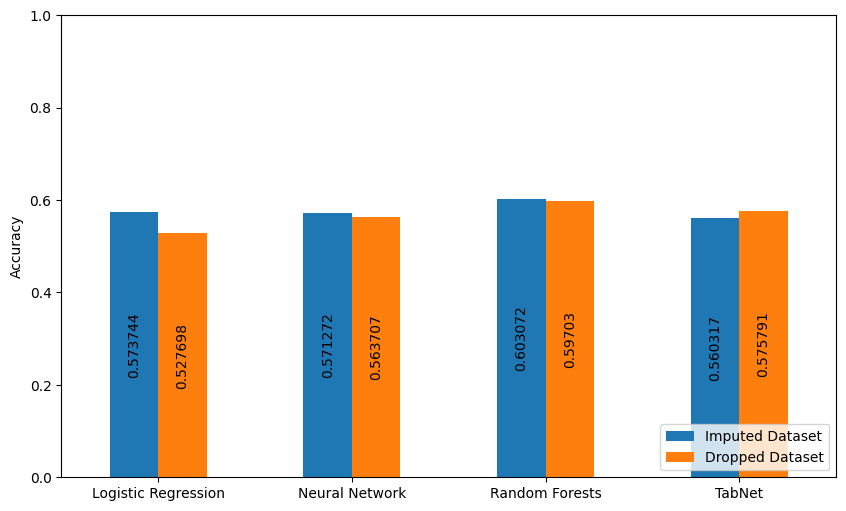

In [336]:
plot_accuracy([wimp_y,y_gen_kimp_pred,wrop_y,y_gen_krop_pred],[alimp_gen_test,alimp_gen_pred, alrop_gen_test,alrop_gen_pred],[imp_rf_gen_test,imp_rf_gen_pred,rop_rf_gen_test,rop_rf_gen_pred],[wimp_y, imp_gen_tab,wrop_y, rop_gen_tab])

For the external accuracy scores, we find that the accuracies are a lot closer to each other, however Random Forests is still better than the others. TabNet performs a little bit better than the UCI models on the Dropped dataset, but performs the worst on the Imputed Dataset.

## **ROC Curve**

The ROC curve provides a visual means of evaluating a model's ability to discriminate between classes by plotting the True Positive Rate against the False Positive Rate. With an AUC of 0.5 being the threshold for random guessing, an AUC score of 1 would indicate a perfect classification. 

For our models, we want to be able to compare the models against each other. For this we need to consider a few things
* Binary models can be plotted in a single plot
* Multi-class models need their own plot, as each class label can only be plotted as 1 vs all

Next, we create the *compute_roc_auc* function. This function takes for each model a list of [y_true, y_pred] and given whether it is a Binary or Multiclass function it either plots all models in a single plot or in a grid of plots. This should allow for a decent visualization. 

In [331]:
def compute_roc_auc(lr, nn, rf, tn, title, binary=True):
    #Function takes for each model a list of [y_true, y_pred], as well as a plot title and indicator of what classification models are
    if not binary: #If model is Multiclass, then we will plot the ROC curve for each class vs all as well as the Micro avg in a single plot per model
        #First we need to one hot encode the class labels
        label_binarizer = LabelBinarizer()
        lr[0] = label_binarizer.fit_transform(lr[0])
        lr[1] = label_binarizer.transform(lr[1])
        for i in range(0,2):
            nn[i] = label_binarizer.transform(nn[i])
            rf[i] = label_binarizer.transform(rf[i])
            tn[i] = label_binarizer.transform(tn[i])
        models = [lr, nn, rf, tn]
        #Then we create the plot and set the colors and class labels       
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(title)
        axes = axes.flatten()
        class_colors = {'e': 'green', 'p': 'red', 'u': 'brown', 'r': 'orange', 'c': 'lightgreen'}
        class_labels = {'e': 'Edible', 'p': 'Poisonous', 'u': 'Unknown', 'r': 'Not Recommended', 'c': 'Caution'}
        #Next we make a plot for each of the models
        n=0
        for model in models:
            #FPR, TPR and ROC-AUC are kept in a dictionary per class
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            #For each class label, recover the fpr, tpr and roc_auc
            for i, class_label in enumerate(class_colors.keys()):
                class_index = label_binarizer.classes_.tolist().index(class_label)
                fpr[i], tpr[i], _ = roc_curve(model[0][:, class_index], model[1][:, class_index])
                roc_auc[i] = auc(fpr[i], tpr[i])
            #Retrieve the Micro fpr, tpr and Roc Auc and plot it
            fpr["micro"], tpr["micro"], _ = roc_curve(model[0].ravel(), model[1].ravel())
            roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
            axes[n].plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
            #Plot the lines for each of the class labels    
            for i, class_label in enumerate(class_colors.keys()):
                axes[n].plot(fpr[i], tpr[i], color=class_colors[class_label], label='%s (area = %0.2f)' % (class_labels[class_label], roc_auc[i]))
            #Assign correct model name to the plot
            if n == 0: 
                model_name = 'Logistic Regression'
            elif n == 1:
                model_name = 'Neural Network'
            elif n == 2: 
                model_name = 'Random Forests'
            elif n == 3:
                model_name = 'TabNet'
            # Finalize plot with random guessing line and correct naming
            axes[n].plot([0, 1], [0, 1], 'k--')
            axes[n].set_xlabel('False Positive Rate')
            axes[n].set_ylabel('True Positive Rate')
            axes[n].set_title(model_name)
            axes[n].legend(loc='lower right')
            #Increase n
            n+=1
        fig.tight_layout()
    
    elif binary: #If models are binary, then we can show the ROC curves for all models in one plot
        for i in range(0,2): #For the Function to work, we need to convert the multi-class preds and labelled trues into binary
            lr[i] = convert_to_binary(lr[i])
            nn[i] = convert_to_binary(nn[i])
            rf[i] = convert_to_binary(rf[i])
            tn[i] = convert_to_binary(tn[i])
        # Compute ROC curve and AUC for each classifier
        lr_fpr, lr_tpr, _ = roc_curve(lr[0], lr[1])
        nn_fpr, nn_tpr, _ = roc_curve(nn[0], nn[1])
        rf_fpr, rf_tpr, _ = roc_curve(rf[0], rf[1])
        tn_fpr, tn_tpr, _ = roc_curve(tn[0], tn[1])
        lr_auc = roc_auc_score(lr[0], lr[1])
        nn_auc = roc_auc_score(nn[0], nn[1])
        rf_auc = roc_auc_score(rf[0], rf[1])
        tn_auc = roc_auc_score(tn[0], tn[1])
        # Plot ROC curves for each model
        plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
        plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
        plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
        plt.plot(tn_fpr, tn_tpr, label=f'TabNet (AUC = {tn_auc:.2f})')
        # Finalize plot with random guessing line
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc='lower right')
    plt.show()

### ROC Imputed Internal Models

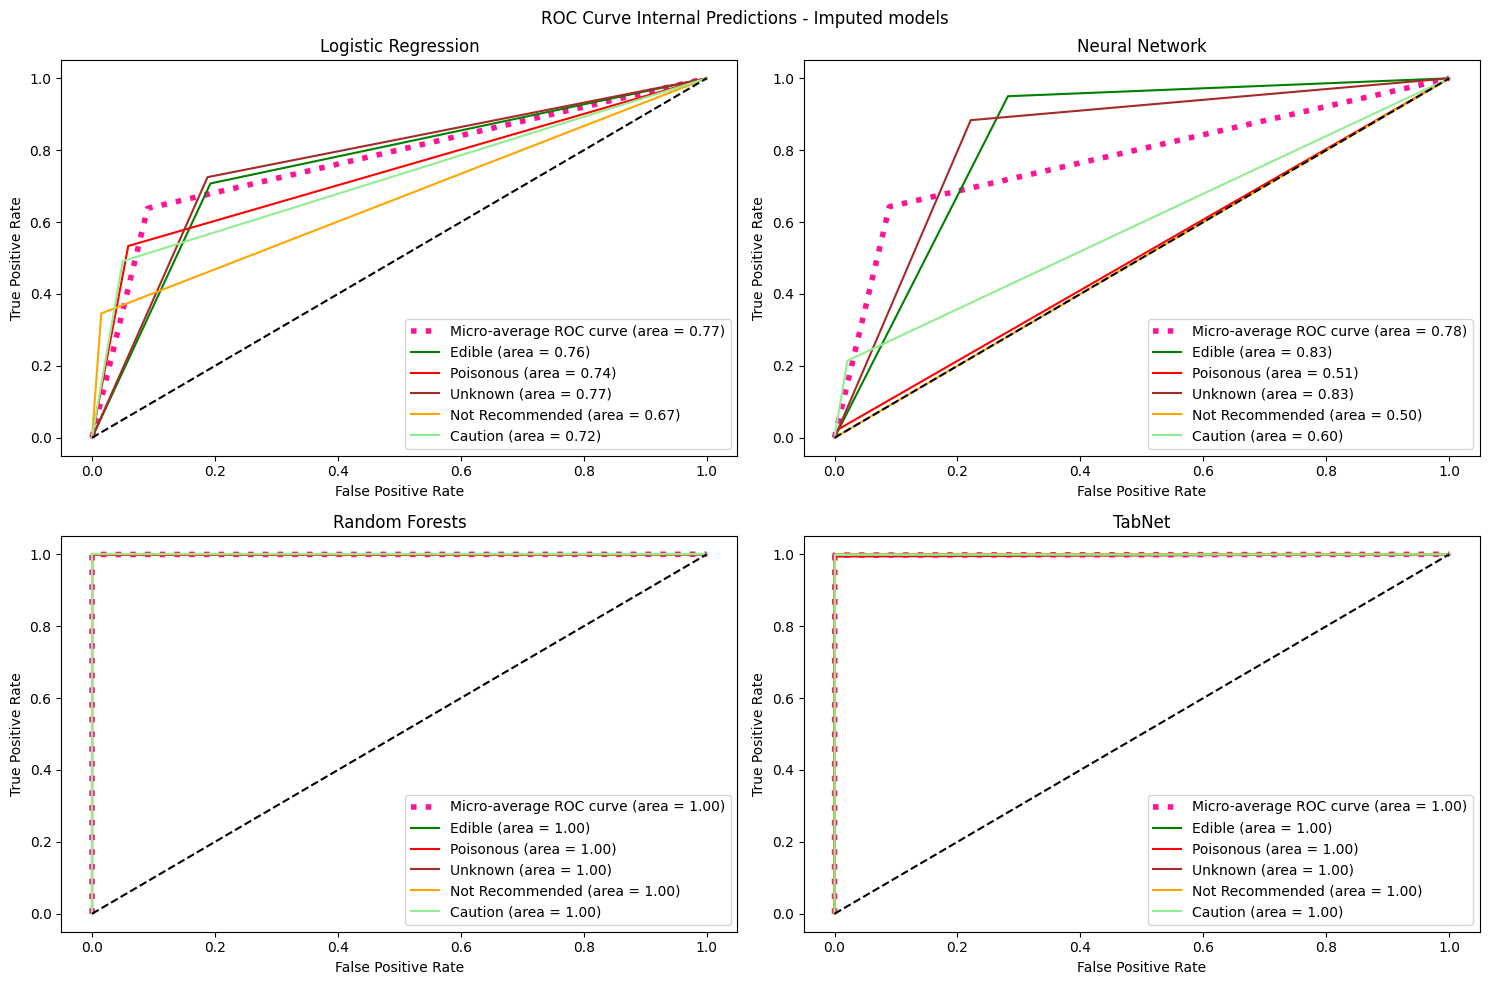

In [255]:
compute_roc_auc([y_kimp_test,y_kimp_pred],[alimp_test,alimp_pred],[imp_rf_test,imp_rf_pred],[test_imp_y, imp_tab],'ROC Curve Internal Predictions - Imputed models', binary=False)

For the Imputed models, we find that TabNet and Random Forests both achieve a perfect score, whilst the UCI models perform similarly. Here, the LogReg is deemed more reliable, as it is more accurate on classifying the poisonous instances.

### ROC Droppped Internal Models

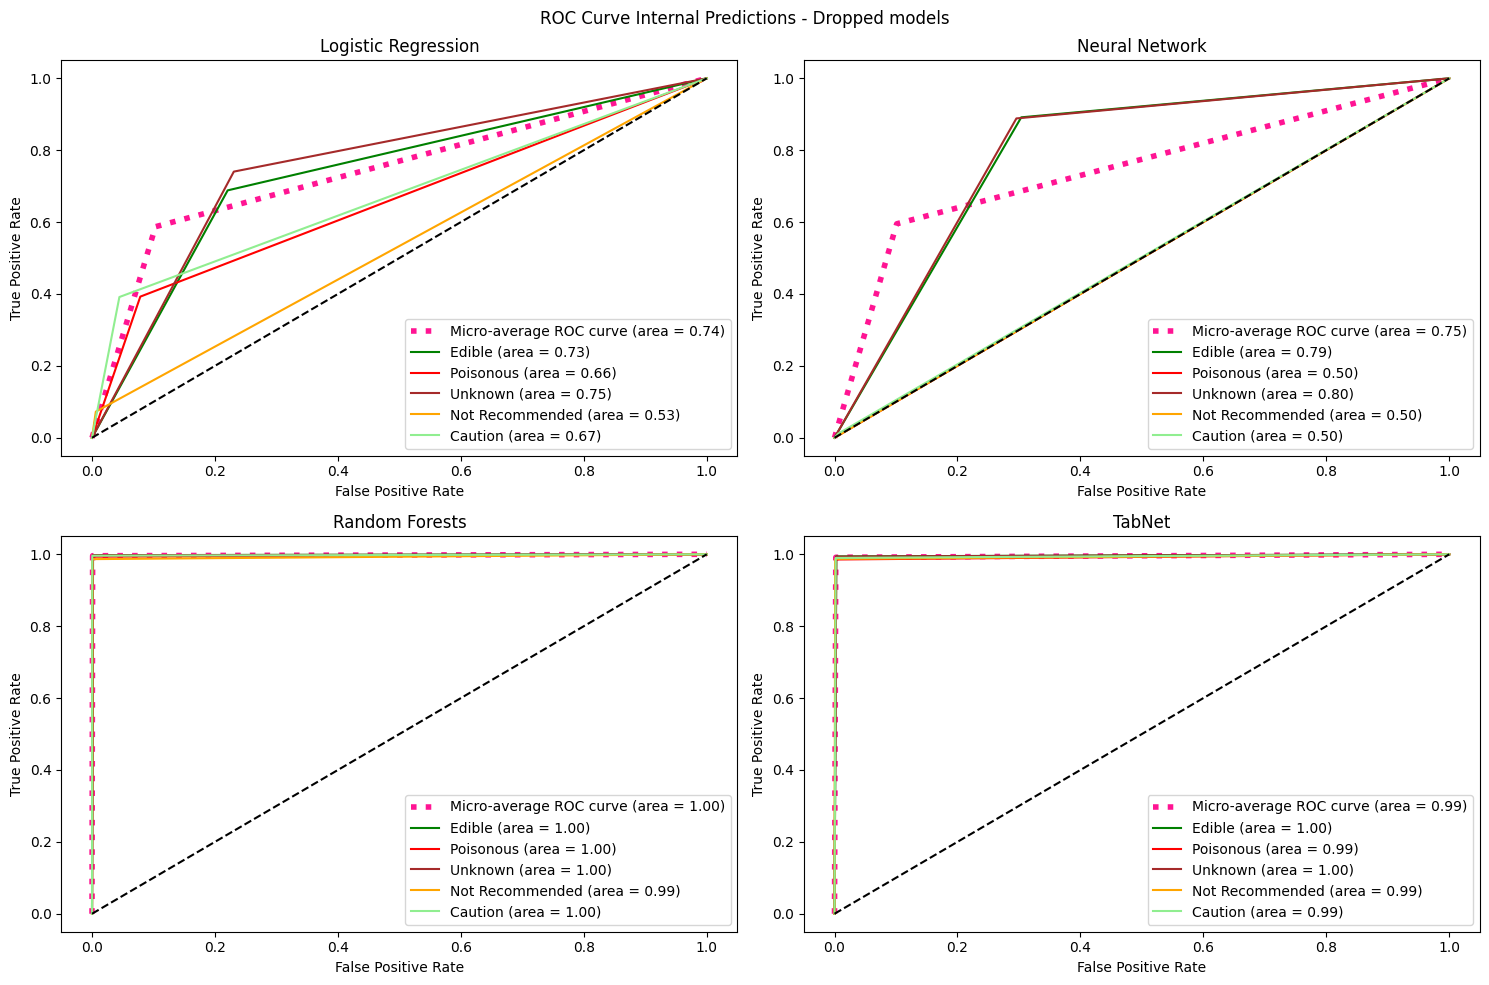

In [254]:
compute_roc_auc([y_krop_test,y_krop_pred],[alrop_test,alrop_pred],[rop_rf_test,rop_rf_pred],[test_rop_y, rop_tab],'ROC Curve Internal Predictions - Dropped models', binary=False)

The dropped internal models see the same results, although all models but RF perform a bit worse

### ROC Imputed External Models

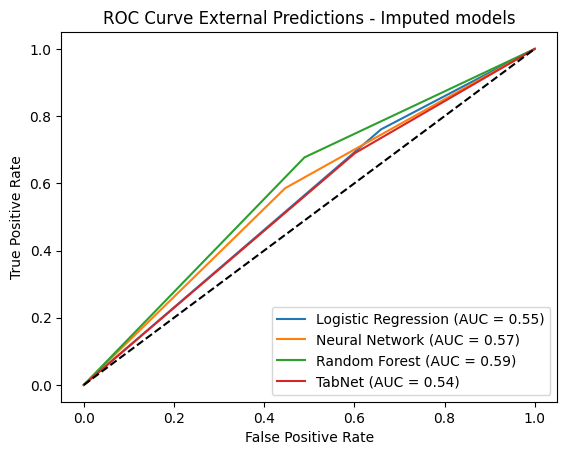

In [332]:
compute_roc_auc([wimp_y,y_gen_kimp_pred],[alimp_gen_test,alimp_gen_pred],[imp_rf_gen_test,imp_rf_gen_pred],[wimp_y, imp_gen_tab],'ROC Curve External Predictions - Imputed models')

For the external models, we find that RF performs the best on the Imputed datase, with TabNet performing the worst.

### ROC Dropped External Models

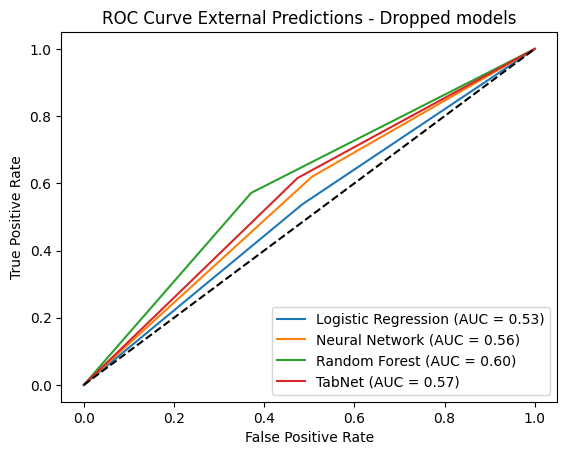

In [333]:
compute_roc_auc([wrop_y,y_gen_krop_pred],[alrop_gen_test,alrop_gen_pred],[rop_rf_gen_test,rop_rf_gen_pred],[wrop_y, rop_gen_tab],'ROC Curve External Predictions - Dropped models')

With the dropped dataset, Random Forests remains to be the best model, with Tabnet following second now.

## **Classification Report**

In [282]:
def get_classification_reports(lr,nn,rf,tn, binary=True):
    if binary:
        for i in range(0,2):
            lr[i] = convert_to_binary(lr[i])
            nn[i] = convert_to_binary(nn[i])
            rf[i] = convert_to_binary(rf[i])
            tn[i] = convert_to_binary(tn[i])
    elif not binary:
        label_binarizer = LabelBinarizer()
        lr[0] = label_binarizer.fit_transform(lr[0])
        lr[1] = label_binarizer.transform(lr[1])
        for i in range(0,2):
            nn[i] = label_binarizer.transform(nn[i])
            rf[i] = label_binarizer.transform(rf[i])
            tn[i] = label_binarizer.transform(tn[i])
    models = [lr, nn, rf, tn]
    n=0
    for model in models:
        if n == 0:
            name = 'Logistic Regression'
        elif n == 1:
            name = 'Neural Network'
        elif n == 2: 
            name = 'Random Forests'
        elif n == 3:
            name = 'TabNet'
        y_true, y_pred = model[0], model[1]
        print(name)
        if binary:
            print(classification_report(y_true, y_pred,target_names = ['e', 'p']))        
        elif not binary:
            print(classification_report(y_true, y_pred, target_names = label_binarizer.classes_.tolist()))
        n+=1
    return

### Classification Report Imputed Internal Models

In [289]:
get_classification_reports([y_kimp_test,y_kimp_pred],[alimp_test,alimp_pred],[imp_rf_test,imp_rf_pred],[test_imp_y, imp_tab], binary=False)

Logistic Regression
              precision    recall  f1-score   support

           c       0.60      0.49      0.54      3780
           e       0.65      0.71      0.68      9809
           p       0.60      0.53      0.56      4088
           r       0.60      0.35      0.44      1790
           u       0.65      0.73      0.69      9550

   micro avg       0.64      0.64      0.64     29017
   macro avg       0.62      0.56      0.58     29017
weighted avg       0.63      0.64      0.63     29017
 samples avg       0.64      0.64      0.64     29017

Neural Network
              precision    recall  f1-score   support

           c       0.61      0.21      0.32      3780
           e       0.63      0.95      0.76      9809
           p       0.46      0.02      0.04      4088
           r       0.00      0.00      0.00      1790
           u       0.66      0.88      0.76      9550

   micro avg       0.64      0.64      0.64     29017
   macro avg       0.47      0.41      0.3

C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Classification Report Dropped Internal Models

In [290]:
get_classification_reports([y_krop_test,y_krop_pred],[alrop_test,alimp_pred],[rop_rf_test,rop_rf_pred],[test_rop_y, rop_tab],binary=False)

Logistic Regression
              precision    recall  f1-score   support

           c       0.57      0.39      0.46      3780
           e       0.61      0.69      0.65      9809
           p       0.45      0.39      0.42      4088
           r       0.44      0.07      0.12      1790
           u       0.61      0.74      0.67      9550

   micro avg       0.59      0.59      0.59     29017
   macro avg       0.54      0.46      0.47     29017
weighted avg       0.57      0.59      0.57     29017
 samples avg       0.59      0.59      0.59     29017

Neural Network
              precision    recall  f1-score   support

           c       0.61      0.21      0.32      3780
           e       0.63      0.95      0.76      9809
           p       0.46      0.02      0.04      4088
           r       0.00      0.00      0.00      1790
           u       0.66      0.88      0.76      9550

   micro avg       0.64      0.64      0.64     29017
   macro avg       0.47      0.41      0.3

C:\Users\Michel\anaconda3\envs\gpu2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Classification Report Imputed External Models

In [283]:
get_classification_reports([wimp_y,y_gen_kimp_pred],[alimp_gen_test,alimp_gen_pred],[imp_rf_gen_test,imp_rf_gen_pred],[wimp_y, imp_gen_tab], binary=True)

Logistic Regression
              precision    recall  f1-score   support

           e       0.53      0.34      0.42     27181
           p       0.59      0.76      0.66     33888

    accuracy                           0.57     61069
   macro avg       0.56      0.55      0.54     61069
weighted avg       0.56      0.57      0.55     61069

Neural Network
              precision    recall  f1-score   support

           e       0.52      0.55      0.53     27181
           p       0.62      0.59      0.60     33888

    accuracy                           0.57     61069
   macro avg       0.57      0.57      0.57     61069
weighted avg       0.57      0.57      0.57     61069

Random Forests
              precision    recall  f1-score   support

           e       0.56      0.51      0.53     27181
           p       0.63      0.68      0.65     33888

    accuracy                           0.60     61069
   macro avg       0.60      0.59      0.59     61069
weighted avg       0.60 

### Classification Report Dropped External Models

In [284]:
get_classification_reports([wrop_y,y_gen_krop_pred],[alrop_gen_test,alrop_gen_pred],[rop_rf_gen_test,rop_rf_gen_pred],[wrop_y, rop_gen_tab], binary=True)

Logistic Regression
              precision    recall  f1-score   support

           e       0.47      0.52      0.49     27181
           p       0.58      0.54      0.56     33888

    accuracy                           0.53     61069
   macro avg       0.53      0.53      0.53     61069
weighted avg       0.53      0.53      0.53     61069

Neural Network
              precision    recall  f1-score   support

           e       0.51      0.49      0.50     27181
           p       0.60      0.62      0.61     33888

    accuracy                           0.56     61069
   macro avg       0.56      0.56      0.56     61069
weighted avg       0.56      0.56      0.56     61069

Random Forests
              precision    recall  f1-score   support

           e       0.54      0.63      0.58     27181
           p       0.66      0.57      0.61     33888

    accuracy                           0.60     61069
   macro avg       0.60      0.60      0.60     61069
weighted avg       0.61 

## Weighted F1-score

In [368]:
def get_f1(lr, nn, rf, tn, binary=True):
    if binary:
        for i in range(0, 4):
            lr[i] = convert_to_binary(lr[i])
            nn[i] = convert_to_binary(nn[i])
            rf[i] = convert_to_binary(rf[i])
            tn[i] = convert_to_binary(tn[i])
    elif not binary:
        label_binarizer = LabelBinarizer()
        lr[0] = label_binarizer.fit_transform(lr[0])
        lr[1] = label_binarizer.transform(lr[1])
        lr[2] = label_binarizer.transform(lr[2])
        lr[3] = label_binarizer.transform(lr[3])
        for i in range(0, 4):
            nn[i] = label_binarizer.transform(nn[i])
            rf[i] = label_binarizer.transform(rf[i])
            tn[i] = label_binarizer.transform(tn[i])
    models = [lr, nn, rf, tn]
    labels = ['Logistic Regression', 'Neural Network', 'Random Forests', 'TabNet']
    datasets = ['Imputed Dataset', 'Dropped Dataset']
    f1_df = pd.DataFrame(index=labels, columns=datasets)
    for i, (y_true_imp, y_pred_imp, y_true_rop, y_pred_rop) in enumerate(models):
        f1_df.loc[labels[i],[datasets[0]]] = f1_score(y_true_imp, y_pred_imp, average='weighted')
        f1_df.loc[labels[i],[datasets[1]]] = f1_score(y_true_rop, y_pred_rop, average='weighted') 
    ax = f1_df.plot(kind='bar', figsize=(10, 6), rot=0, ylabel='Weighted F1-Score')
    for c in ax.containers:
        ax.bar_label(c, label_type='center', rotation=90)
    ax.legend(loc='lower right')
    ax.set_ylim(0.0, 1)
    plt.show()  



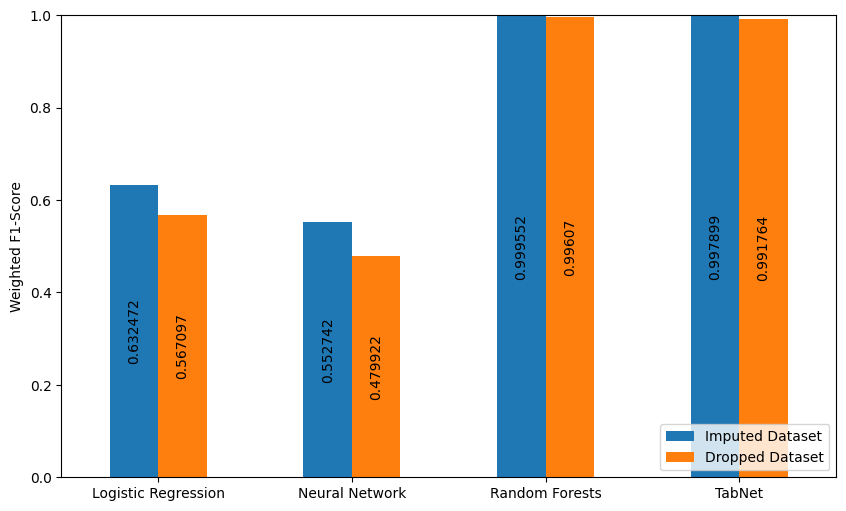

In [369]:
get_f1([y_kimp_test,y_kimp_pred,y_krop_test,y_krop_pred],[alimp_test,alimp_pred,alrop_test,alrop_pred],[imp_rf_test,imp_rf_pred,rop_rf_test,rop_rf_pred],[test_imp_y, imp_tab,test_rop_y, rop_tab], binary=False)

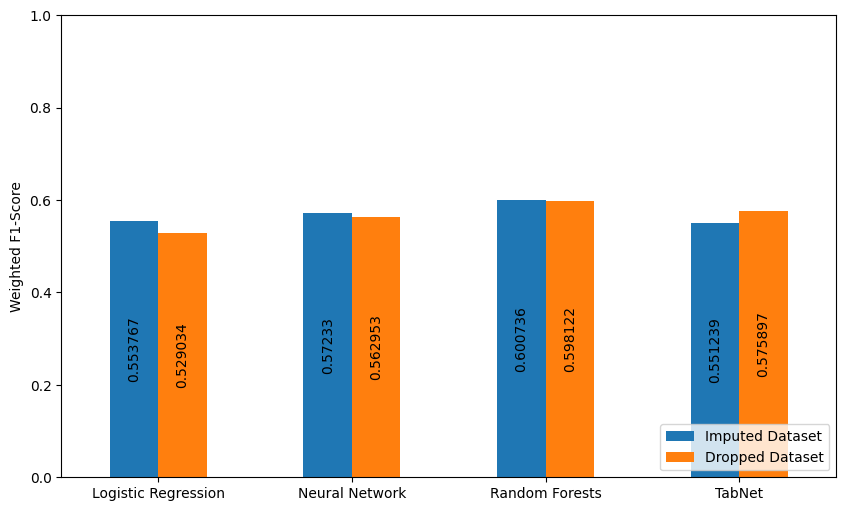

In [371]:
get_f1([wimp_y,y_gen_kimp_pred,wrop_y,y_gen_krop_pred],[alimp_gen_test,alimp_gen_pred, alrop_gen_test,alrop_gen_pred],[imp_rf_gen_test,imp_rf_gen_pred,rop_rf_gen_test,rop_rf_gen_pred],[wimp_y, imp_gen_tab,wrop_y, rop_gen_tab])